In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'imagenet100:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1500837%2F2491748%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240928%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240928T125958Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dc9ed6c2ac438a83669d68faf255426246d0305caa1542440308a23a01ee97dd291f9df65480591afa8adf146950a9b0f8c70038eb243717d2bcb2b722843ec1b4e9ba626fd0bd760bb70c5d508ff08b8c057454f3cd53a3a833ab9ee8cd579a08a1e5fb8523ea50d53d2cce35bb5553265575718990c633ad143b8ead3761a932a215c1d88d8777bb105137705ab72e7ae1e5904d560a838db832fdea32af671e0d1f706601b2b8789049ee27cf551c0c806078d6cfadf63881851128adc17ba4cd0d6bf3383a674e11445fd90c7fcabb59b4785e8d6cac6cd251475d030d7352fa4702d613b743393bec8732fcacb2200318d7d881056566ef8c3e85e9292af'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join("/content/dataset")
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 17293937662 bytes downloaded
Downloaded and uncompressed: imagenet100
Data source import complete.


In [ ]:
!pip install numpy pillow matplotlib tensorflow scikit-learn annoy tqdm

In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
base_dir = '/content/dataset/'

train_dir1 = os.path.join(base_dir, 'train.X1')
train_dir2 = os.path.join(base_dir, 'train.X2')
train_dir3 = os.path.join(base_dir, 'train.X3')
train_dir4 = os.path.join(base_dir, 'train.X4')
val_dir = os.path.join(base_dir, 'val.X')


images_dir = os.path.join(base_dir, 'images')

os.makedirs(images_dir, exist_ok=True)


In [ ]:
train_data = []
val_data = []

In [ ]:
for category in os.listdir(train_dir1):
    category_path = os.path.join(train_dir1, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
for category in os.listdir(train_dir2):
    category_path = os.path.join(train_dir2, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
for category in os.listdir(train_dir3):
    category_path = os.path.join(train_dir3, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
for category in os.listdir(train_dir4):
    category_path = os.path.join(train_dir4, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            train_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
for category in os.listdir(val_dir):
    category_path = os.path.join(val_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_src_path = os.path.join(category_path, img_name)
            img_dst_name = f"{category}_{img_name}"
            img_dst_path = os.path.join(images_dir, img_dst_name)
            shutil.move(img_src_path, img_dst_path)
            val_data.append({'filename': img_dst_name, 'label': category})

In [ ]:
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)

train_csv_path = os.path.join(base_dir, 'train.csv')
val_csv_path = os.path.join(base_dir, 'val.csv')

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)

In [ ]:
test_csv_path = os.path.join(base_dir, 'test.csv')

In [ ]:
combined_df = pd.concat([train_df, val_df], ignore_index=True)

In [ ]:
test_size = 0.1

combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

num_test_samples = int(test_size * len(combined_df))

test_df = combined_df.iloc[:num_test_samples]
remaining_df = combined_df.iloc[num_test_samples:]

In [ ]:
val_proportion = len(val_df) / (len(train_df) + len(val_df))

num_val_samples = int(val_proportion * len(remaining_df))

val_df_new = remaining_df.iloc[:num_val_samples]
train_df_new = remaining_df.iloc[num_val_samples:]

In [ ]:
train_df_new.to_csv(train_csv_path, index=False)

val_df_new.to_csv(val_csv_path, index=False)

test_df.to_csv(test_csv_path, index=False)

In [22]:
import os
import pandas as pd

base_dir = '/content/dataset/'

image_dir = os.path.join(base_dir, 'images')

train_csv = pd.read_csv(os.path.join(base_dir, 'train.csv'))
val_csv = pd.read_csv(os.path.join(base_dir, 'val.csv'))
test_csv = pd.read_csv(os.path.join(base_dir, 'test.csv'))

all_data = pd.concat([train_csv, val_csv, test_csv], ignore_index=True)

image_files = [os.path.join(image_dir, fname) for fname in all_data['filename']]

In [23]:
import numpy as np
from PIL import Image
from tqdm import tqdm

In [24]:
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert('RGB')
    img = img.resize(target_size, Image.LANCZOS)
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

In [25]:
def image_batch_generator(image_files, batch_size, preprocess_function):
    num_images = len(image_files)
    for offset in range(0, num_images, batch_size):
        batch_files = image_files[offset:offset+batch_size]
        batch_images = [preprocess_function(img_path) for img_path in batch_files]
        yield np.array(batch_images)

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2

# Load the MobileNetV2 model without the top classification layers
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')

<ipython-input-26-6cdc49434d4a>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [28]:
batch_size = 32  # Adjust based on your laptop's capabilities
feature_vectors = []
num_images = len(image_files)

# Use tqdm for progress tracking
for batch_images in tqdm(image_batch_generator(image_files, batch_size, preprocess_image), total=num_images // batch_size):
    features = base_model.predict(batch_images)
    feature_vectors.extend(features)

# Convert the list to a NumPy array
feature_vectors = np.array(feature_vectors)

  0%|          | 0/4218 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


  0%|          | 1/4218 [00:10<12:48:00, 10.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 2/4218 [00:11<5:35:09,  4.77s/it] 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 3/4218 [00:11<3:15:21,  2.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  0%|          | 4/4218 [00:12<2:10:22,  1.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  0%|          | 5/4218 [00:12<1:33:56,  1.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  0%|          | 6/4218 [00:13<1:12:20,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 7/4218 [00:13<58:23,  1.20it/s]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  0%|          | 8/4218 [00:13<48:57,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 9/4218 [00:14<43:14,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 10/4218 [00:14<38:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  0%|          | 11/4218 [00:15<40:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  0%|          | 12/4218 [00:15<40:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  0%|          | 13/4218 [00:16<40:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 14/4218 [00:17<42:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 15/4218 [00:17<39:01,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  0%|          | 16/4218 [00:18<36:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  0%|          | 17/4218 [00:18<35:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  0%|          | 18/4218 [00:19<33:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  0%|          | 19/4218 [00:19<32:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  0%|          | 20/4218 [00:19<31:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  0%|          | 21/4218 [00:20<31:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  1%|          | 22/4218 [00:20<32:05,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  1%|          | 23/4218 [00:21<31:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 24/4218 [00:21<30:24,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 25/4218 [00:22<30:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|          | 26/4218 [00:22<31:01,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  1%|          | 27/4218 [00:22<30:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|          | 28/4218 [00:23<30:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|          | 29/4218 [00:23<30:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 30/4218 [00:24<30:00,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 31/4218 [00:24<29:12,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 32/4218 [00:25<28:49,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 33/4218 [00:25<28:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  1%|          | 34/4218 [00:25<30:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  1%|          | 35/4218 [00:26<30:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 36/4218 [00:26<30:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  1%|          | 37/4218 [00:27<30:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  1%|          | 38/4218 [00:27<31:33,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 39/4218 [00:28<36:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  1%|          | 40/4218 [00:28<36:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  1%|          | 41/4218 [00:29<37:26,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  1%|          | 42/4218 [00:30<38:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  1%|          | 43/4218 [00:30<35:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|          | 44/4218 [00:30<33:10,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 45/4218 [00:31<32:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 46/4218 [00:31<31:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 47/4218 [00:32<30:40,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  1%|          | 48/4218 [00:32<29:50,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  1%|          | 49/4218 [00:33<29:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 50/4218 [00:33<28:17,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|          | 51/4218 [00:33<30:12,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  1%|          | 52/4218 [00:34<29:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▏         | 53/4218 [00:34<29:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  1%|▏         | 54/4218 [00:35<34:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▏         | 55/4218 [00:35<32:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▏         | 56/4218 [00:36<31:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▏         | 57/4218 [00:36<33:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▏         | 58/4218 [00:37<32:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▏         | 59/4218 [00:37<30:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▏         | 60/4218 [00:38<30:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  1%|▏         | 61/4218 [00:38<31:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▏         | 62/4218 [00:38<32:31,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  1%|▏         | 63/4218 [00:39<31:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|▏         | 64/4218 [00:39<30:30,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


  2%|▏         | 65/4218 [00:40<31:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  2%|▏         | 66/4218 [00:40<34:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  2%|▏         | 67/4218 [00:41<36:40,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


  2%|▏         | 68/4218 [00:42<37:23,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  2%|▏         | 69/4218 [00:42<38:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 70/4218 [00:43<37:35,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 71/4218 [00:43<34:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 72/4218 [00:44<32:57,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 73/4218 [00:44<31:41,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 74/4218 [00:44<31:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 75/4218 [00:45<34:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 76/4218 [00:45<32:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 77/4218 [00:46<33:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 78/4218 [00:46<31:53,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 79/4218 [00:47<31:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 80/4218 [00:47<30:28,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 81/4218 [00:48<30:51,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 82/4218 [00:48<29:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 83/4218 [00:48<28:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 84/4218 [00:49<33:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 85/4218 [00:49<31:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|▏         | 86/4218 [00:50<30:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 87/4218 [00:50<30:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 88/4218 [00:51<31:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 89/4218 [00:51<31:26,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  2%|▏         | 90/4218 [00:52<31:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 91/4218 [00:52<33:04,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  2%|▏         | 92/4218 [00:53<35:40,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  2%|▏         | 93/4218 [00:54<43:42,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  2%|▏         | 94/4218 [00:54<45:01,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  2%|▏         | 95/4218 [00:55<44:19,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  2%|▏         | 96/4218 [00:55<39:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  2%|▏         | 97/4218 [00:56<36:48,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 98/4218 [00:56<34:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  2%|▏         | 99/4218 [00:57<33:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|▏         | 100/4218 [00:57<32:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  2%|▏         | 101/4218 [00:58<31:17,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  2%|▏         | 102/4218 [00:58<33:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 103/4218 [00:59<31:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  2%|▏         | 104/4218 [00:59<30:36,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  2%|▏         | 105/4218 [00:59<30:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 106/4218 [01:00<29:28,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 107/4218 [01:00<28:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 108/4218 [01:01<29:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 109/4218 [01:01<30:09,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 110/4218 [01:02<30:58,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  3%|▎         | 111/4218 [01:02<30:32,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|▎         | 112/4218 [01:02<29:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 113/4218 [01:03<28:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 114/4218 [01:03<28:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 115/4218 [01:04<28:38,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  3%|▎         | 116/4218 [01:04<28:28,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 117/4218 [01:05<28:44,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 118/4218 [01:05<29:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  3%|▎         | 119/4218 [01:06<32:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  3%|▎         | 120/4218 [01:06<34:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  3%|▎         | 121/4218 [01:07<36:23,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 122/4218 [01:07<38:50,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  3%|▎         | 123/4218 [01:08<38:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 124/4218 [01:08<35:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 125/4218 [01:09<34:26,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  3%|▎         | 126/4218 [01:09<33:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 127/4218 [01:10<33:17,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 128/4218 [01:10<31:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 129/4218 [01:11<31:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 130/4218 [01:11<30:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 131/4218 [01:11<29:59,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 132/4218 [01:12<29:28,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  3%|▎         | 133/4218 [01:12<29:32,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  3%|▎         | 134/4218 [01:13<29:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 135/4218 [01:13<30:12,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 136/4218 [01:14<29:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 137/4218 [01:14<29:42,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 138/4218 [01:15<31:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 139/4218 [01:15<30:15,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  3%|▎         | 140/4218 [01:15<29:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 141/4218 [01:16<30:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  3%|▎         | 142/4218 [01:16<30:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 143/4218 [01:17<30:06,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  3%|▎         | 144/4218 [01:17<29:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  3%|▎         | 145/4218 [01:18<30:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


  3%|▎         | 146/4218 [01:18<32:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  3%|▎         | 147/4218 [01:19<35:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


  4%|▎         | 148/4218 [01:19<36:35,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


  4%|▎         | 149/4218 [01:20<40:50,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  4%|▎         | 150/4218 [01:21<38:01,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▎         | 151/4218 [01:21<34:57,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  4%|▎         | 152/4218 [01:21<32:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▎         | 153/4218 [01:22<31:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▎         | 154/4218 [01:22<31:29,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▎         | 155/4218 [01:23<30:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▎         | 156/4218 [01:23<31:34,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▎         | 157/4218 [01:24<31:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▎         | 158/4218 [01:24<30:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|▍         | 159/4218 [01:25<30:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▍         | 160/4218 [01:25<29:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▍         | 161/4218 [01:25<29:05,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 162/4218 [01:26<28:44,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▍         | 163/4218 [01:26<28:31,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|▍         | 164/4218 [01:27<28:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  4%|▍         | 165/4218 [01:27<28:48,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 166/4218 [01:28<28:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 167/4218 [01:28<30:53,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▍         | 168/4218 [01:28<30:45,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  4%|▍         | 169/4218 [01:29<30:31,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 170/4218 [01:29<29:51,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 171/4218 [01:30<29:26,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 172/4218 [01:30<30:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  4%|▍         | 173/4218 [01:31<33:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  4%|▍         | 174/4218 [01:31<35:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


  4%|▍         | 175/4218 [01:32<37:33,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


  4%|▍         | 176/4218 [01:33<38:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 177/4218 [01:33<37:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  4%|▍         | 178/4218 [01:34<34:41,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 179/4218 [01:34<32:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 180/4218 [01:34<31:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  4%|▍         | 181/4218 [01:35<31:42,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 182/4218 [01:35<31:51,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 183/4218 [01:36<31:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  4%|▍         | 184/4218 [01:36<33:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 185/4218 [01:37<31:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 186/4218 [01:37<30:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 187/4218 [01:38<30:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  4%|▍         | 188/4218 [01:38<29:18,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  4%|▍         | 189/4218 [01:39<30:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▍         | 190/4218 [01:39<29:35,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▍         | 191/4218 [01:39<29:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▍         | 192/4218 [01:40<29:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▍         | 193/4218 [01:40<29:33,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  5%|▍         | 194/4218 [01:41<29:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▍         | 195/4218 [01:41<29:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▍         | 196/4218 [01:42<29:42,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▍         | 197/4218 [01:42<29:16,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▍         | 198/4218 [01:43<29:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  5%|▍         | 199/4218 [01:43<29:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  5%|▍         | 200/4218 [01:44<32:37,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  5%|▍         | 201/4218 [01:44<36:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  5%|▍         | 202/4218 [01:45<38:34,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  5%|▍         | 203/4218 [01:46<41:35,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|▍         | 204/4218 [01:46<38:41,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  5%|▍         | 205/4218 [01:47<35:04,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▍         | 206/4218 [01:47<32:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|▍         | 207/4218 [01:47<30:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|▍         | 208/4218 [01:48<30:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▍         | 209/4218 [01:48<30:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|▍         | 210/4218 [01:49<29:23,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▌         | 211/4218 [01:50<39:40,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▌         | 212/4218 [01:50<35:30,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  5%|▌         | 213/4218 [01:50<33:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▌         | 214/4218 [01:51<32:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▌         | 215/4218 [01:51<30:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▌         | 216/4218 [01:52<30:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  5%|▌         | 217/4218 [01:52<29:49,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▌         | 218/4218 [01:53<30:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▌         | 219/4218 [01:53<30:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  5%|▌         | 220/4218 [01:53<28:59,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▌         | 221/4218 [01:54<28:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▌         | 222/4218 [01:54<28:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  5%|▌         | 223/4218 [01:55<29:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  5%|▌         | 224/4218 [01:55<28:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▌         | 225/4218 [01:55<27:35,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  5%|▌         | 226/4218 [01:56<27:12,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  5%|▌         | 227/4218 [01:56<30:31,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  5%|▌         | 228/4218 [01:57<34:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  5%|▌         | 229/4218 [01:58<35:33,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  5%|▌         | 230/4218 [01:58<36:08,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  5%|▌         | 231/4218 [01:59<34:49,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|▌         | 232/4218 [01:59<33:04,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 233/4218 [02:00<31:04,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 234/4218 [02:00<31:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 235/4218 [02:00<30:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 236/4218 [02:01<29:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 237/4218 [02:01<30:21,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 238/4218 [02:02<28:44,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 239/4218 [02:02<27:55,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|▌         | 240/4218 [02:03<27:48,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


  6%|▌         | 241/4218 [02:03<27:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  6%|▌         | 242/4218 [02:03<27:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|▌         | 243/4218 [02:04<26:51,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 244/4218 [02:04<27:17,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|▌         | 245/4218 [02:05<26:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  6%|▌         | 246/4218 [02:05<27:01,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|▌         | 247/4218 [02:05<27:23,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 248/4218 [02:06<27:31,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 249/4218 [02:06<28:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|▌         | 250/4218 [02:07<27:32,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  6%|▌         | 251/4218 [02:07<27:44,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 252/4218 [02:08<27:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  6%|▌         | 253/4218 [02:08<27:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  6%|▌         | 254/4218 [02:08<27:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  6%|▌         | 255/4218 [02:09<30:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  6%|▌         | 256/4218 [02:09<32:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  6%|▌         | 257/4218 [02:10<33:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


  6%|▌         | 258/4218 [02:11<35:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 259/4218 [02:11<36:41,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 260/4218 [02:12<33:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 261/4218 [02:12<31:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  6%|▌         | 262/4218 [02:12<30:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▌         | 263/4218 [02:13<28:41,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 264/4218 [02:13<28:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  6%|▋         | 265/4218 [02:14<28:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 266/4218 [02:14<28:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 267/4218 [02:15<30:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 268/4218 [02:15<29:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  6%|▋         | 269/4218 [02:16<29:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  6%|▋         | 270/4218 [02:16<28:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 271/4218 [02:16<28:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 272/4218 [02:17<28:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  6%|▋         | 273/4218 [02:17<28:11,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  6%|▋         | 274/4218 [02:18<27:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 275/4218 [02:18<27:26,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 276/4218 [02:18<28:05,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  7%|▋         | 277/4218 [02:19<27:38,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 278/4218 [02:19<27:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 279/4218 [02:20<27:10,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 280/4218 [02:20<27:37,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 281/4218 [02:21<29:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 282/4218 [02:21<28:33,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  7%|▋         | 283/4218 [02:22<33:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  7%|▋         | 284/4218 [02:22<34:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  7%|▋         | 285/4218 [02:23<36:24,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  7%|▋         | 286/4218 [02:24<38:43,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 287/4218 [02:24<35:59,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  7%|▋         | 288/4218 [02:24<33:47,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 289/4218 [02:25<32:52,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 290/4218 [02:25<32:55,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 291/4218 [02:26<31:13,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 292/4218 [02:26<29:54,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 293/4218 [02:27<29:11,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 294/4218 [02:27<28:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 295/4218 [02:28<28:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 296/4218 [02:28<28:13,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


  7%|▋         | 297/4218 [02:28<28:11,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 298/4218 [02:29<28:01,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  7%|▋         | 299/4218 [02:29<27:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 300/4218 [02:30<26:57,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 301/4218 [02:30<27:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 302/4218 [02:30<27:29,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 303/4218 [02:31<27:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 304/4218 [02:31<27:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  7%|▋         | 305/4218 [02:32<26:24,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 306/4218 [02:32<25:56,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 307/4218 [02:33<29:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  7%|▋         | 308/4218 [02:33<29:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  7%|▋         | 309/4218 [02:34<29:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


  7%|▋         | 310/4218 [02:34<29:37,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  7%|▋         | 311/4218 [02:35<32:06,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  7%|▋         | 312/4218 [02:35<34:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  7%|▋         | 313/4218 [02:36<35:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  7%|▋         | 314/4218 [02:36<38:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  7%|▋         | 315/4218 [02:37<34:38,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  7%|▋         | 316/4218 [02:37<32:19,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  8%|▊         | 317/4218 [02:38<30:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|▊         | 318/4218 [02:38<29:40,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 319/4218 [02:39<28:27,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  8%|▊         | 320/4218 [02:39<35:48,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  8%|▊         | 321/4218 [02:40<37:17,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 322/4218 [02:41<37:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 323/4218 [02:41<33:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 324/4218 [02:41<32:36,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 325/4218 [02:42<30:29,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 326/4218 [02:42<29:14,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 327/4218 [02:43<29:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 328/4218 [02:43<31:04,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 329/4218 [02:44<29:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  8%|▊         | 330/4218 [02:44<28:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  8%|▊         | 331/4218 [02:44<28:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 332/4218 [02:45<29:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 333/4218 [02:45<28:40,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 334/4218 [02:46<27:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 335/4218 [02:46<27:14,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  8%|▊         | 336/4218 [02:47<27:19,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  8%|▊         | 337/4218 [02:47<28:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


  8%|▊         | 338/4218 [02:48<34:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  8%|▊         | 339/4218 [02:48<36:13,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  8%|▊         | 340/4218 [02:49<38:49,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|▊         | 341/4218 [02:50<35:10,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 342/4218 [02:50<32:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 343/4218 [02:50<30:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|▊         | 344/4218 [02:51<29:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|▊         | 345/4218 [02:51<29:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 346/4218 [02:52<29:17,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|▊         | 347/4218 [02:52<28:44,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  8%|▊         | 348/4218 [02:53<28:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  8%|▊         | 349/4218 [02:53<27:12,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  8%|▊         | 350/4218 [02:53<26:58,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


  8%|▊         | 351/4218 [02:54<26:44,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 352/4218 [02:54<26:31,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 353/4218 [02:55<26:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 354/4218 [02:55<26:26,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 355/4218 [02:55<26:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 356/4218 [02:56<26:15,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 357/4218 [02:56<25:31,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  8%|▊         | 358/4218 [02:57<25:49,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▊         | 359/4218 [02:57<26:20,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


  9%|▊         | 360/4218 [02:57<27:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|▊         | 361/4218 [02:58<27:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▊         | 362/4218 [02:58<26:52,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▊         | 363/4218 [02:59<26:39,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|▊         | 364/4218 [02:59<26:12,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


  9%|▊         | 365/4218 [03:00<28:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  9%|▊         | 366/4218 [03:00<30:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  9%|▊         | 367/4218 [03:01<33:19,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  9%|▊         | 368/4218 [03:01<35:11,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  9%|▊         | 369/4218 [03:02<35:22,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  9%|▉         | 370/4218 [03:02<32:22,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 371/4218 [03:03<31:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 372/4218 [03:03<30:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  9%|▉         | 373/4218 [03:04<29:09,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 374/4218 [03:04<28:19,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|▉         | 375/4218 [03:04<27:24,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 376/4218 [03:05<29:54,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|▉         | 377/4218 [03:05<28:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 378/4218 [03:06<27:32,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 379/4218 [03:06<26:41,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 380/4218 [03:07<27:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  9%|▉         | 381/4218 [03:07<26:25,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 382/4218 [03:07<25:57,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


  9%|▉         | 383/4218 [03:08<30:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|▉         | 384/4218 [03:08<29:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 385/4218 [03:09<29:53,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 386/4218 [03:09<28:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 387/4218 [03:10<29:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 388/4218 [03:10<28:36,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 389/4218 [03:11<28:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 390/4218 [03:11<28:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


  9%|▉         | 391/4218 [03:12<26:58,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


  9%|▉         | 392/4218 [03:12<27:41,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


  9%|▉         | 393/4218 [03:13<30:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


  9%|▉         | 394/4218 [03:13<32:28,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


  9%|▉         | 395/4218 [03:14<35:08,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


  9%|▉         | 396/4218 [03:14<35:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 397/4218 [03:15<33:23,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 398/4218 [03:15<31:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


  9%|▉         | 399/4218 [03:16<30:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


  9%|▉         | 400/4218 [03:16<29:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|▉         | 401/4218 [03:17<28:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|▉         | 402/4218 [03:17<27:45,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 403/4218 [03:17<27:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 10%|▉         | 404/4218 [03:18<27:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 10%|▉         | 405/4218 [03:18<26:53,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 406/4218 [03:19<26:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 407/4218 [03:19<27:41,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|▉         | 408/4218 [03:19<26:32,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|▉         | 409/4218 [03:20<26:23,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|▉         | 410/4218 [03:20<26:19,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 411/4218 [03:21<26:04,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 412/4218 [03:21<25:52,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 413/4218 [03:21<25:59,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 10%|▉         | 414/4218 [03:22<26:34,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 10%|▉         | 415/4218 [03:22<26:41,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|▉         | 416/4218 [03:23<26:13,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 10%|▉         | 417/4218 [03:23<25:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 418/4218 [03:24<26:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|▉         | 419/4218 [03:24<26:29,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|▉         | 420/4218 [03:24<27:55,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 10%|▉         | 421/4218 [03:25<29:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 10%|█         | 422/4218 [03:26<31:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 10%|█         | 423/4218 [03:26<32:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 10%|█         | 424/4218 [03:27<34:23,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|█         | 425/4218 [03:27<35:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 10%|█         | 426/4218 [03:28<32:22,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 10%|█         | 427/4218 [03:28<30:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 10%|█         | 428/4218 [03:29<36:02,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 10%|█         | 429/4218 [03:30<41:45,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|█         | 430/4218 [03:31<49:32,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 10%|█         | 431/4218 [03:31<45:37,  1.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


 10%|█         | 432/4218 [03:32<50:16,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 10%|█         | 433/4218 [03:33<52:09,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 10%|█         | 434/4218 [03:34<53:08,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 10%|█         | 435/4218 [03:35<53:50,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 10%|█         | 436/4218 [03:36<52:35,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 10%|█         | 437/4218 [03:37<50:23,  1.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 10%|█         | 438/4218 [03:38<55:19,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 10%|█         | 439/4218 [03:39<58:48,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 10%|█         | 440/4218 [03:39<52:10,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 10%|█         | 441/4218 [03:40<47:19,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 10%|█         | 442/4218 [03:40<43:23,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 443/4218 [03:41<38:22,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 11%|█         | 444/4218 [03:41<35:07,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 445/4218 [03:42<32:35,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 446/4218 [03:42<30:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 447/4218 [03:43<29:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 448/4218 [03:43<28:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 449/4218 [03:43<27:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 11%|█         | 450/4218 [03:44<27:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|█         | 451/4218 [03:44<26:21,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 452/4218 [03:45<26:35,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 11%|█         | 453/4218 [03:45<26:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 11%|█         | 454/4218 [03:45<26:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 11%|█         | 455/4218 [03:46<28:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 456/4218 [03:46<27:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 457/4218 [03:47<26:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 458/4218 [03:47<27:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 459/4218 [03:48<26:59,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 460/4218 [03:48<26:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 461/4218 [03:49<26:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 462/4218 [03:49<26:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 463/4218 [03:49<26:51,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 464/4218 [03:50<26:41,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 465/4218 [03:50<26:23,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 11%|█         | 466/4218 [03:51<28:52,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 11%|█         | 467/4218 [03:51<30:48,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 11%|█         | 468/4218 [03:52<32:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 11%|█         | 469/4218 [03:53<34:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 470/4218 [03:53<33:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|█         | 471/4218 [03:53<30:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 11%|█         | 472/4218 [03:54<28:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█         | 473/4218 [03:54<28:21,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 11%|█         | 474/4218 [03:55<27:26,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 475/4218 [03:55<26:28,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 476/4218 [03:56<27:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 477/4218 [03:56<27:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 478/4218 [03:56<27:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 479/4218 [03:57<26:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 11%|█▏        | 480/4218 [03:57<27:22,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 11%|█▏        | 481/4218 [03:58<26:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 11%|█▏        | 482/4218 [03:58<26:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 483/4218 [03:59<26:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 11%|█▏        | 484/4218 [03:59<27:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 11%|█▏        | 485/4218 [03:59<26:22,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 486/4218 [04:00<26:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 487/4218 [04:00<26:11,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 488/4218 [04:01<26:19,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█▏        | 489/4218 [04:01<26:31,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 12%|█▏        | 490/4218 [04:02<27:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█▏        | 491/4218 [04:02<26:39,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█▏        | 492/4218 [04:02<27:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 493/4218 [04:03<26:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 12%|█▏        | 494/4218 [04:03<29:31,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 12%|█▏        | 495/4218 [04:04<30:20,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 12%|█▏        | 496/4218 [04:04<31:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 12%|█▏        | 497/4218 [04:05<31:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 12%|█▏        | 498/4218 [04:06<32:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 499/4218 [04:06<30:33,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█▏        | 500/4218 [04:06<28:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█▏        | 501/4218 [04:07<28:39,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 12%|█▏        | 502/4218 [04:07<27:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 503/4218 [04:08<26:36,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 504/4218 [04:08<26:36,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█▏        | 505/4218 [04:09<27:01,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 506/4218 [04:09<26:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 507/4218 [04:09<25:41,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 508/4218 [04:10<25:40,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 509/4218 [04:10<26:07,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 510/4218 [04:11<25:36,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 511/4218 [04:11<28:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 12%|█▏        | 512/4218 [04:12<28:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 513/4218 [04:12<27:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 12%|█▏        | 514/4218 [04:13<28:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 515/4218 [04:13<28:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 12%|█▏        | 516/4218 [04:13<29:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 517/4218 [04:14<28:24,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 518/4218 [04:14<27:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 519/4218 [04:15<27:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 520/4218 [04:15<26:20,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 521/4218 [04:16<25:27,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 12%|█▏        | 522/4218 [04:16<28:23,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 12%|█▏        | 523/4218 [04:17<30:17,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 12%|█▏        | 524/4218 [04:17<31:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 12%|█▏        | 525/4218 [04:18<32:27,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 12%|█▏        | 526/4218 [04:18<32:28,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 12%|█▏        | 527/4218 [04:19<33:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 13%|█▎        | 528/4218 [04:19<30:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 529/4218 [04:20<29:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 530/4218 [04:20<27:45,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 531/4218 [04:21<26:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 13%|█▎        | 532/4218 [04:21<26:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 533/4218 [04:21<25:28,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 534/4218 [04:22<25:03,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 535/4218 [04:22<25:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 536/4218 [04:23<25:14,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 13%|█▎        | 537/4218 [04:23<24:51,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|█▎        | 538/4218 [04:23<24:33,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 539/4218 [04:24<26:00,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 540/4218 [04:24<25:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 541/4218 [04:25<25:47,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 542/4218 [04:25<25:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 13%|█▎        | 543/4218 [04:25<25:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 13%|█▎        | 544/4218 [04:26<26:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 545/4218 [04:26<26:09,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 13%|█▎        | 546/4218 [04:27<26:07,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 547/4218 [04:27<28:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 548/4218 [04:28<27:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 549/4218 [04:28<27:28,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 13%|█▎        | 550/4218 [04:29<30:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 13%|█▎        | 551/4218 [04:29<32:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 13%|█▎        | 552/4218 [04:30<33:14,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 13%|█▎        | 553/4218 [04:31<38:37,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 13%|█▎        | 554/4218 [04:31<36:35,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 555/4218 [04:32<32:42,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 556/4218 [04:32<30:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 557/4218 [04:33<28:36,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 558/4218 [04:33<26:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 559/4218 [04:33<26:47,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 560/4218 [04:34<25:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 561/4218 [04:34<25:23,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 562/4218 [04:35<26:47,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 13%|█▎        | 563/4218 [04:35<26:07,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 564/4218 [04:35<26:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 565/4218 [04:36<25:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 13%|█▎        | 566/4218 [04:36<25:52,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 13%|█▎        | 567/4218 [04:37<25:06,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 568/4218 [04:37<26:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 13%|█▎        | 569/4218 [04:38<26:16,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 14%|█▎        | 570/4218 [04:38<26:03,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▎        | 571/4218 [04:38<25:39,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 14%|█▎        | 572/4218 [04:39<25:55,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|█▎        | 573/4218 [04:39<26:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▎        | 574/4218 [04:40<26:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▎        | 575/4218 [04:40<26:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 14%|█▎        | 576/4218 [04:41<26:04,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 14%|█▎        | 577/4218 [04:41<26:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 14%|█▎        | 578/4218 [04:42<29:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 14%|█▎        | 579/4218 [04:42<33:46,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 14%|█▍        | 580/4218 [04:43<35:18,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▍        | 581/4218 [04:44<35:52,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 582/4218 [04:44<33:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|█▍        | 583/4218 [04:44<29:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 584/4218 [04:45<29:39,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 585/4218 [04:45<28:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 586/4218 [04:46<27:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 14%|█▍        | 587/4218 [04:46<26:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 588/4218 [04:47<25:30,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 589/4218 [04:47<25:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 14%|█▍        | 590/4218 [04:47<26:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 591/4218 [04:48<26:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|█▍        | 592/4218 [04:48<26:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 14%|█▍        | 593/4218 [04:49<27:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 14%|█▍        | 594/4218 [04:49<26:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 14%|█▍        | 595/4218 [04:50<25:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 14%|█▍        | 596/4218 [04:50<26:06,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 597/4218 [04:51<27:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 598/4218 [04:51<26:14,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 599/4218 [04:51<25:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 14%|█▍        | 600/4218 [04:52<25:27,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 601/4218 [04:52<25:52,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 14%|█▍        | 602/4218 [04:53<25:57,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 603/4218 [04:53<26:28,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 604/4218 [04:54<26:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 14%|█▍        | 605/4218 [04:54<27:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 14%|█▍        | 606/4218 [04:55<28:59,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 14%|█▍        | 607/4218 [04:55<30:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 14%|█▍        | 608/4218 [04:56<33:27,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 14%|█▍        | 609/4218 [04:56<34:39,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 14%|█▍        | 610/4218 [04:57<32:07,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 14%|█▍        | 611/4218 [04:57<31:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 612/4218 [04:58<29:45,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▍        | 613/4218 [04:58<28:19,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|█▍        | 614/4218 [04:59<27:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▍        | 615/4218 [04:59<28:31,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 616/4218 [05:00<27:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 617/4218 [05:00<29:44,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 618/4218 [05:01<28:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|█▍        | 619/4218 [05:01<28:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|█▍        | 620/4218 [05:01<27:23,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 621/4218 [05:02<26:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 15%|█▍        | 622/4218 [05:02<25:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▍        | 623/4218 [05:03<26:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|█▍        | 624/4218 [05:03<26:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▍        | 625/4218 [05:04<29:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 626/4218 [05:04<27:50,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 627/4218 [05:05<30:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 628/4218 [05:05<29:21,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 629/4218 [05:06<27:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▍        | 630/4218 [05:06<26:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 15%|█▍        | 631/4218 [05:06<26:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 15%|█▍        | 632/4218 [05:07<27:36,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 15%|█▌        | 633/4218 [05:08<31:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 15%|█▌        | 634/4218 [05:08<32:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 15%|█▌        | 635/4218 [05:09<33:09,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 636/4218 [05:09<33:52,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▌        | 637/4218 [05:10<30:51,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 15%|█▌        | 638/4218 [05:10<31:51,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|█▌        | 639/4218 [05:11<30:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 640/4218 [05:11<29:46,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 641/4218 [05:12<28:19,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 642/4218 [05:12<27:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▌        | 643/4218 [05:13<26:30,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▌        | 644/4218 [05:13<26:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 15%|█▌        | 645/4218 [05:13<25:42,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 646/4218 [05:14<25:04,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 15%|█▌        | 647/4218 [05:14<25:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 15%|█▌        | 648/4218 [05:15<25:25,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 649/4218 [05:15<25:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 15%|█▌        | 650/4218 [05:16<25:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 15%|█▌        | 651/4218 [05:16<28:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 15%|█▌        | 652/4218 [05:17<34:15,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 15%|█▌        | 653/4218 [05:18<35:59,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 654/4218 [05:18<33:43,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 655/4218 [05:19<31:01,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 656/4218 [05:19<29:48,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 16%|█▌        | 657/4218 [05:19<28:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 16%|█▌        | 658/4218 [05:20<36:25,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 16%|█▌        | 659/4218 [05:21<35:21,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 16%|█▌        | 660/4218 [05:21<35:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█▌        | 661/4218 [05:22<34:51,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 662/4218 [05:22<32:05,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 16%|█▌        | 663/4218 [05:23<30:15,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█▌        | 664/4218 [05:23<28:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 16%|█▌        | 665/4218 [05:24<27:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 666/4218 [05:24<26:55,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 667/4218 [05:25<26:01,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 16%|█▌        | 668/4218 [05:25<27:10,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 669/4218 [05:26<26:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 670/4218 [05:26<25:45,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 671/4218 [05:26<25:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 16%|█▌        | 672/4218 [05:27<26:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 16%|█▌        | 673/4218 [05:27<25:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 16%|█▌        | 674/4218 [05:28<25:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█▌        | 675/4218 [05:28<26:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█▌        | 676/4218 [05:29<26:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 677/4218 [05:29<25:25,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█▌        | 678/4218 [05:29<25:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 679/4218 [05:30<25:53,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 16%|█▌        | 680/4218 [05:30<25:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 681/4218 [05:31<25:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 682/4218 [05:31<25:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▌        | 683/4218 [05:32<25:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 16%|█▌        | 684/4218 [05:32<25:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▌        | 685/4218 [05:33<28:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 16%|█▋        | 686/4218 [05:33<29:48,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 16%|█▋        | 687/4218 [05:34<30:25,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 16%|█▋        | 688/4218 [05:34<31:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▋        | 689/4218 [05:35<33:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█▋        | 690/4218 [05:35<31:31,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▋        | 691/4218 [05:36<29:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▋        | 692/4218 [05:36<29:06,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 16%|█▋        | 693/4218 [05:37<27:07,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 16%|█▋        | 694/4218 [05:37<26:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█▋        | 695/4218 [05:38<25:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█▋        | 696/4218 [05:38<25:24,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 697/4218 [05:38<24:46,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 17%|█▋        | 698/4218 [05:39<27:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█▋        | 699/4218 [05:39<26:51,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 700/4218 [05:40<26:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 701/4218 [05:40<26:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 702/4218 [05:41<25:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 703/4218 [05:41<26:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 17%|█▋        | 704/4218 [05:42<26:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 705/4218 [05:42<27:43,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 17%|█▋        | 706/4218 [05:43<27:10,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 17%|█▋        | 707/4218 [05:43<26:12,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 17%|█▋        | 708/4218 [05:43<25:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 17%|█▋        | 709/4218 [05:44<26:07,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 17%|█▋        | 710/4218 [05:44<25:49,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 711/4218 [05:45<26:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 17%|█▋        | 712/4218 [05:45<29:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 17%|█▋        | 713/4218 [05:46<32:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 17%|█▋        | 714/4218 [05:47<32:29,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 17%|█▋        | 715/4218 [05:47<35:22,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 716/4218 [05:48<33:11,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 717/4218 [05:48<29:34,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 718/4218 [05:49<28:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 17%|█▋        | 719/4218 [05:49<27:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 17%|█▋        | 720/4218 [05:49<27:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 17%|█▋        | 721/4218 [05:50<26:21,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 722/4218 [05:50<25:22,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 723/4218 [05:51<25:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 724/4218 [05:51<27:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 17%|█▋        | 725/4218 [05:52<26:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 726/4218 [05:52<25:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 727/4218 [05:53<24:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 728/4218 [05:53<24:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 729/4218 [05:53<25:05,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 17%|█▋        | 730/4218 [05:54<24:58,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 17%|█▋        | 731/4218 [05:54<24:42,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 732/4218 [05:55<25:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 733/4218 [05:55<25:15,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 734/4218 [05:56<25:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 17%|█▋        | 735/4218 [05:56<25:02,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 17%|█▋        | 736/4218 [05:56<25:08,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 737/4218 [05:57<24:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 17%|█▋        | 738/4218 [05:57<24:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 18%|█▊        | 739/4218 [05:58<28:51,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 18%|█▊        | 740/4218 [05:58<30:18,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 18%|█▊        | 741/4218 [05:59<32:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 18%|█▊        | 742/4218 [06:00<33:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 743/4218 [06:00<32:23,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 744/4218 [06:01<29:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 745/4218 [06:01<27:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 746/4218 [06:02<27:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 747/4218 [06:02<26:37,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|█▊        | 748/4218 [06:02<26:47,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 749/4218 [06:03<26:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 750/4218 [06:03<25:25,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 751/4218 [06:04<25:27,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 752/4218 [06:04<25:05,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 753/4218 [06:05<24:22,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 18%|█▊        | 754/4218 [06:05<24:18,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 755/4218 [06:05<23:47,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 756/4218 [06:06<23:38,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 757/4218 [06:06<23:51,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 18%|█▊        | 758/4218 [06:07<27:04,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 18%|█▊        | 759/4218 [06:08<34:29,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 18%|█▊        | 760/4218 [06:09<40:01,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 18%|█▊        | 761/4218 [06:09<36:19,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 18%|█▊        | 762/4218 [06:10<38:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 18%|█▊        | 763/4218 [06:11<44:19,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 18%|█▊        | 764/4218 [06:11<40:53,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 18%|█▊        | 765/4218 [06:12<39:45,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 18%|█▊        | 766/4218 [06:13<37:26,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 767/4218 [06:13<35:54,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 768/4218 [06:14<32:32,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 769/4218 [06:14<30:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 770/4218 [06:14<28:53,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 771/4218 [06:15<27:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 772/4218 [06:16<29:37,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 773/4218 [06:16<27:16,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 18%|█▊        | 774/4218 [06:16<26:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 18%|█▊        | 775/4218 [06:17<25:33,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 18%|█▊        | 776/4218 [06:17<25:00,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 18%|█▊        | 777/4218 [06:18<25:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 18%|█▊        | 778/4218 [06:18<28:58,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 18%|█▊        | 779/4218 [06:19<31:54,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 18%|█▊        | 780/4218 [06:19<32:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 19%|█▊        | 781/4218 [06:20<31:48,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 19%|█▊        | 782/4218 [06:21<33:51,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|█▊        | 783/4218 [06:21<34:38,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▊        | 784/4218 [06:22<32:11,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 19%|█▊        | 785/4218 [06:22<29:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▊        | 786/4218 [06:23<28:01,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 19%|█▊        | 787/4218 [06:23<27:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 19%|█▊        | 788/4218 [06:24<28:54,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 19%|█▊        | 789/4218 [06:24<29:53,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 19%|█▊        | 790/4218 [06:25<30:14,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 19%|█▉        | 791/4218 [06:25<30:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 792/4218 [06:26<31:59,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 793/4218 [06:26<29:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 19%|█▉        | 794/4218 [06:27<28:38,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 795/4218 [06:27<27:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 796/4218 [06:28<28:13,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 797/4218 [06:28<27:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 19%|█▉        | 798/4218 [06:29<26:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 799/4218 [06:29<25:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 800/4218 [06:29<24:42,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 19%|█▉        | 801/4218 [06:30<24:18,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 802/4218 [06:30<23:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 803/4218 [06:31<23:16,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 19%|█▉        | 804/4218 [06:31<24:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 19%|█▉        | 805/4218 [06:32<24:10,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 806/4218 [06:32<24:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 19%|█▉        | 807/4218 [06:32<24:50,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 808/4218 [06:33<24:31,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 809/4218 [06:33<24:29,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 810/4218 [06:34<25:37,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 811/4218 [06:34<25:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 812/4218 [06:35<25:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 813/4218 [06:35<25:18,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 19%|█▉        | 814/4218 [06:36<24:59,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 19%|█▉        | 815/4218 [06:36<26:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 19%|█▉        | 816/4218 [06:37<29:02,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 19%|█▉        | 817/4218 [06:37<31:13,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 19%|█▉        | 818/4218 [06:38<33:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 19%|█▉        | 819/4218 [06:39<32:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 19%|█▉        | 820/4218 [06:39<29:42,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 19%|█▉        | 821/4218 [06:39<28:28,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 19%|█▉        | 822/4218 [06:40<26:49,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|█▉        | 823/4218 [06:40<26:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|█▉        | 824/4218 [06:41<25:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|█▉        | 825/4218 [06:41<25:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 20%|█▉        | 826/4218 [06:42<24:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 20%|█▉        | 827/4218 [06:42<24:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|█▉        | 828/4218 [06:42<24:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|█▉        | 829/4218 [06:43<24:14,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|█▉        | 830/4218 [06:43<24:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|█▉        | 831/4218 [06:44<25:05,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|█▉        | 832/4218 [06:44<26:03,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 20%|█▉        | 833/4218 [06:45<25:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|█▉        | 834/4218 [06:45<25:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 20%|█▉        | 835/4218 [06:46<24:45,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|█▉        | 836/4218 [06:46<24:11,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 20%|█▉        | 837/4218 [06:46<23:50,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|█▉        | 838/4218 [06:47<23:46,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|█▉        | 839/4218 [06:47<23:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|█▉        | 840/4218 [06:48<23:46,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|█▉        | 841/4218 [06:48<23:55,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|█▉        | 842/4218 [06:48<23:48,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 20%|█▉        | 843/4218 [06:49<25:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 20%|██        | 844/4218 [06:50<28:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 20%|██        | 845/4218 [06:50<29:43,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 20%|██        | 846/4218 [06:51<31:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 20%|██        | 847/4218 [06:51<32:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|██        | 848/4218 [06:52<29:55,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 849/4218 [06:52<27:26,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 20%|██        | 850/4218 [06:53<26:14,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|██        | 851/4218 [06:53<25:07,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 852/4218 [06:54<26:46,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 20%|██        | 853/4218 [06:54<26:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 20%|██        | 854/4218 [06:55<26:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 855/4218 [06:55<25:54,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|██        | 856/4218 [06:55<25:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 857/4218 [06:56<26:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 20%|██        | 858/4218 [06:56<26:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 20%|██        | 859/4218 [06:57<27:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 20%|██        | 860/4218 [06:57<25:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 20%|██        | 861/4218 [06:58<24:29,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 20%|██        | 862/4218 [06:58<24:25,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 863/4218 [06:59<23:40,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 20%|██        | 864/4218 [06:59<23:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 865/4218 [06:59<23:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 866/4218 [07:00<24:06,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██        | 867/4218 [07:00<26:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 868/4218 [07:01<26:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██        | 869/4218 [07:01<25:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 21%|██        | 870/4218 [07:02<26:42,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 21%|██        | 871/4218 [07:02<27:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 21%|██        | 872/4218 [07:03<29:52,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 21%|██        | 873/4218 [07:04<35:14,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|██        | 874/4218 [07:04<34:22,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 21%|██        | 875/4218 [07:05<31:27,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 876/4218 [07:05<29:14,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 877/4218 [07:06<27:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██        | 878/4218 [07:06<26:27,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 879/4218 [07:07<25:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 880/4218 [07:07<25:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 881/4218 [07:07<24:46,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██        | 882/4218 [07:08<24:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|██        | 883/4218 [07:08<25:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 884/4218 [07:09<24:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|██        | 885/4218 [07:09<24:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 21%|██        | 886/4218 [07:10<24:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 21%|██        | 887/4218 [07:10<24:19,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 888/4218 [07:11<24:48,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 889/4218 [07:11<24:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 890/4218 [07:11<23:14,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 891/4218 [07:12<23:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██        | 892/4218 [07:12<23:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 21%|██        | 893/4218 [07:13<23:31,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 21%|██        | 894/4218 [07:13<23:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 895/4218 [07:14<23:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██        | 896/4218 [07:14<24:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 21%|██▏       | 897/4218 [07:14<25:15,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 21%|██▏       | 898/4218 [07:15<27:18,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 21%|██▏       | 899/4218 [07:16<29:39,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 21%|██▏       | 900/4218 [07:16<30:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 21%|██▏       | 901/4218 [07:17<31:10,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██▏       | 902/4218 [07:17<29:08,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 21%|██▏       | 903/4218 [07:18<27:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██▏       | 904/4218 [07:18<27:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██▏       | 905/4218 [07:19<25:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 21%|██▏       | 906/4218 [07:19<24:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 907/4218 [07:20<25:33,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 908/4218 [07:20<25:07,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 909/4218 [07:20<24:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|██▏       | 910/4218 [07:21<24:10,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|██▏       | 911/4218 [07:21<23:38,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 912/4218 [07:22<24:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 913/4218 [07:22<24:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 914/4218 [07:23<23:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|██▏       | 915/4218 [07:23<23:24,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|██▏       | 916/4218 [07:23<23:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 917/4218 [07:24<23:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 918/4218 [07:24<23:34,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 919/4218 [07:25<23:08,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|██▏       | 920/4218 [07:25<23:42,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|██▏       | 921/4218 [07:26<23:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 922/4218 [07:26<23:54,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 22%|██▏       | 923/4218 [07:26<23:29,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 924/4218 [07:27<23:38,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 22%|██▏       | 925/4218 [07:27<26:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 22%|██▏       | 926/4218 [07:28<27:58,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 22%|██▏       | 927/4218 [07:29<30:03,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 22%|██▏       | 928/4218 [07:29<32:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 22%|██▏       | 929/4218 [07:30<31:56,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 930/4218 [07:30<29:25,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 931/4218 [07:31<27:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 22%|██▏       | 932/4218 [07:31<26:49,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 933/4218 [07:32<25:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 934/4218 [07:32<24:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|██▏       | 935/4218 [07:32<24:07,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 936/4218 [07:33<23:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|██▏       | 937/4218 [07:33<26:56,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 938/4218 [07:34<25:35,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 939/4218 [07:35<28:10,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 22%|██▏       | 940/4218 [07:35<27:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 941/4218 [07:35<26:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 22%|██▏       | 942/4218 [07:36<25:09,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 943/4218 [07:36<25:29,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 944/4218 [07:37<24:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 945/4218 [07:37<24:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 946/4218 [07:38<23:59,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 947/4218 [07:38<23:33,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 22%|██▏       | 948/4218 [07:38<23:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 22%|██▏       | 949/4218 [07:39<25:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 950/4218 [07:39<26:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 23%|██▎       | 951/4218 [07:40<25:46,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 23%|██▎       | 952/4218 [07:41<28:12,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 23%|██▎       | 953/4218 [07:41<29:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 23%|██▎       | 954/4218 [07:42<30:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 23%|██▎       | 955/4218 [07:43<33:43,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 956/4218 [07:43<30:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 23%|██▎       | 957/4218 [07:43<29:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 958/4218 [07:44<27:10,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██▎       | 959/4218 [07:44<25:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 23%|██▎       | 960/4218 [07:45<26:23,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 961/4218 [07:45<25:28,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 962/4218 [07:46<24:44,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 963/4218 [07:46<23:39,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 964/4218 [07:46<24:12,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 23%|██▎       | 965/4218 [07:47<26:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 966/4218 [07:48<25:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██▎       | 967/4218 [07:48<24:55,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 23%|██▎       | 968/4218 [07:48<24:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 969/4218 [07:49<25:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██▎       | 970/4218 [07:49<24:13,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 23%|██▎       | 971/4218 [07:50<23:36,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 972/4218 [07:50<23:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 973/4218 [07:51<23:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 974/4218 [07:51<23:23,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 975/4218 [07:51<23:03,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 976/4218 [07:52<22:58,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 23%|██▎       | 977/4218 [07:52<22:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 23%|██▎       | 978/4218 [07:53<23:17,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 23%|██▎       | 979/4218 [07:53<25:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 23%|██▎       | 980/4218 [07:54<28:54,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 23%|██▎       | 981/4218 [07:55<41:53,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 982/4218 [07:56<38:01,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██▎       | 983/4218 [07:56<34:06,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 23%|██▎       | 984/4218 [07:57<30:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 23%|██▎       | 985/4218 [07:57<28:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 23%|██▎       | 986/4218 [07:58<26:33,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 987/4218 [07:58<25:17,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 23%|██▎       | 988/4218 [07:58<24:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 989/4218 [07:59<24:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 23%|██▎       | 990/4218 [07:59<24:15,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 23%|██▎       | 991/4218 [08:00<25:19,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 992/4218 [08:00<24:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 993/4218 [08:01<24:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 994/4218 [08:01<24:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 995/4218 [08:02<24:02,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▎       | 996/4218 [08:02<23:24,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 997/4218 [08:02<23:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 998/4218 [08:03<22:49,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▎       | 999/4218 [08:03<23:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▎       | 1000/4218 [08:04<30:27,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


 24%|██▎       | 1001/4218 [08:05<28:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▍       | 1002/4218 [08:05<32:03,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 24%|██▍       | 1003/4218 [08:06<30:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 24%|██▍       | 1004/4218 [08:06<30:29,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 24%|██▍       | 1005/4218 [08:07<30:40,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 24%|██▍       | 1006/4218 [08:08<30:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 24%|██▍       | 1007/4218 [08:08<32:10,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▍       | 1008/4218 [08:09<29:45,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1009/4218 [08:09<27:50,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1010/4218 [08:10<26:28,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1011/4218 [08:10<25:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 24%|██▍       | 1012/4218 [08:10<24:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1013/4218 [08:11<24:05,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1014/4218 [08:11<23:57,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 24%|██▍       | 1015/4218 [08:12<23:40,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 24%|██▍       | 1016/4218 [08:12<23:07,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▍       | 1017/4218 [08:13<22:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1018/4218 [08:13<22:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1019/4218 [08:13<22:39,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1020/4218 [08:14<22:21,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|██▍       | 1021/4218 [08:14<22:04,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 24%|██▍       | 1022/4218 [08:15<22:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1023/4218 [08:15<22:56,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 24%|██▍       | 1024/4218 [08:15<22:33,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1025/4218 [08:16<23:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 24%|██▍       | 1026/4218 [08:17<25:39,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1027/4218 [08:17<24:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 24%|██▍       | 1028/4218 [08:17<24:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1029/4218 [08:18<24:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 24%|██▍       | 1030/4218 [08:18<23:54,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 24%|██▍       | 1031/4218 [08:19<25:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 24%|██▍       | 1032/4218 [08:19<26:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 24%|██▍       | 1033/4218 [08:20<27:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 25%|██▍       | 1034/4218 [08:21<28:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1035/4218 [08:21<30:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1036/4218 [08:22<28:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1037/4218 [08:22<26:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▍       | 1038/4218 [08:23<25:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1039/4218 [08:23<24:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|██▍       | 1040/4218 [08:23<24:15,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 25%|██▍       | 1041/4218 [08:24<23:51,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 25%|██▍       | 1042/4218 [08:24<24:46,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|██▍       | 1043/4218 [08:25<26:32,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▍       | 1044/4218 [08:25<26:03,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1045/4218 [08:26<24:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▍       | 1046/4218 [08:26<24:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|██▍       | 1047/4218 [08:27<23:48,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1048/4218 [08:27<23:28,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1049/4218 [08:28<23:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 25%|██▍       | 1050/4218 [08:28<22:53,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|██▍       | 1051/4218 [08:28<23:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▍       | 1052/4218 [08:29<23:01,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1053/4218 [08:29<22:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▍       | 1054/4218 [08:30<22:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 25%|██▌       | 1055/4218 [08:30<22:27,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|██▌       | 1056/4218 [08:31<22:21,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 25%|██▌       | 1057/4218 [08:31<22:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 25%|██▌       | 1058/4218 [08:31<23:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 25%|██▌       | 1059/4218 [08:32<25:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 25%|██▌       | 1060/4218 [08:33<27:30,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 25%|██▌       | 1061/4218 [08:33<28:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 25%|██▌       | 1062/4218 [08:34<28:43,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▌       | 1063/4218 [08:34<29:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1064/4218 [08:35<27:23,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▌       | 1065/4218 [08:35<25:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 25%|██▌       | 1066/4218 [08:36<24:34,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1067/4218 [08:36<23:38,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 25%|██▌       | 1068/4218 [08:36<22:57,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1069/4218 [08:37<23:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 25%|██▌       | 1070/4218 [08:37<22:40,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 25%|██▌       | 1071/4218 [08:38<24:28,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1072/4218 [08:38<24:02,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1073/4218 [08:39<24:20,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 25%|██▌       | 1074/4218 [08:39<23:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 25%|██▌       | 1075/4218 [08:40<23:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 26%|██▌       | 1076/4218 [08:40<24:37,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 26%|██▌       | 1077/4218 [08:41<33:24,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 26%|██▌       | 1078/4218 [08:42<39:11,  1.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 26%|██▌       | 1079/4218 [08:43<38:24,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 26%|██▌       | 1080/4218 [08:44<40:38,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|██▌       | 1081/4218 [08:45<45:35,  1.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


 26%|██▌       | 1082/4218 [08:46<55:02,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


 26%|██▌       | 1083/4218 [08:48<1:05:01,  1.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|██▌       | 1084/4218 [08:49<58:27,  1.12s/it]  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1085/4218 [08:49<47:47,  1.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1086/4218 [08:50<40:00,  1.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 26%|██▌       | 1087/4218 [08:50<34:56,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▌       | 1088/4218 [08:51<30:58,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1089/4218 [08:51<28:15,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 26%|██▌       | 1090/4218 [08:51<26:29,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1091/4218 [08:52<24:54,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 26%|██▌       | 1092/4218 [08:52<23:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▌       | 1093/4218 [08:53<23:38,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|██▌       | 1094/4218 [08:53<23:03,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 26%|██▌       | 1095/4218 [08:53<22:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 26%|██▌       | 1096/4218 [08:54<23:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1097/4218 [08:54<22:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1098/4218 [08:55<22:27,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▌       | 1099/4218 [08:55<21:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▌       | 1100/4218 [08:56<24:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1101/4218 [08:56<23:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1102/4218 [08:57<23:26,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▌       | 1103/4218 [08:57<22:51,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▌       | 1104/4218 [08:58<24:08,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 26%|██▌       | 1105/4218 [08:58<23:52,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 26%|██▌       | 1106/4218 [08:59<27:09,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 26%|██▌       | 1107/4218 [08:59<28:00,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 26%|██▋       | 1108/4218 [09:00<29:02,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 26%|██▋       | 1109/4218 [09:00<29:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▋       | 1110/4218 [09:01<28:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▋       | 1111/4218 [09:01<26:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▋       | 1112/4218 [09:02<26:55,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▋       | 1113/4218 [09:02<25:47,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 26%|██▋       | 1114/4218 [09:03<24:41,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▋       | 1115/4218 [09:03<23:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▋       | 1116/4218 [09:04<22:41,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 26%|██▋       | 1117/4218 [09:04<23:51,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 27%|██▋       | 1118/4218 [09:05<23:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1119/4218 [09:05<22:23,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 27%|██▋       | 1120/4218 [09:05<22:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1121/4218 [09:06<22:30,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 27%|██▋       | 1122/4218 [09:06<23:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1123/4218 [09:07<23:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1124/4218 [09:07<22:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1125/4218 [09:08<23:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|██▋       | 1126/4218 [09:08<22:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1127/4218 [09:09<22:42,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1128/4218 [09:09<22:02,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1129/4218 [09:09<22:38,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1130/4218 [09:10<23:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1131/4218 [09:10<23:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 27%|██▋       | 1132/4218 [09:11<22:54,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 27%|██▋       | 1133/4218 [09:11<23:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 27%|██▋       | 1134/4218 [09:12<26:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 27%|██▋       | 1135/4218 [09:13<28:04,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 27%|██▋       | 1136/4218 [09:13<28:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1137/4218 [09:14<29:09,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1138/4218 [09:14<26:31,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1139/4218 [09:14<24:48,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1140/4218 [09:15<23:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|██▋       | 1141/4218 [09:15<23:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1142/4218 [09:16<22:54,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1143/4218 [09:16<22:57,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1144/4218 [09:17<23:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1145/4218 [09:17<23:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1146/4218 [09:18<22:22,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 27%|██▋       | 1147/4218 [09:18<21:57,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|██▋       | 1148/4218 [09:18<21:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 27%|██▋       | 1149/4218 [09:19<23:11,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 27%|██▋       | 1150/4218 [09:19<24:49,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 27%|██▋       | 1151/4218 [09:20<23:45,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1152/4218 [09:20<23:17,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|██▋       | 1153/4218 [09:21<22:48,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1154/4218 [09:21<22:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 27%|██▋       | 1155/4218 [09:22<22:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 27%|██▋       | 1156/4218 [09:22<22:34,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1157/4218 [09:23<22:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1158/4218 [09:23<22:09,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 27%|██▋       | 1159/4218 [09:23<23:58,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 28%|██▊       | 1160/4218 [09:24<24:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 28%|██▊       | 1161/4218 [09:25<25:59,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 28%|██▊       | 1162/4218 [09:25<29:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 28%|██▊       | 1163/4218 [09:26<29:15,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1164/4218 [09:26<29:46,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██▊       | 1165/4218 [09:27<27:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 28%|██▊       | 1166/4218 [09:27<25:46,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 28%|██▊       | 1167/4218 [09:28<24:52,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 28%|██▊       | 1168/4218 [09:28<24:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 28%|██▊       | 1169/4218 [09:29<24:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 28%|██▊       | 1170/4218 [09:29<24:52,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 28%|██▊       | 1171/4218 [09:30<28:06,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 28%|██▊       | 1172/4218 [09:31<32:54,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


 28%|██▊       | 1173/4218 [09:32<34:54,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 28%|██▊       | 1174/4218 [09:33<38:46,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 28%|██▊       | 1175/4218 [09:33<40:47,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██▊       | 1176/4218 [09:34<43:52,  1.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1177/4218 [09:35<41:29,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 28%|██▊       | 1178/4218 [09:36<35:22,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1179/4218 [09:36<31:06,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██▊       | 1180/4218 [09:36<28:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 28%|██▊       | 1181/4218 [09:37<30:12,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 28%|██▊       | 1182/4218 [09:38<31:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 28%|██▊       | 1183/4218 [09:38<31:30,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 28%|██▊       | 1184/4218 [09:39<31:17,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 28%|██▊       | 1185/4218 [09:40<32:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1186/4218 [09:40<28:47,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██▊       | 1187/4218 [09:41<26:53,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██▊       | 1188/4218 [09:41<25:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 28%|██▊       | 1189/4218 [09:41<24:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██▊       | 1190/4218 [09:42<24:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 28%|██▊       | 1191/4218 [09:42<23:38,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 28%|██▊       | 1192/4218 [09:43<22:50,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1193/4218 [09:43<22:26,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██▊       | 1194/4218 [09:44<22:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1195/4218 [09:44<23:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 28%|██▊       | 1196/4218 [09:45<22:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1197/4218 [09:45<22:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1198/4218 [09:45<23:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 28%|██▊       | 1199/4218 [09:46<24:48,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 28%|██▊       | 1200/4218 [09:46<23:19,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 28%|██▊       | 1201/4218 [09:47<22:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 28%|██▊       | 1202/4218 [09:47<22:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██▊       | 1203/4218 [09:48<22:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▊       | 1204/4218 [09:48<24:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 29%|██▊       | 1205/4218 [09:49<24:33,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▊       | 1206/4218 [09:49<24:19,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 29%|██▊       | 1207/4218 [09:50<25:30,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 29%|██▊       | 1208/4218 [09:50<26:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 29%|██▊       | 1209/4218 [09:51<29:18,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 29%|██▊       | 1210/4218 [09:52<30:25,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██▊       | 1211/4218 [09:52<29:41,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▊       | 1212/4218 [09:53<27:24,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1213/4218 [09:53<25:54,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1214/4218 [09:54<24:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 29%|██▉       | 1215/4218 [09:54<24:39,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1216/4218 [09:55<24:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1217/4218 [09:55<23:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1218/4218 [09:56<23:34,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1219/4218 [09:56<23:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██▉       | 1220/4218 [09:56<22:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 1221/4218 [09:57<23:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1222/4218 [09:57<22:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1223/4218 [09:58<21:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1224/4218 [09:58<21:53,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 1225/4218 [09:59<21:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1226/4218 [09:59<21:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1227/4218 [10:00<23:48,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1228/4218 [10:00<22:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1229/4218 [10:01<22:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 29%|██▉       | 1230/4218 [10:01<22:18,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██▉       | 1231/4218 [10:01<22:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 1232/4218 [10:02<21:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 29%|██▉       | 1233/4218 [10:02<21:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 29%|██▉       | 1234/4218 [10:03<25:17,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 29%|██▉       | 1235/4218 [10:03<26:09,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 29%|██▉       | 1236/4218 [10:04<27:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 29%|██▉       | 1237/4218 [10:05<29:00,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 1238/4218 [10:05<27:55,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 29%|██▉       | 1239/4218 [10:06<33:04,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 29%|██▉       | 1240/4218 [10:07<36:42,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 29%|██▉       | 1241/4218 [10:08<32:55,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 29%|██▉       | 1242/4218 [10:08<28:53,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 29%|██▉       | 1243/4218 [10:08<26:48,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 29%|██▉       | 1244/4218 [10:09<26:47,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|██▉       | 1245/4218 [10:09<25:39,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|██▉       | 1246/4218 [10:10<24:10,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 30%|██▉       | 1247/4218 [10:10<23:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 30%|██▉       | 1248/4218 [10:11<25:49,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 30%|██▉       | 1249/4218 [10:12<35:18,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 30%|██▉       | 1250/4218 [10:13<38:59,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 30%|██▉       | 1251/4218 [10:14<43:21,  1.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|██▉       | 1252/4218 [10:15<40:43,  1.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


 30%|██▉       | 1253/4218 [10:16<50:38,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


 30%|██▉       | 1254/4218 [10:17<51:11,  1.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|██▉       | 1255/4218 [10:18<52:28,  1.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|██▉       | 1256/4218 [10:19<46:41,  1.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|██▉       | 1257/4218 [10:20<38:59,  1.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|██▉       | 1258/4218 [10:20<33:54,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|██▉       | 1259/4218 [10:21<30:29,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 30%|██▉       | 1260/4218 [10:21<27:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|██▉       | 1261/4218 [10:21<25:41,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|██▉       | 1262/4218 [10:22<24:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 30%|██▉       | 1263/4218 [10:22<23:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|██▉       | 1264/4218 [10:23<23:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|██▉       | 1265/4218 [10:23<23:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███       | 1266/4218 [10:24<22:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███       | 1267/4218 [10:24<21:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 30%|███       | 1268/4218 [10:24<21:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 30%|███       | 1269/4218 [10:25<21:48,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███       | 1270/4218 [10:25<22:13,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 30%|███       | 1271/4218 [10:26<21:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 30%|███       | 1272/4218 [10:26<21:20,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 30%|███       | 1273/4218 [10:27<21:06,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███       | 1274/4218 [10:27<21:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███       | 1275/4218 [10:28<24:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███       | 1276/4218 [10:28<23:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███       | 1277/4218 [10:29<22:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 30%|███       | 1278/4218 [10:29<22:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 30%|███       | 1279/4218 [10:30<27:28,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 30%|███       | 1280/4218 [10:30<27:59,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 30%|███       | 1281/4218 [10:31<28:41,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


 30%|███       | 1282/4218 [10:32<29:59,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 30%|███       | 1283/4218 [10:33<34:54,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 30%|███       | 1284/4218 [10:34<37:12,  1.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 30%|███       | 1285/4218 [10:34<32:31,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 30%|███       | 1286/4218 [10:34<28:42,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1287/4218 [10:35<27:42,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1288/4218 [10:35<26:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1289/4218 [10:36<24:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 31%|███       | 1290/4218 [10:36<24:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1291/4218 [10:37<24:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 31%|███       | 1292/4218 [10:37<23:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1293/4218 [10:38<22:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1294/4218 [10:38<23:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 31%|███       | 1295/4218 [10:39<22:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 31%|███       | 1296/4218 [10:39<22:22,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 31%|███       | 1297/4218 [10:39<21:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1298/4218 [10:40<21:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1299/4218 [10:40<21:52,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 31%|███       | 1300/4218 [10:41<21:16,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|███       | 1301/4218 [10:42<26:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 31%|███       | 1302/4218 [10:43<39:54,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 31%|███       | 1303/4218 [10:44<40:36,  1.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 31%|███       | 1304/4218 [10:45<37:53,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 31%|███       | 1305/4218 [10:45<34:42,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1306/4218 [10:46<31:32,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 31%|███       | 1307/4218 [10:46<29:07,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1308/4218 [10:46<26:50,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 31%|███       | 1309/4218 [10:47<25:16,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1310/4218 [10:47<24:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 31%|███       | 1311/4218 [10:48<23:23,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1312/4218 [10:48<22:52,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1313/4218 [10:49<22:48,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███       | 1314/4218 [10:49<22:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1315/4218 [10:50<21:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 31%|███       | 1316/4218 [10:50<22:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1317/4218 [10:51<21:48,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███       | 1318/4218 [10:51<21:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 31%|███▏      | 1319/4218 [10:51<21:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 31%|███▏      | 1320/4218 [10:52<21:18,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 31%|███▏      | 1321/4218 [10:52<21:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|███▏      | 1322/4218 [10:53<21:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 31%|███▏      | 1323/4218 [10:53<21:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███▏      | 1324/4218 [10:54<22:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 31%|███▏      | 1325/4218 [10:54<21:37,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███▏      | 1326/4218 [10:54<21:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 31%|███▏      | 1327/4218 [10:55<21:02,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 31%|███▏      | 1328/4218 [10:56<23:47,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 32%|███▏      | 1329/4218 [10:56<26:59,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 32%|███▏      | 1330/4218 [10:57<27:51,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 32%|███▏      | 1331/4218 [10:58<29:21,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1332/4218 [10:58<28:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1333/4218 [10:59<25:41,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1334/4218 [10:59<26:11,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1335/4218 [11:00<25:01,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|███▏      | 1336/4218 [11:00<25:07,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1337/4218 [11:01<24:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1338/4218 [11:01<23:07,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1339/4218 [11:01<22:24,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 32%|███▏      | 1340/4218 [11:02<21:40,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1341/4218 [11:02<21:20,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1342/4218 [11:03<21:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1343/4218 [11:03<21:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 32%|███▏      | 1344/4218 [11:04<20:52,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 32%|███▏      | 1345/4218 [11:04<23:35,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 32%|███▏      | 1346/4218 [11:05<26:05,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1347/4218 [11:06<31:06,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 32%|███▏      | 1348/4218 [11:06<28:04,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1349/4218 [11:07<25:52,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1350/4218 [11:07<24:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 32%|███▏      | 1351/4218 [11:07<23:29,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1352/4218 [11:08<22:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 32%|███▏      | 1353/4218 [11:09<25:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 32%|███▏      | 1354/4218 [11:09<26:02,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 32%|███▏      | 1355/4218 [11:10<26:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 32%|███▏      | 1356/4218 [11:10<26:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1357/4218 [11:11<26:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 32%|███▏      | 1358/4218 [11:11<26:43,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1359/4218 [11:12<24:30,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1360/4218 [11:12<25:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1361/4218 [11:13<23:47,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 32%|███▏      | 1362/4218 [11:13<23:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 32%|███▏      | 1363/4218 [11:14<22:53,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1364/4218 [11:14<21:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 32%|███▏      | 1365/4218 [11:15<20:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1366/4218 [11:15<20:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 32%|███▏      | 1367/4218 [11:15<20:14,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 32%|███▏      | 1368/4218 [11:16<20:47,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 32%|███▏      | 1369/4218 [11:16<20:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 32%|███▏      | 1370/4218 [11:17<20:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1371/4218 [11:17<20:26,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1372/4218 [11:18<23:04,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1373/4218 [11:18<22:48,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1374/4218 [11:19<21:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|███▎      | 1375/4218 [11:19<23:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1376/4218 [11:20<21:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1377/4218 [11:20<21:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|███▎      | 1378/4218 [11:20<21:03,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 33%|███▎      | 1379/4218 [11:21<21:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 33%|███▎      | 1380/4218 [11:22<23:10,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 33%|███▎      | 1381/4218 [11:22<24:37,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 33%|███▎      | 1382/4218 [11:23<25:19,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 33%|███▎      | 1383/4218 [11:23<25:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1384/4218 [11:24<25:47,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1385/4218 [11:24<25:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 33%|███▎      | 1386/4218 [11:25<24:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1387/4218 [11:25<23:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1388/4218 [11:26<23:10,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|███▎      | 1389/4218 [11:26<22:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 33%|███▎      | 1390/4218 [11:27<22:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1391/4218 [11:27<22:04,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 33%|███▎      | 1392/4218 [11:27<20:56,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1393/4218 [11:28<20:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1394/4218 [11:28<19:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1395/4218 [11:29<21:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 33%|███▎      | 1396/4218 [11:29<20:25,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 33%|███▎      | 1397/4218 [11:30<19:51,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1398/4218 [11:30<19:27,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1399/4218 [11:30<19:39,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1400/4218 [11:31<19:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 33%|███▎      | 1401/4218 [11:31<19:09,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1402/4218 [11:32<19:24,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1403/4218 [11:32<21:24,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 33%|███▎      | 1404/4218 [11:33<20:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 1405/4218 [11:33<20:23,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 33%|███▎      | 1406/4218 [11:33<20:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 33%|███▎      | 1407/4218 [11:34<22:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 33%|███▎      | 1408/4218 [11:35<23:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 33%|███▎      | 1409/4218 [11:35<24:20,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 33%|███▎      | 1410/4218 [11:36<26:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 33%|███▎      | 1411/4218 [11:36<27:25,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 33%|███▎      | 1412/4218 [11:37<26:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 33%|███▎      | 1413/4218 [11:37<24:36,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▎      | 1414/4218 [11:38<23:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▎      | 1415/4218 [11:38<21:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▎      | 1416/4218 [11:39<21:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▎      | 1417/4218 [11:39<24:09,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 34%|███▎      | 1418/4218 [11:40<23:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▎      | 1419/4218 [11:40<24:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███▎      | 1420/4218 [11:41<27:19,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▎      | 1421/4218 [11:41<24:34,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▎      | 1422/4218 [11:42<23:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▎      | 1423/4218 [11:42<22:39,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███▍      | 1424/4218 [11:43<21:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███▍      | 1425/4218 [11:43<22:32,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1426/4218 [11:44<22:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1427/4218 [11:44<21:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 34%|███▍      | 1428/4218 [11:45<21:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1429/4218 [11:45<22:47,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███▍      | 1430/4218 [11:46<22:47,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1431/4218 [11:46<21:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1432/4218 [11:47<20:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 34%|███▍      | 1433/4218 [11:47<21:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 34%|███▍      | 1434/4218 [11:48<23:40,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 34%|███▍      | 1435/4218 [11:48<25:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 34%|███▍      | 1436/4218 [11:49<25:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 34%|███▍      | 1437/4218 [11:49<26:14,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███▍      | 1438/4218 [11:50<24:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1439/4218 [11:50<24:47,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 34%|███▍      | 1440/4218 [11:51<22:47,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1441/4218 [11:51<21:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1442/4218 [11:52<20:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 34%|███▍      | 1443/4218 [11:52<20:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1444/4218 [11:52<19:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1445/4218 [11:53<19:04,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1446/4218 [11:53<19:10,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1447/4218 [11:54<19:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1448/4218 [11:54<19:19,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1449/4218 [11:55<18:57,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 34%|███▍      | 1450/4218 [11:55<21:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 34%|███▍      | 1451/4218 [11:56<20:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1452/4218 [11:56<19:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1453/4218 [11:56<20:43,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 34%|███▍      | 1454/4218 [11:57<21:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 34%|███▍      | 1455/4218 [11:57<20:49,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1456/4218 [11:58<20:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1457/4218 [11:58<19:58,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▍      | 1458/4218 [11:59<19:44,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▍      | 1459/4218 [11:59<19:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 35%|███▍      | 1460/4218 [11:59<19:53,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 35%|███▍      | 1461/4218 [12:00<21:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▍      | 1462/4218 [12:01<22:18,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 35%|███▍      | 1463/4218 [12:01<23:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 35%|███▍      | 1464/4218 [12:02<23:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 35%|███▍      | 1465/4218 [12:02<24:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███▍      | 1466/4218 [12:03<24:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1467/4218 [12:03<22:59,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1468/4218 [12:04<22:01,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███▍      | 1469/4218 [12:04<21:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1470/4218 [12:04<20:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1471/4218 [12:05<19:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███▍      | 1472/4218 [12:05<19:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 35%|███▍      | 1473/4218 [12:06<19:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▍      | 1474/4218 [12:06<19:32,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1475/4218 [12:06<19:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▍      | 1476/4218 [12:07<19:11,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1477/4218 [12:07<18:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1478/4218 [12:08<18:38,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1479/4218 [12:08<18:43,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 35%|███▌      | 1480/4218 [12:09<18:39,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1481/4218 [12:09<18:58,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1482/4218 [12:09<19:09,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1483/4218 [12:10<19:01,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1484/4218 [12:10<18:40,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1485/4218 [12:11<18:20,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1486/4218 [12:11<18:25,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1487/4218 [12:11<18:09,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 35%|███▌      | 1488/4218 [12:12<18:37,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1489/4218 [12:12<18:33,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 35%|███▌      | 1490/4218 [12:13<18:52,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 35%|███▌      | 1491/4218 [12:13<21:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 35%|███▌      | 1492/4218 [12:14<22:44,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 35%|███▌      | 1493/4218 [12:14<23:30,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 35%|███▌      | 1494/4218 [12:15<24:21,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 35%|███▌      | 1495/4218 [12:16<25:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 35%|███▌      | 1496/4218 [12:16<23:36,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 35%|███▌      | 1497/4218 [12:16<21:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1498/4218 [12:17<23:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▌      | 1499/4218 [12:17<22:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1500/4218 [12:18<21:45,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1501/4218 [12:18<20:59,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 36%|███▌      | 1502/4218 [12:19<20:31,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|███▌      | 1503/4218 [12:19<20:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▌      | 1504/4218 [12:20<19:51,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1505/4218 [12:20<19:43,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1506/4218 [12:21<21:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1507/4218 [12:21<20:32,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 36%|███▌      | 1508/4218 [12:21<19:48,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1509/4218 [12:22<20:45,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1510/4218 [12:22<20:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1511/4218 [12:23<19:41,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1512/4218 [12:23<19:32,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1513/4218 [12:24<19:13,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1514/4218 [12:24<18:49,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|███▌      | 1515/4218 [12:24<19:54,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 36%|███▌      | 1516/4218 [12:25<19:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|███▌      | 1517/4218 [12:25<21:37,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 36%|███▌      | 1518/4218 [12:26<21:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 36%|███▌      | 1519/4218 [12:27<23:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 36%|███▌      | 1520/4218 [12:28<29:16,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 36%|███▌      | 1521/4218 [12:28<28:38,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1522/4218 [12:29<28:31,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▌      | 1523/4218 [12:29<25:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1524/4218 [12:30<24:25,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▌      | 1525/4218 [12:30<22:35,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 36%|███▌      | 1526/4218 [12:31<21:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▌      | 1527/4218 [12:31<21:08,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 36%|███▌      | 1528/4218 [12:31<21:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▌      | 1529/4218 [12:32<20:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▋      | 1530/4218 [12:32<19:49,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▋      | 1531/4218 [12:33<19:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▋      | 1532/4218 [12:33<19:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▋      | 1533/4218 [12:34<20:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 36%|███▋      | 1534/4218 [12:34<19:27,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 36%|███▋      | 1535/4218 [12:34<19:20,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 36%|███▋      | 1536/4218 [12:35<20:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 36%|███▋      | 1537/4218 [12:36<23:46,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 36%|███▋      | 1538/4218 [12:36<26:28,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 36%|███▋      | 1539/4218 [12:37<25:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 37%|███▋      | 1540/4218 [12:38<34:40,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 37%|███▋      | 1541/4218 [12:40<42:34,  1.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|███▋      | 1542/4218 [12:41<45:57,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 37%|███▋      | 1543/4218 [12:42<46:55,  1.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 37%|███▋      | 1544/4218 [12:43<45:14,  1.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 37%|███▋      | 1545/4218 [12:44<42:54,  1.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1546/4218 [12:44<41:26,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 37%|███▋      | 1547/4218 [12:45<39:36,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 37%|███▋      | 1548/4218 [12:46<38:03,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


 37%|███▋      | 1549/4218 [12:47<39:43,  1.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 37%|███▋      | 1550/4218 [12:48<37:22,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|███▋      | 1551/4218 [12:48<31:46,  1.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|███▋      | 1552/4218 [12:49<27:55,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1553/4218 [12:49<24:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1554/4218 [12:49<23:21,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|███▋      | 1555/4218 [12:50<21:49,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 37%|███▋      | 1556/4218 [12:50<20:58,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1557/4218 [12:51<20:21,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1558/4218 [12:51<20:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1559/4218 [12:52<19:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1560/4218 [12:52<19:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 37%|███▋      | 1561/4218 [12:53<21:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 37%|███▋      | 1562/4218 [12:53<22:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 37%|███▋      | 1563/4218 [12:54<22:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 37%|███▋      | 1564/4218 [12:54<23:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 37%|███▋      | 1565/4218 [12:55<24:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1566/4218 [12:55<23:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1567/4218 [12:56<21:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1568/4218 [12:56<22:57,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|███▋      | 1569/4218 [12:57<21:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1570/4218 [12:57<21:51,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1571/4218 [12:58<20:46,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 37%|███▋      | 1572/4218 [12:58<19:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 37%|███▋      | 1573/4218 [12:58<18:53,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|███▋      | 1574/4218 [12:59<18:36,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 37%|███▋      | 1575/4218 [12:59<18:30,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 37%|███▋      | 1576/4218 [13:00<18:04,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 37%|███▋      | 1577/4218 [13:00<18:58,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|███▋      | 1578/4218 [13:01<18:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 37%|███▋      | 1579/4218 [13:01<18:26,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1580/4218 [13:01<17:54,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 37%|███▋      | 1581/4218 [13:02<17:54,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 38%|███▊      | 1582/4218 [13:02<18:01,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1583/4218 [13:03<18:01,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1584/4218 [13:03<18:38,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 38%|███▊      | 1585/4218 [13:03<18:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1586/4218 [13:04<18:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|███▊      | 1587/4218 [13:04<18:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|███▊      | 1588/4218 [13:05<18:26,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 38%|███▊      | 1589/4218 [13:05<18:42,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 38%|███▊      | 1590/4218 [13:06<20:13,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 38%|███▊      | 1591/4218 [13:06<22:08,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 38%|███▊      | 1592/4218 [13:07<23:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 38%|███▊      | 1593/4218 [13:07<24:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1594/4218 [13:08<24:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1595/4218 [13:09<23:17,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1596/4218 [13:09<21:36,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1597/4218 [13:09<20:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|███▊      | 1598/4218 [13:10<20:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1599/4218 [13:10<19:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1600/4218 [13:11<19:32,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1601/4218 [13:11<18:37,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1602/4218 [13:12<21:22,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1603/4218 [13:12<20:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|███▊      | 1604/4218 [13:13<20:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1605/4218 [13:13<20:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 38%|███▊      | 1606/4218 [13:13<19:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1607/4218 [13:14<19:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1608/4218 [13:14<19:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1609/4218 [13:15<19:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1610/4218 [13:15<18:33,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 38%|███▊      | 1611/4218 [13:16<18:55,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1612/4218 [13:16<18:25,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1613/4218 [13:16<18:12,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 38%|███▊      | 1614/4218 [13:17<18:28,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 38%|███▊      | 1615/4218 [13:17<18:02,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 38%|███▊      | 1616/4218 [13:18<18:09,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 38%|███▊      | 1617/4218 [13:18<19:18,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 38%|███▊      | 1618/4218 [13:19<21:06,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 38%|███▊      | 1619/4218 [13:19<23:18,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 38%|███▊      | 1620/4218 [13:20<23:12,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 38%|███▊      | 1621/4218 [13:21<24:11,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 38%|███▊      | 1622/4218 [13:21<24:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 38%|███▊      | 1623/4218 [13:22<22:51,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▊      | 1624/4218 [13:22<21:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▊      | 1625/4218 [13:22<21:01,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▊      | 1626/4218 [13:23<21:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▊      | 1627/4218 [13:23<21:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 39%|███▊      | 1628/4218 [13:24<20:38,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▊      | 1629/4218 [13:24<19:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▊      | 1630/4218 [13:25<19:04,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███▊      | 1631/4218 [13:25<19:35,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▊      | 1632/4218 [13:26<19:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▊      | 1633/4218 [13:26<19:30,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▊      | 1634/4218 [13:27<19:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1635/4218 [13:27<20:24,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 39%|███▉      | 1636/4218 [13:28<19:52,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1637/4218 [13:28<19:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 39%|███▉      | 1638/4218 [13:28<19:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1639/4218 [13:29<19:06,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|███▉      | 1640/4218 [13:29<18:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1641/4218 [13:30<18:28,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1642/4218 [13:30<18:06,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1643/4218 [13:30<17:51,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1644/4218 [13:31<18:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 39%|███▉      | 1645/4218 [13:31<20:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 39%|███▉      | 1646/4218 [13:32<23:30,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 39%|███▉      | 1647/4218 [13:33<24:35,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 39%|███▉      | 1648/4218 [13:34<25:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1649/4218 [13:34<24:51,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1650/4218 [13:35<23:18,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1651/4218 [13:35<21:48,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1652/4218 [13:35<20:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1653/4218 [13:36<20:12,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1654/4218 [13:36<18:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1655/4218 [13:37<19:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1656/4218 [13:37<19:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1657/4218 [13:38<19:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1658/4218 [13:38<18:34,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 39%|███▉      | 1659/4218 [13:38<18:47,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 39%|███▉      | 1660/4218 [13:39<18:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 39%|███▉      | 1661/4218 [13:39<18:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 39%|███▉      | 1662/4218 [13:40<17:57,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1663/4218 [13:40<17:43,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 39%|███▉      | 1664/4218 [13:41<20:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1665/4218 [13:41<19:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 39%|███▉      | 1666/4218 [13:42<19:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|███▉      | 1667/4218 [13:42<20:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|███▉      | 1668/4218 [13:43<20:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███▉      | 1669/4218 [13:43<19:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███▉      | 1670/4218 [13:43<19:00,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 40%|███▉      | 1671/4218 [13:44<19:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 40%|███▉      | 1672/4218 [13:45<22:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 40%|███▉      | 1673/4218 [13:45<23:34,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 40%|███▉      | 1674/4218 [13:46<24:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 40%|███▉      | 1675/4218 [13:46<24:50,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 40%|███▉      | 1676/4218 [13:47<24:26,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███▉      | 1677/4218 [13:47<22:06,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███▉      | 1678/4218 [13:48<20:59,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███▉      | 1679/4218 [13:48<19:39,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 40%|███▉      | 1680/4218 [13:49<19:49,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|███▉      | 1681/4218 [13:49<19:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███▉      | 1682/4218 [13:50<19:04,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███▉      | 1683/4218 [13:50<19:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███▉      | 1684/4218 [13:51<21:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|███▉      | 1685/4218 [13:51<21:05,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|███▉      | 1686/4218 [13:52<20:25,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|███▉      | 1687/4218 [13:52<21:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|████      | 1688/4218 [13:53<20:29,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|████      | 1689/4218 [13:53<19:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 40%|████      | 1690/4218 [13:53<19:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 40%|████      | 1691/4218 [13:54<18:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████      | 1692/4218 [13:54<18:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|████      | 1693/4218 [13:55<18:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████      | 1694/4218 [13:55<18:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 40%|████      | 1695/4218 [13:56<19:11,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████      | 1696/4218 [13:56<18:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|████      | 1697/4218 [13:56<18:18,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 40%|████      | 1698/4218 [13:57<18:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 40%|████      | 1699/4218 [13:57<20:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 40%|████      | 1700/4218 [13:58<23:38,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 40%|████      | 1701/4218 [13:59<23:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 40%|████      | 1702/4218 [14:00<26:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████      | 1703/4218 [14:00<23:33,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 40%|████      | 1704/4218 [14:00<22:24,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 40%|████      | 1705/4218 [14:01<20:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 40%|████      | 1706/4218 [14:01<20:07,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 40%|████      | 1707/4218 [14:02<20:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 40%|████      | 1708/4218 [14:02<20:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1709/4218 [14:03<19:16,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1710/4218 [14:03<19:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1711/4218 [14:04<18:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1712/4218 [14:04<18:07,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1713/4218 [14:04<17:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1714/4218 [14:05<17:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1715/4218 [14:05<18:21,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1716/4218 [14:06<17:38,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1717/4218 [14:06<17:43,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1718/4218 [14:07<18:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1719/4218 [14:07<18:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████      | 1720/4218 [14:08<19:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1721/4218 [14:08<18:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1722/4218 [14:08<18:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1723/4218 [14:09<18:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1724/4218 [14:09<17:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1725/4218 [14:10<17:24,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 41%|████      | 1726/4218 [14:10<19:44,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 41%|████      | 1727/4218 [14:11<21:27,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 41%|████      | 1728/4218 [14:11<22:32,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 41%|████      | 1729/4218 [14:12<23:06,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 41%|████      | 1730/4218 [14:13<23:35,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████      | 1731/4218 [14:13<21:58,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 41%|████      | 1732/4218 [14:13<20:22,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████      | 1733/4218 [14:14<19:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1734/4218 [14:14<18:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1735/4218 [14:15<19:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████      | 1736/4218 [14:15<18:46,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 41%|████      | 1737/4218 [14:16<18:04,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 41%|████      | 1738/4218 [14:16<19:58,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████      | 1739/4218 [14:17<19:31,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████▏     | 1740/4218 [14:17<18:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████▏     | 1741/4218 [14:17<18:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████▏     | 1742/4218 [14:18<18:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████▏     | 1743/4218 [14:18<18:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████▏     | 1744/4218 [14:19<18:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████▏     | 1745/4218 [14:19<17:48,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 41%|████▏     | 1746/4218 [14:20<17:34,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 41%|████▏     | 1747/4218 [14:20<17:25,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 41%|████▏     | 1748/4218 [14:20<16:59,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████▏     | 1749/4218 [14:21<16:46,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 41%|████▏     | 1750/4218 [14:21<16:34,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████▏     | 1751/4218 [14:22<16:23,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1752/4218 [14:22<17:00,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1753/4218 [14:22<17:20,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 42%|████▏     | 1754/4218 [14:23<17:44,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 42%|████▏     | 1755/4218 [14:23<18:30,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 42%|████▏     | 1756/4218 [14:24<20:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 42%|████▏     | 1757/4218 [14:25<21:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 42%|████▏     | 1758/4218 [14:25<21:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1759/4218 [14:26<24:20,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1760/4218 [14:26<23:22,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 42%|████▏     | 1761/4218 [14:27<21:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1762/4218 [14:27<20:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1763/4218 [14:28<19:35,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1764/4218 [14:28<18:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 42%|████▏     | 1765/4218 [14:29<19:10,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1766/4218 [14:29<19:28,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1767/4218 [14:30<18:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1768/4218 [14:30<18:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████▏     | 1769/4218 [14:30<18:22,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1770/4218 [14:31<19:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1771/4218 [14:31<18:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1772/4218 [14:32<18:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1773/4218 [14:32<17:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1774/4218 [14:33<17:59,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1775/4218 [14:33<17:35,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1776/4218 [14:34<18:00,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████▏     | 1777/4218 [14:34<17:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1778/4218 [14:34<17:12,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 42%|████▏     | 1779/4218 [14:35<17:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1780/4218 [14:35<17:50,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 42%|████▏     | 1781/4218 [14:36<17:19,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 42%|████▏     | 1782/4218 [14:36<18:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 42%|████▏     | 1783/4218 [14:37<20:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 42%|████▏     | 1784/4218 [14:37<22:11,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 42%|████▏     | 1785/4218 [14:38<22:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 42%|████▏     | 1786/4218 [14:39<23:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1787/4218 [14:39<24:35,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1788/4218 [14:40<22:54,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 42%|████▏     | 1789/4218 [14:40<21:34,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 42%|████▏     | 1790/4218 [14:41<19:57,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 42%|████▏     | 1791/4218 [14:41<19:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 42%|████▏     | 1792/4218 [14:42<18:30,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|████▎     | 1793/4218 [14:42<17:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 43%|████▎     | 1794/4218 [14:42<17:44,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1795/4218 [14:43<17:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1796/4218 [14:43<17:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1797/4218 [14:44<17:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1798/4218 [14:44<17:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1799/4218 [14:45<17:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1800/4218 [14:45<19:26,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1801/4218 [14:46<18:41,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1802/4218 [14:46<19:04,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1803/4218 [14:46<18:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1804/4218 [14:47<17:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1805/4218 [14:47<18:22,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|████▎     | 1806/4218 [14:48<18:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1807/4218 [14:48<17:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1808/4218 [14:49<17:09,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 43%|████▎     | 1809/4218 [14:49<17:12,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 43%|████▎     | 1810/4218 [14:50<19:18,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 43%|████▎     | 1811/4218 [14:50<20:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 43%|████▎     | 1812/4218 [14:51<20:58,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 43%|████▎     | 1813/4218 [14:51<22:14,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1814/4218 [14:52<21:58,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1815/4218 [14:52<20:09,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|████▎     | 1816/4218 [14:53<20:27,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1817/4218 [14:53<19:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 43%|████▎     | 1818/4218 [14:54<18:53,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1819/4218 [14:54<18:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|████▎     | 1820/4218 [14:55<17:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1821/4218 [14:55<17:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1822/4218 [14:55<16:36,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1823/4218 [14:56<20:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 43%|████▎     | 1824/4218 [14:56<19:20,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1825/4218 [14:57<19:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1826/4218 [14:57<19:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|████▎     | 1827/4218 [14:58<18:41,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1828/4218 [14:58<17:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 43%|████▎     | 1829/4218 [14:59<17:35,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 43%|████▎     | 1830/4218 [14:59<17:27,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1831/4218 [15:00<17:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 43%|████▎     | 1832/4218 [15:00<18:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 43%|████▎     | 1833/4218 [15:00<17:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 43%|████▎     | 1834/4218 [15:01<17:36,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|████▎     | 1835/4218 [15:01<17:09,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▎     | 1836/4218 [15:02<16:57,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 44%|████▎     | 1837/4218 [15:02<17:58,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 44%|████▎     | 1838/4218 [15:03<19:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 44%|████▎     | 1839/4218 [15:03<20:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 44%|████▎     | 1840/4218 [15:04<21:29,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


 44%|████▎     | 1841/4218 [15:05<22:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 44%|████▎     | 1842/4218 [15:05<20:54,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▎     | 1843/4218 [15:06<20:13,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▎     | 1844/4218 [15:06<18:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▎     | 1845/4218 [15:06<18:14,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1846/4218 [15:07<18:42,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▍     | 1847/4218 [15:07<17:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1848/4218 [15:08<17:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 44%|████▍     | 1849/4218 [15:08<16:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 44%|████▍     | 1850/4218 [15:08<16:47,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|████▍     | 1851/4218 [15:09<16:46,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1852/4218 [15:09<16:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1853/4218 [15:10<16:55,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1854/4218 [15:10<16:26,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▍     | 1855/4218 [15:11<16:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1856/4218 [15:11<16:37,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 44%|████▍     | 1857/4218 [15:11<16:58,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|████▍     | 1858/4218 [15:12<17:01,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|████▍     | 1859/4218 [15:13<19:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1860/4218 [15:13<18:16,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1861/4218 [15:13<17:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1862/4218 [15:14<17:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▍     | 1863/4218 [15:14<16:51,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 44%|████▍     | 1864/4218 [15:15<16:41,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 44%|████▍     | 1865/4218 [15:15<18:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 44%|████▍     | 1866/4218 [15:16<20:22,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 44%|████▍     | 1867/4218 [15:16<21:39,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 44%|████▍     | 1868/4218 [15:17<21:49,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 44%|████▍     | 1869/4218 [15:18<21:53,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 44%|████▍     | 1870/4218 [15:18<20:48,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 44%|████▍     | 1871/4218 [15:18<20:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1872/4218 [15:19<19:07,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 44%|████▍     | 1873/4218 [15:19<18:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|████▍     | 1874/4218 [15:20<18:44,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 44%|████▍     | 1875/4218 [15:20<18:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 44%|████▍     | 1876/4218 [15:21<17:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 44%|████▍     | 1877/4218 [15:21<17:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▍     | 1878/4218 [15:22<17:14,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▍     | 1879/4218 [15:22<16:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▍     | 1880/4218 [15:22<16:22,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▍     | 1881/4218 [15:23<16:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▍     | 1882/4218 [15:23<16:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▍     | 1883/4218 [15:24<16:08,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▍     | 1884/4218 [15:24<16:03,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▍     | 1885/4218 [15:24<16:33,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|████▍     | 1886/4218 [15:25<16:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▍     | 1887/4218 [15:25<16:25,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|████▍     | 1888/4218 [15:26<16:30,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 45%|████▍     | 1889/4218 [15:26<17:19,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|████▍     | 1890/4218 [15:27<16:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▍     | 1891/4218 [15:27<16:28,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▍     | 1892/4218 [15:28<16:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 45%|████▍     | 1893/4218 [15:28<17:02,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 45%|████▍     | 1894/4218 [15:29<19:07,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 45%|████▍     | 1895/4218 [15:29<21:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 45%|████▍     | 1896/4218 [15:30<21:47,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 45%|████▍     | 1897/4218 [15:31<23:18,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▍     | 1898/4218 [15:31<21:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1899/4218 [15:31<20:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▌     | 1900/4218 [15:32<20:01,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|████▌     | 1901/4218 [15:32<19:01,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▌     | 1902/4218 [15:33<18:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▌     | 1903/4218 [15:33<17:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1904/4218 [15:34<17:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1905/4218 [15:34<17:08,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1906/4218 [15:35<16:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 45%|████▌     | 1907/4218 [15:35<16:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1908/4218 [15:35<16:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 45%|████▌     | 1909/4218 [15:36<17:28,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▌     | 1910/4218 [15:36<17:44,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1911/4218 [15:37<17:38,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1912/4218 [15:37<17:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 45%|████▌     | 1913/4218 [15:38<17:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1914/4218 [15:38<17:09,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1915/4218 [15:39<16:39,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1916/4218 [15:39<15:59,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 45%|████▌     | 1917/4218 [15:39<16:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 45%|████▌     | 1918/4218 [15:40<15:41,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 45%|████▌     | 1919/4218 [15:40<15:44,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▌     | 1920/4218 [15:41<15:56,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 46%|████▌     | 1921/4218 [15:41<17:18,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 46%|████▌     | 1922/4218 [15:42<19:23,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▌     | 1923/4218 [15:42<20:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▌     | 1924/4218 [15:43<21:44,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 46%|████▌     | 1925/4218 [15:44<22:47,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1926/4218 [15:44<20:45,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1927/4218 [15:45<19:26,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1928/4218 [15:45<18:42,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 46%|████▌     | 1929/4218 [15:45<18:31,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1930/4218 [15:46<18:00,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1931/4218 [15:46<17:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1932/4218 [15:47<16:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1933/4218 [15:47<16:37,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1934/4218 [15:48<16:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1935/4218 [15:48<16:52,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████▌     | 1936/4218 [15:48<16:58,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 46%|████▌     | 1937/4218 [15:49<16:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▌     | 1938/4218 [15:49<16:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1939/4218 [15:50<16:47,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▌     | 1940/4218 [15:50<16:23,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1941/4218 [15:51<16:15,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1942/4218 [15:51<17:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1943/4218 [15:52<16:51,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1944/4218 [15:52<16:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▌     | 1945/4218 [15:52<16:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 46%|████▌     | 1946/4218 [15:53<16:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 46%|████▌     | 1947/4218 [15:53<16:07,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 46%|████▌     | 1948/4218 [15:54<16:04,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 46%|████▌     | 1949/4218 [15:54<17:48,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 46%|████▌     | 1950/4218 [15:55<19:53,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 46%|████▋     | 1951/4218 [15:56<20:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 46%|████▋     | 1952/4218 [15:56<21:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▋     | 1953/4218 [15:57<21:37,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▋     | 1954/4218 [15:57<20:01,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▋     | 1955/4218 [15:58<18:41,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 46%|████▋     | 1956/4218 [15:58<17:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████▋     | 1957/4218 [15:58<17:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 46%|████▋     | 1958/4218 [15:59<16:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▋     | 1959/4218 [15:59<17:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 46%|████▋     | 1960/4218 [16:00<17:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 46%|████▋     | 1961/4218 [16:00<17:04,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|████▋     | 1962/4218 [16:01<16:46,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1963/4218 [16:01<16:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|████▋     | 1964/4218 [16:01<15:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 47%|████▋     | 1965/4218 [16:02<16:20,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1966/4218 [16:02<16:41,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1967/4218 [16:03<16:42,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 47%|████▋     | 1968/4218 [16:03<16:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1969/4218 [16:04<16:23,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 47%|████▋     | 1970/4218 [16:04<17:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1971/4218 [16:05<17:09,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1972/4218 [16:05<16:39,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1973/4218 [16:06<17:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1974/4218 [16:06<16:56,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1975/4218 [16:06<16:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 47%|████▋     | 1976/4218 [16:07<18:28,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 47%|████▋     | 1977/4218 [16:08<19:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 47%|████▋     | 1978/4218 [16:08<19:41,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 47%|████▋     | 1979/4218 [16:09<20:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 47%|████▋     | 1980/4218 [16:09<20:44,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 47%|████▋     | 1981/4218 [16:10<19:35,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 47%|████▋     | 1982/4218 [16:10<18:51,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1983/4218 [16:11<18:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1984/4218 [16:11<17:26,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|████▋     | 1985/4218 [16:12<17:08,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1986/4218 [16:12<16:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1987/4218 [16:12<16:18,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 47%|████▋     | 1988/4218 [16:13<17:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1989/4218 [16:13<17:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 47%|████▋     | 1990/4218 [16:14<16:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 47%|████▋     | 1991/4218 [16:14<16:12,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 47%|████▋     | 1992/4218 [16:15<16:13,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1993/4218 [16:15<15:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1994/4218 [16:15<15:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1995/4218 [16:16<16:29,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 47%|████▋     | 1996/4218 [16:16<16:02,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1997/4218 [16:17<16:42,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 1998/4218 [16:17<16:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 47%|████▋     | 1999/4218 [16:18<16:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 47%|████▋     | 2000/4218 [16:18<17:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 47%|████▋     | 2001/4218 [16:19<17:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 47%|████▋     | 2002/4218 [16:19<17:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 47%|████▋     | 2003/4218 [16:20<17:36,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 48%|████▊     | 2004/4218 [16:20<18:37,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 48%|████▊     | 2005/4218 [16:21<19:44,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 48%|████▊     | 2006/4218 [16:21<19:57,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 48%|████▊     | 2007/4218 [16:22<20:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 48%|████▊     | 2008/4218 [16:23<20:36,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2009/4218 [16:23<19:36,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2010/4218 [16:23<17:58,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2011/4218 [16:24<17:28,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|████▊     | 2012/4218 [16:24<16:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2013/4218 [16:25<17:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2014/4218 [16:25<17:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2015/4218 [16:26<17:03,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2016/4218 [16:26<16:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2017/4218 [16:27<16:14,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|████▊     | 2018/4218 [16:27<16:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2019/4218 [16:27<16:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2020/4218 [16:28<16:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|████▊     | 2021/4218 [16:28<15:56,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 48%|████▊     | 2022/4218 [16:29<16:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2023/4218 [16:29<17:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 48%|████▊     | 2024/4218 [16:30<16:48,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2025/4218 [16:30<16:19,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|████▊     | 2026/4218 [16:31<16:02,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2027/4218 [16:31<15:58,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|████▊     | 2028/4218 [16:31<15:23,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|████▊     | 2029/4218 [16:32<14:59,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2030/4218 [16:32<15:00,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 48%|████▊     | 2031/4218 [16:33<15:35,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 48%|████▊     | 2032/4218 [16:33<16:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 48%|████▊     | 2033/4218 [16:34<18:48,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 48%|████▊     | 2034/4218 [16:34<20:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 48%|████▊     | 2035/4218 [16:35<21:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 48%|████▊     | 2036/4218 [16:36<20:38,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 48%|████▊     | 2037/4218 [16:36<19:15,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2038/4218 [16:36<17:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2039/4218 [16:37<16:56,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2040/4218 [16:37<16:33,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2041/4218 [16:38<15:46,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|████▊     | 2042/4218 [16:38<15:34,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2043/4218 [16:39<15:17,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 48%|████▊     | 2044/4218 [16:39<14:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 48%|████▊     | 2045/4218 [16:39<14:42,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2046/4218 [16:40<14:36,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2047/4218 [16:40<15:23,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2048/4218 [16:41<14:58,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2049/4218 [16:41<15:08,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2050/4218 [16:41<15:49,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▊     | 2051/4218 [16:42<15:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|████▊     | 2052/4218 [16:42<15:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▊     | 2053/4218 [16:43<15:39,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▊     | 2054/4218 [16:43<16:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|████▊     | 2055/4218 [16:44<15:37,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▊     | 2056/4218 [16:44<15:18,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2057/4218 [16:45<15:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2058/4218 [16:45<15:14,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 49%|████▉     | 2059/4218 [16:45<15:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 49%|████▉     | 2060/4218 [16:46<16:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 49%|████▉     | 2061/4218 [16:46<18:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 49%|████▉     | 2062/4218 [16:47<19:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 49%|████▉     | 2063/4218 [16:48<19:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 49%|████▉     | 2064/4218 [16:48<19:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2065/4218 [16:49<18:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|████▉     | 2066/4218 [16:49<19:06,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2067/4218 [16:50<18:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2068/4218 [16:50<16:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2069/4218 [16:51<17:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 49%|████▉     | 2070/4218 [16:51<16:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|████▉     | 2071/4218 [16:51<15:31,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2072/4218 [16:52<15:18,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2073/4218 [16:52<14:42,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2074/4218 [16:53<15:20,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2075/4218 [16:53<14:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2076/4218 [16:53<14:40,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 49%|████▉     | 2077/4218 [16:54<15:38,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|████▉     | 2078/4218 [16:54<15:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2079/4218 [16:55<15:31,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2080/4218 [16:55<15:11,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 49%|████▉     | 2081/4218 [16:56<14:56,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2082/4218 [16:56<14:41,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2083/4218 [16:57<16:54,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 49%|████▉     | 2084/4218 [16:57<16:45,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 49%|████▉     | 2085/4218 [16:57<15:57,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 49%|████▉     | 2086/4218 [16:58<15:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 49%|████▉     | 2087/4218 [16:58<15:11,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 50%|████▉     | 2088/4218 [16:59<16:03,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 50%|████▉     | 2089/4218 [16:59<18:08,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 50%|████▉     | 2090/4218 [17:00<18:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 50%|████▉     | 2091/4218 [17:01<19:06,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 50%|████▉     | 2092/4218 [17:01<19:16,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2093/4218 [17:02<18:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2094/4218 [17:02<17:09,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2095/4218 [17:02<16:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2096/4218 [17:03<15:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2097/4218 [17:03<16:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2098/4218 [17:04<15:42,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 50%|████▉     | 2099/4218 [17:04<15:33,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2100/4218 [17:05<15:15,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2101/4218 [17:05<15:08,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|████▉     | 2102/4218 [17:06<16:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2103/4218 [17:06<16:25,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|████▉     | 2104/4218 [17:06<16:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2105/4218 [17:07<16:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2106/4218 [17:07<15:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|████▉     | 2107/4218 [17:08<15:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|████▉     | 2108/4218 [17:08<15:18,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|█████     | 2109/4218 [17:09<14:54,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|█████     | 2110/4218 [17:09<14:50,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|█████     | 2111/4218 [17:09<14:46,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 50%|█████     | 2112/4218 [17:10<16:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2113/4218 [17:10<15:47,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|█████     | 2114/4218 [17:11<15:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2115/4218 [17:11<15:18,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 50%|█████     | 2116/4218 [17:12<16:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 50%|█████     | 2117/4218 [17:12<17:42,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 50%|█████     | 2118/4218 [17:13<18:23,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 50%|█████     | 2119/4218 [17:14<19:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 50%|█████     | 2120/4218 [17:14<19:45,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2121/4218 [17:15<18:14,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 50%|█████     | 2122/4218 [17:15<17:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 50%|█████     | 2123/4218 [17:15<16:19,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|█████     | 2124/4218 [17:16<15:54,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2125/4218 [17:16<15:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|█████     | 2126/4218 [17:17<15:32,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 50%|█████     | 2127/4218 [17:17<14:54,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2128/4218 [17:18<15:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 50%|█████     | 2129/4218 [17:18<15:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 50%|█████     | 2130/4218 [17:18<15:11,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2131/4218 [17:19<14:43,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2132/4218 [17:19<14:10,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|█████     | 2133/4218 [17:20<14:14,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2134/4218 [17:20<13:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2135/4218 [17:20<13:51,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2136/4218 [17:21<14:03,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|█████     | 2137/4218 [17:21<14:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 51%|█████     | 2138/4218 [17:22<14:28,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2139/4218 [17:22<14:33,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|█████     | 2140/4218 [17:23<14:38,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2141/4218 [17:23<14:36,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 51%|█████     | 2142/4218 [17:23<14:49,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2143/4218 [17:24<14:45,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 51%|█████     | 2144/4218 [17:24<14:50,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 51%|█████     | 2145/4218 [17:25<16:19,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 51%|█████     | 2146/4218 [17:25<18:03,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 51%|█████     | 2147/4218 [17:26<19:11,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 51%|█████     | 2148/4218 [17:27<19:42,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 51%|█████     | 2149/4218 [17:27<19:14,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 51%|█████     | 2150/4218 [17:28<18:29,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2151/4218 [17:28<17:28,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2152/4218 [17:29<16:51,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2153/4218 [17:29<15:50,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2154/4218 [17:29<15:12,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 51%|█████     | 2155/4218 [17:30<16:41,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2156/4218 [17:31<17:42,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2157/4218 [17:31<16:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████     | 2158/4218 [17:31<15:47,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|█████     | 2159/4218 [17:32<15:38,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████     | 2160/4218 [17:32<14:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 51%|█████     | 2161/4218 [17:33<15:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2162/4218 [17:33<15:12,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████▏    | 2163/4218 [17:34<15:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 51%|█████▏    | 2164/4218 [17:34<15:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2165/4218 [17:34<14:30,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2166/4218 [17:35<14:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2167/4218 [17:35<14:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2168/4218 [17:36<14:31,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2169/4218 [17:36<14:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 51%|█████▏    | 2170/4218 [17:37<14:27,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 51%|█████▏    | 2171/4218 [17:37<14:44,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 51%|█████▏    | 2172/4218 [17:38<15:35,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 52%|█████▏    | 2173/4218 [17:38<16:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 52%|█████▏    | 2174/4218 [17:39<18:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 52%|█████▏    | 2175/4218 [17:39<19:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 52%|█████▏    | 2176/4218 [17:40<19:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2177/4218 [17:40<18:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2178/4218 [17:41<17:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2179/4218 [17:41<16:27,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████▏    | 2180/4218 [17:42<16:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████▏    | 2181/4218 [17:42<15:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2182/4218 [17:43<14:48,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2183/4218 [17:43<14:47,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2184/4218 [17:43<14:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2185/4218 [17:44<14:58,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2186/4218 [17:44<14:52,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 2187/4218 [17:45<14:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 52%|█████▏    | 2188/4218 [17:45<14:36,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2189/4218 [17:46<14:22,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2190/4218 [17:46<14:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2191/4218 [17:46<14:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 52%|█████▏    | 2192/4218 [17:47<14:33,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2193/4218 [17:47<15:00,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2194/4218 [17:48<14:45,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2195/4218 [17:48<14:29,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2196/4218 [17:49<14:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 52%|█████▏    | 2197/4218 [17:49<14:36,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2198/4218 [17:49<14:34,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2199/4218 [17:50<14:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 52%|█████▏    | 2200/4218 [17:50<15:21,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 52%|█████▏    | 2201/4218 [17:51<18:31,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 52%|█████▏    | 2202/4218 [17:52<19:04,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 52%|█████▏    | 2203/4218 [17:52<19:13,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 52%|█████▏    | 2204/4218 [17:53<19:25,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████▏    | 2205/4218 [17:53<17:42,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 52%|█████▏    | 2206/4218 [17:54<16:18,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2207/4218 [17:54<15:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2208/4218 [17:55<14:55,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2209/4218 [17:55<14:41,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 52%|█████▏    | 2210/4218 [17:55<14:53,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2211/4218 [17:56<15:10,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2212/4218 [17:56<15:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 52%|█████▏    | 2213/4218 [17:57<15:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 52%|█████▏    | 2214/4218 [17:57<14:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2215/4218 [17:58<14:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 53%|█████▎    | 2216/4218 [17:58<14:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 53%|█████▎    | 2217/4218 [17:58<14:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2218/4218 [17:59<14:20,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2219/4218 [17:59<13:57,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2220/4218 [18:00<13:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2221/4218 [18:00<13:56,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████▎    | 2222/4218 [18:01<14:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2223/4218 [18:01<14:22,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2224/4218 [18:01<14:03,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2225/4218 [18:02<14:05,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2226/4218 [18:02<13:50,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 53%|█████▎    | 2227/4218 [18:03<13:50,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 53%|█████▎    | 2228/4218 [18:03<14:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 53%|█████▎    | 2229/4218 [18:04<15:46,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 53%|█████▎    | 2230/4218 [18:04<16:27,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 53%|█████▎    | 2231/4218 [18:05<18:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 53%|█████▎    | 2232/4218 [18:06<18:21,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2233/4218 [18:06<18:49,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2234/4218 [18:07<17:11,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2235/4218 [18:07<16:41,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2236/4218 [18:07<15:49,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2237/4218 [18:08<15:39,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2238/4218 [18:08<14:56,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2239/4218 [18:09<14:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 53%|█████▎    | 2240/4218 [18:09<14:27,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2241/4218 [18:10<14:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████▎    | 2242/4218 [18:10<14:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 53%|█████▎    | 2243/4218 [18:10<13:51,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2244/4218 [18:11<13:37,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 53%|█████▎    | 2245/4218 [18:11<13:49,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2246/4218 [18:12<14:05,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2247/4218 [18:12<14:23,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 53%|█████▎    | 2248/4218 [18:13<14:31,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2249/4218 [18:13<14:17,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 53%|█████▎    | 2250/4218 [18:13<14:00,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2251/4218 [18:14<14:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 53%|█████▎    | 2252/4218 [18:14<14:09,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 53%|█████▎    | 2253/4218 [18:15<14:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2254/4218 [18:15<13:54,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 53%|█████▎    | 2255/4218 [18:16<13:45,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 53%|█████▎    | 2256/4218 [18:16<14:26,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 54%|█████▎    | 2257/4218 [18:17<15:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 54%|█████▎    | 2258/4218 [18:17<16:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 54%|█████▎    | 2259/4218 [18:18<17:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 54%|█████▎    | 2260/4218 [18:18<18:41,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▎    | 2261/4218 [18:19<18:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|█████▎    | 2262/4218 [18:19<17:30,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▎    | 2263/4218 [18:20<16:15,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▎    | 2264/4218 [18:20<15:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▎    | 2265/4218 [18:21<14:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 54%|█████▎    | 2266/4218 [18:21<14:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 54%|█████▎    | 2267/4218 [18:22<13:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▍    | 2268/4218 [18:22<14:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 54%|█████▍    | 2269/4218 [18:22<14:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2270/4218 [18:23<15:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2271/4218 [18:23<14:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2272/4218 [18:24<14:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|█████▍    | 2273/4218 [18:24<15:00,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 54%|█████▍    | 2274/4218 [18:25<14:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2275/4218 [18:25<14:07,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2276/4218 [18:26<14:09,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 54%|█████▍    | 2277/4218 [18:26<13:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 54%|█████▍    | 2278/4218 [18:26<14:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▍    | 2279/4218 [18:27<14:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 54%|█████▍    | 2280/4218 [18:27<14:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 54%|█████▍    | 2281/4218 [18:28<14:36,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 54%|█████▍    | 2282/4218 [18:28<14:22,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2283/4218 [18:29<14:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 54%|█████▍    | 2284/4218 [18:29<14:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 54%|█████▍    | 2285/4218 [18:30<16:43,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 54%|█████▍    | 2286/4218 [18:30<17:33,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 54%|█████▍    | 2287/4218 [18:31<17:38,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 54%|█████▍    | 2288/4218 [18:32<19:09,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2289/4218 [18:32<18:20,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2290/4218 [18:33<19:15,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▍    | 2291/4218 [18:33<17:15,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 54%|█████▍    | 2292/4218 [18:34<16:24,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 54%|█████▍    | 2293/4218 [18:34<15:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2294/4218 [18:35<15:57,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▍    | 2295/4218 [18:35<15:06,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2296/4218 [18:36<14:35,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 54%|█████▍    | 2297/4218 [18:36<14:03,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 54%|█████▍    | 2298/4218 [18:36<14:12,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 55%|█████▍    | 2299/4218 [18:37<13:37,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2300/4218 [18:37<13:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 55%|█████▍    | 2301/4218 [18:38<13:36,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2302/4218 [18:38<13:34,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2303/4218 [18:39<14:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 55%|█████▍    | 2304/4218 [18:39<14:04,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▍    | 2305/4218 [18:39<13:45,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2306/4218 [18:40<13:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2307/4218 [18:40<14:03,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▍    | 2308/4218 [18:41<14:45,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 55%|█████▍    | 2309/4218 [18:41<14:22,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2310/4218 [18:42<14:00,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 55%|█████▍    | 2311/4218 [18:42<14:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 55%|█████▍    | 2312/4218 [18:43<15:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 55%|█████▍    | 2313/4218 [18:43<17:25,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 55%|█████▍    | 2314/4218 [18:44<17:55,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 55%|█████▍    | 2315/4218 [18:45<18:48,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▍    | 2316/4218 [18:45<18:41,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▍    | 2317/4218 [18:46<17:23,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▍    | 2318/4218 [18:46<16:22,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▍    | 2319/4218 [18:47<15:36,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▌    | 2320/4218 [18:47<15:31,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 55%|█████▌    | 2321/4218 [18:47<15:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2322/4218 [18:48<14:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2323/4218 [18:48<14:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▌    | 2324/4218 [18:49<14:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 55%|█████▌    | 2325/4218 [18:49<14:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▌    | 2326/4218 [18:50<14:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2327/4218 [18:50<13:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▌    | 2328/4218 [18:51<14:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▌    | 2329/4218 [18:51<14:19,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▌    | 2330/4218 [18:51<14:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▌    | 2331/4218 [18:52<14:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 55%|█████▌    | 2332/4218 [18:52<13:21,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▌    | 2333/4218 [18:53<13:35,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2334/4218 [18:53<13:48,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2335/4218 [18:54<14:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 55%|█████▌    | 2336/4218 [18:54<13:55,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 55%|█████▌    | 2337/4218 [18:55<14:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 55%|█████▌    | 2338/4218 [18:55<13:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 55%|█████▌    | 2339/4218 [18:56<16:07,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 55%|█████▌    | 2340/4218 [18:57<19:21,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 56%|█████▌    | 2341/4218 [18:57<19:05,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 56%|█████▌    | 2342/4218 [18:58<18:31,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2343/4218 [18:58<17:51,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 56%|█████▌    | 2344/4218 [18:59<16:30,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|█████▌    | 2345/4218 [18:59<16:37,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2346/4218 [19:00<15:31,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2347/4218 [19:00<14:42,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|█████▌    | 2348/4218 [19:00<14:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 56%|█████▌    | 2349/4218 [19:01<15:28,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|█████▌    | 2350/4218 [19:01<14:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2351/4218 [19:02<14:35,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2352/4218 [19:02<14:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2353/4218 [19:03<14:12,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2354/4218 [19:03<13:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2355/4218 [19:04<13:54,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2356/4218 [19:04<13:44,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|█████▌    | 2357/4218 [19:05<13:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2358/4218 [19:05<13:18,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2359/4218 [19:05<13:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2360/4218 [19:06<13:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2361/4218 [19:06<13:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2362/4218 [19:07<12:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2363/4218 [19:07<12:52,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2364/4218 [19:07<13:02,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▌    | 2365/4218 [19:08<13:31,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 56%|█████▌    | 2366/4218 [19:08<14:28,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 56%|█████▌    | 2367/4218 [19:09<15:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 56%|█████▌    | 2368/4218 [19:10<17:10,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 56%|█████▌    | 2369/4218 [19:10<17:21,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 56%|█████▌    | 2370/4218 [19:11<19:11,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2371/4218 [19:12<17:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▌    | 2372/4218 [19:12<17:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▋    | 2373/4218 [19:13<16:00,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▋    | 2374/4218 [19:13<15:44,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▋    | 2375/4218 [19:13<14:41,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 56%|█████▋    | 2376/4218 [19:14<14:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▋    | 2377/4218 [19:14<13:45,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 56%|█████▋    | 2378/4218 [19:15<13:33,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▋    | 2379/4218 [19:15<13:35,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 56%|█████▋    | 2380/4218 [19:16<13:24,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▋    | 2381/4218 [19:16<13:13,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▋    | 2382/4218 [19:16<12:53,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 56%|█████▋    | 2383/4218 [19:17<12:51,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2384/4218 [19:17<13:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2385/4218 [19:18<13:12,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2386/4218 [19:18<13:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2387/4218 [19:19<13:19,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2388/4218 [19:19<13:01,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 57%|█████▋    | 2389/4218 [19:19<13:11,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2390/4218 [19:20<13:34,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2391/4218 [19:20<13:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2392/4218 [19:21<14:06,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 57%|█████▋    | 2393/4218 [19:21<14:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 57%|█████▋    | 2394/4218 [19:22<15:31,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 57%|█████▋    | 2395/4218 [19:23<17:28,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 57%|█████▋    | 2396/4218 [19:23<17:58,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 57%|█████▋    | 2397/4218 [19:24<18:03,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2398/4218 [19:24<16:47,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 57%|█████▋    | 2399/4218 [19:25<16:16,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2400/4218 [19:25<15:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2401/4218 [19:26<14:33,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2402/4218 [19:26<14:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 57%|█████▋    | 2403/4218 [19:27<13:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 2404/4218 [19:27<13:34,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2405/4218 [19:27<13:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2406/4218 [19:28<13:32,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2407/4218 [19:28<13:37,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2408/4218 [19:29<13:37,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2409/4218 [19:29<13:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2410/4218 [19:30<13:03,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2411/4218 [19:30<12:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 57%|█████▋    | 2412/4218 [19:30<12:41,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2413/4218 [19:31<13:13,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2414/4218 [19:31<13:17,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 57%|█████▋    | 2415/4218 [19:32<13:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2416/4218 [19:32<12:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2417/4218 [19:33<13:57,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 57%|█████▋    | 2418/4218 [19:33<14:34,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 57%|█████▋    | 2419/4218 [19:34<13:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 57%|█████▋    | 2420/4218 [19:34<13:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 57%|█████▋    | 2421/4218 [19:35<14:46,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 57%|█████▋    | 2422/4218 [19:35<16:02,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 57%|█████▋    | 2423/4218 [19:36<16:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 57%|█████▋    | 2424/4218 [19:37<16:57,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 57%|█████▋    | 2425/4218 [19:37<16:40,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████▊    | 2426/4218 [19:38<15:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2427/4218 [19:38<14:52,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 58%|█████▊    | 2428/4218 [19:38<14:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2429/4218 [19:39<14:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2430/4218 [19:39<13:41,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 58%|█████▊    | 2431/4218 [19:40<13:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2432/4218 [19:40<14:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2433/4218 [19:41<14:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2434/4218 [19:41<14:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 58%|█████▊    | 2435/4218 [19:42<14:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2436/4218 [19:42<13:53,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2437/4218 [19:43<13:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2438/4218 [19:43<13:42,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2439/4218 [19:44<13:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2440/4218 [19:44<13:14,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2441/4218 [19:45<14:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2442/4218 [19:45<14:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2443/4218 [19:46<13:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████▊    | 2444/4218 [19:46<13:57,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2445/4218 [19:46<13:54,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████▊    | 2446/4218 [19:47<14:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 2447/4218 [19:47<14:41,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 58%|█████▊    | 2448/4218 [19:48<15:33,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 58%|█████▊    | 2449/4218 [19:49<17:14,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 58%|█████▊    | 2450/4218 [19:49<17:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████▊    | 2451/4218 [19:50<17:46,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2452/4218 [19:51<16:23,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2453/4218 [19:51<15:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2454/4218 [19:51<14:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2455/4218 [19:52<14:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2456/4218 [19:52<13:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2457/4218 [19:53<13:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 58%|█████▊    | 2458/4218 [19:53<13:43,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2459/4218 [19:54<15:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2460/4218 [19:54<14:38,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 58%|█████▊    | 2461/4218 [19:55<14:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2462/4218 [19:55<13:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 58%|█████▊    | 2463/4218 [19:56<13:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2464/4218 [19:56<13:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 58%|█████▊    | 2465/4218 [19:56<13:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2466/4218 [19:57<13:07,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 58%|█████▊    | 2467/4218 [19:57<12:53,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▊    | 2468/4218 [19:58<13:02,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▊    | 2469/4218 [19:58<13:11,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|█████▊    | 2470/4218 [19:59<13:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▊    | 2471/4218 [19:59<13:01,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|█████▊    | 2472/4218 [20:00<12:52,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 59%|█████▊    | 2473/4218 [20:00<14:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 59%|█████▊    | 2474/4218 [20:01<15:48,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 59%|█████▊    | 2475/4218 [20:02<16:40,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 59%|█████▊    | 2476/4218 [20:02<16:59,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 59%|█████▊    | 2477/4218 [20:03<18:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▊    | 2478/4218 [20:03<18:14,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|█████▉    | 2479/4218 [20:04<16:44,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 59%|█████▉    | 2480/4218 [20:04<15:59,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|█████▉    | 2481/4218 [20:05<14:57,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2482/4218 [20:05<14:05,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 59%|█████▉    | 2483/4218 [20:06<13:25,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 59%|█████▉    | 2484/4218 [20:06<13:24,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|█████▉    | 2485/4218 [20:07<12:59,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2486/4218 [20:07<13:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▉    | 2487/4218 [20:08<13:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▉    | 2488/4218 [20:08<13:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 59%|█████▉    | 2489/4218 [20:08<13:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2490/4218 [20:09<14:03,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|█████▉    | 2491/4218 [20:09<13:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▉    | 2492/4218 [20:10<13:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2493/4218 [20:10<13:50,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|█████▉    | 2494/4218 [20:11<13:04,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 59%|█████▉    | 2495/4218 [20:11<12:44,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 59%|█████▉    | 2496/4218 [20:12<12:41,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|█████▉    | 2497/4218 [20:12<12:40,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 59%|█████▉    | 2498/4218 [20:13<13:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2499/4218 [20:13<13:22,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 59%|█████▉    | 2500/4218 [20:14<13:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 59%|█████▉    | 2501/4218 [20:14<15:08,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 59%|█████▉    | 2502/4218 [20:15<16:29,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 59%|█████▉    | 2503/4218 [20:15<16:14,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 59%|█████▉    | 2504/4218 [20:16<16:38,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 59%|█████▉    | 2505/4218 [20:17<15:44,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 59%|█████▉    | 2506/4218 [20:17<14:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 59%|█████▉    | 2507/4218 [20:17<13:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 59%|█████▉    | 2508/4218 [20:18<13:50,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 59%|█████▉    | 2509/4218 [20:18<13:36,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2510/4218 [20:19<13:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2511/4218 [20:19<13:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2512/4218 [20:20<13:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2513/4218 [20:20<13:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2514/4218 [20:21<13:19,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2515/4218 [20:21<13:01,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2516/4218 [20:22<13:47,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 60%|█████▉    | 2517/4218 [20:22<13:13,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 60%|█████▉    | 2518/4218 [20:23<13:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2519/4218 [20:23<12:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 60%|█████▉    | 2520/4218 [20:23<12:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|█████▉    | 2521/4218 [20:24<12:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2522/4218 [20:24<12:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2523/4218 [20:25<12:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|█████▉    | 2524/4218 [20:25<13:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2525/4218 [20:26<12:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|█████▉    | 2526/4218 [20:26<12:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 60%|█████▉    | 2527/4218 [20:27<14:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 60%|█████▉    | 2528/4218 [20:27<15:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 60%|█████▉    | 2529/4218 [20:28<15:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 60%|█████▉    | 2530/4218 [20:29<17:01,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 60%|██████    | 2531/4218 [20:29<16:58,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2532/4218 [20:30<15:52,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 60%|██████    | 2533/4218 [20:30<14:58,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|██████    | 2534/4218 [20:31<14:07,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2535/4218 [20:31<14:04,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2536/4218 [20:32<13:54,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2537/4218 [20:32<13:51,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2538/4218 [20:33<13:31,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2539/4218 [20:33<13:07,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 60%|██████    | 2540/4218 [20:34<12:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 60%|██████    | 2541/4218 [20:34<12:28,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|██████    | 2542/4218 [20:34<12:01,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2543/4218 [20:35<12:04,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 60%|██████    | 2544/4218 [20:35<11:51,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2545/4218 [20:36<12:08,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2546/4218 [20:36<12:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 60%|██████    | 2547/4218 [20:37<13:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2548/4218 [20:37<13:04,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 60%|██████    | 2549/4218 [20:38<13:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2550/4218 [20:38<13:09,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 60%|██████    | 2551/4218 [20:39<13:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2552/4218 [20:39<13:03,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|██████    | 2553/4218 [20:39<12:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 61%|██████    | 2554/4218 [20:40<13:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 61%|██████    | 2555/4218 [20:41<14:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 61%|██████    | 2556/4218 [20:41<14:50,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 61%|██████    | 2557/4218 [20:42<20:10,  1.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|██████    | 2558/4218 [20:43<19:24,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|██████    | 2559/4218 [20:43<17:41,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2560/4218 [20:44<16:22,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████    | 2561/4218 [20:44<15:00,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|██████    | 2562/4218 [20:45<14:08,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2563/4218 [20:45<13:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|██████    | 2564/4218 [20:46<13:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2565/4218 [20:46<12:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████    | 2566/4218 [20:47<12:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████    | 2567/4218 [20:47<12:10,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|██████    | 2568/4218 [20:47<11:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 61%|██████    | 2569/4218 [20:48<12:32,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2570/4218 [20:49<13:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 61%|██████    | 2571/4218 [20:49<12:58,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|██████    | 2572/4218 [20:49<12:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|██████    | 2573/4218 [20:50<13:06,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 61%|██████    | 2574/4218 [20:50<13:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2575/4218 [20:51<13:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████    | 2576/4218 [20:51<12:36,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████    | 2577/4218 [20:52<12:14,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|██████    | 2578/4218 [20:52<12:13,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 61%|██████    | 2579/4218 [20:53<12:19,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 61%|██████    | 2580/4218 [20:53<13:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 61%|██████    | 2581/4218 [20:54<14:24,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 61%|██████    | 2582/4218 [20:54<15:35,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 61%|██████    | 2583/4218 [20:55<15:42,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████▏   | 2584/4218 [20:56<15:58,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████▏   | 2585/4218 [20:56<15:34,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████▏   | 2586/4218 [20:57<14:20,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████▏   | 2587/4218 [20:57<13:56,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████▏   | 2588/4218 [20:58<14:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 61%|██████▏   | 2589/4218 [20:58<13:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████▏   | 2590/4218 [20:59<14:27,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 61%|██████▏   | 2591/4218 [20:59<13:51,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████▏   | 2592/4218 [21:00<13:13,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████▏   | 2593/4218 [21:00<12:52,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 61%|██████▏   | 2594/4218 [21:01<12:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2595/4218 [21:01<12:44,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2596/4218 [21:01<12:41,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2597/4218 [21:02<12:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2598/4218 [21:02<11:51,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2599/4218 [21:03<11:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2600/4218 [21:03<11:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2601/4218 [21:04<11:32,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 62%|██████▏   | 2602/4218 [21:04<11:42,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 62%|██████▏   | 2603/4218 [21:05<12:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2604/4218 [21:05<11:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2605/4218 [21:05<11:46,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 62%|██████▏   | 2606/4218 [21:06<12:55,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 62%|██████▏   | 2607/4218 [21:07<14:18,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 62%|██████▏   | 2608/4218 [21:07<14:44,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 62%|██████▏   | 2609/4218 [21:08<15:12,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 62%|██████▏   | 2610/4218 [21:08<15:03,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2611/4218 [21:09<14:36,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2612/4218 [21:09<13:35,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 62%|██████▏   | 2613/4218 [21:10<12:53,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2614/4218 [21:10<12:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2615/4218 [21:11<12:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2616/4218 [21:11<12:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2617/4218 [21:11<11:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2618/4218 [21:12<12:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 62%|██████▏   | 2619/4218 [21:12<12:36,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2620/4218 [21:13<12:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2621/4218 [21:13<12:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2622/4218 [21:14<12:27,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2623/4218 [21:14<11:55,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2624/4218 [21:15<11:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2625/4218 [21:15<11:38,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2626/4218 [21:16<11:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2627/4218 [21:16<11:30,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2628/4218 [21:16<11:43,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2629/4218 [21:17<11:29,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2630/4218 [21:17<11:48,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 62%|██████▏   | 2631/4218 [21:18<11:35,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 62%|██████▏   | 2632/4218 [21:18<11:30,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 62%|██████▏   | 2633/4218 [21:19<11:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 62%|██████▏   | 2634/4218 [21:19<12:30,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 62%|██████▏   | 2635/4218 [21:20<13:32,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 62%|██████▏   | 2636/4218 [21:20<14:42,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 63%|██████▎   | 2637/4218 [21:21<15:03,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 63%|██████▎   | 2638/4218 [21:22<15:39,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2639/4218 [21:22<14:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2640/4218 [21:23<14:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 63%|██████▎   | 2641/4218 [21:23<13:55,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2642/4218 [21:24<13:44,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2643/4218 [21:24<13:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████▎   | 2644/4218 [21:25<12:44,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2645/4218 [21:25<12:24,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████▎   | 2646/4218 [21:25<12:14,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 63%|██████▎   | 2647/4218 [21:26<11:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2648/4218 [21:26<11:53,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████▎   | 2649/4218 [21:27<11:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 63%|██████▎   | 2650/4218 [21:27<11:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 63%|██████▎   | 2651/4218 [21:28<11:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 63%|██████▎   | 2652/4218 [21:28<11:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2653/4218 [21:29<11:26,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2654/4218 [21:29<11:25,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2655/4218 [21:29<11:28,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2656/4218 [21:30<11:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████▎   | 2657/4218 [21:30<12:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 63%|██████▎   | 2658/4218 [21:31<11:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2659/4218 [21:31<11:36,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 63%|██████▎   | 2660/4218 [21:32<12:00,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 63%|██████▎   | 2661/4218 [21:32<13:14,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 63%|██████▎   | 2662/4218 [21:33<13:37,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 63%|██████▎   | 2663/4218 [21:34<14:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 63%|██████▎   | 2664/4218 [21:34<15:17,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████▎   | 2665/4218 [21:35<15:06,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2666/4218 [21:35<15:24,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████▎   | 2667/4218 [21:36<14:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2668/4218 [21:36<13:52,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 63%|██████▎   | 2669/4218 [21:37<13:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2670/4218 [21:37<12:29,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 63%|██████▎   | 2671/4218 [21:38<12:00,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2672/4218 [21:38<11:46,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2673/4218 [21:39<11:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 63%|██████▎   | 2674/4218 [21:39<11:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 63%|██████▎   | 2675/4218 [21:39<11:23,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2676/4218 [21:40<11:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 63%|██████▎   | 2677/4218 [21:40<11:47,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 63%|██████▎   | 2678/4218 [21:41<12:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▎   | 2679/4218 [21:41<12:00,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▎   | 2680/4218 [21:42<12:18,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▎   | 2681/4218 [21:42<12:00,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 64%|██████▎   | 2682/4218 [21:43<11:34,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▎   | 2683/4218 [21:43<11:16,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▎   | 2684/4218 [21:44<11:18,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 64%|██████▎   | 2685/4218 [21:44<11:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 64%|██████▎   | 2686/4218 [21:44<11:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 64%|██████▎   | 2687/4218 [21:45<13:00,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 64%|██████▎   | 2688/4218 [21:46<14:16,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 64%|██████▍   | 2689/4218 [21:47<15:29,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 64%|██████▍   | 2690/4218 [21:47<15:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2691/4218 [21:48<15:40,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2692/4218 [21:48<14:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2693/4218 [21:49<14:15,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████▍   | 2694/4218 [21:49<13:22,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2695/4218 [21:50<12:52,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2696/4218 [21:50<12:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2697/4218 [21:51<11:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 64%|██████▍   | 2698/4218 [21:51<11:48,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 64%|██████▍   | 2699/4218 [21:51<11:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2700/4218 [21:52<11:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2701/4218 [21:52<11:09,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2702/4218 [21:53<11:26,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2703/4218 [21:53<11:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 64%|██████▍   | 2704/4218 [21:54<11:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2705/4218 [21:54<10:51,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2706/4218 [21:55<11:12,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2707/4218 [21:55<10:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2708/4218 [21:56<12:03,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2709/4218 [21:56<11:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 64%|██████▍   | 2710/4218 [21:56<11:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2711/4218 [21:57<11:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2712/4218 [21:57<11:16,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2713/4218 [21:58<11:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 64%|██████▍   | 2714/4218 [21:58<12:37,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 64%|██████▍   | 2715/4218 [21:59<15:21,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 64%|██████▍   | 2716/4218 [22:00<17:40,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 64%|██████▍   | 2717/4218 [22:01<17:08,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 64%|██████▍   | 2718/4218 [22:01<15:41,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 64%|██████▍   | 2719/4218 [22:02<14:09,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 64%|██████▍   | 2720/4218 [22:02<13:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2721/4218 [22:03<12:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 65%|██████▍   | 2722/4218 [22:03<12:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2723/4218 [22:04<12:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2724/4218 [22:04<12:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▍   | 2725/4218 [22:05<12:12,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▍   | 2726/4218 [22:05<12:03,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 65%|██████▍   | 2727/4218 [22:05<11:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▍   | 2728/4218 [22:06<11:40,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2729/4218 [22:06<11:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▍   | 2730/4218 [22:07<11:26,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 65%|██████▍   | 2731/4218 [22:08<13:12,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2732/4218 [22:08<12:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2733/4218 [22:08<11:30,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2734/4218 [22:09<11:26,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 65%|██████▍   | 2735/4218 [22:09<11:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▍   | 2736/4218 [22:10<12:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▍   | 2737/4218 [22:10<12:25,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 65%|██████▍   | 2738/4218 [22:11<12:14,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 65%|██████▍   | 2739/4218 [22:11<13:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 65%|██████▍   | 2740/4218 [22:12<15:51,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 65%|██████▍   | 2741/4218 [22:13<15:32,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 65%|██████▌   | 2742/4218 [22:14<15:58,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2743/4218 [22:14<15:00,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2744/4218 [22:15<13:44,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2745/4218 [22:15<12:44,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 65%|██████▌   | 2746/4218 [22:16<12:54,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2747/4218 [22:16<12:10,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2748/4218 [22:16<12:02,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|██████▌   | 2749/4218 [22:17<11:31,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 65%|██████▌   | 2750/4218 [22:17<11:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 65%|██████▌   | 2751/4218 [22:18<11:31,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2752/4218 [22:18<12:00,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2753/4218 [22:19<11:47,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2754/4218 [22:19<11:47,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2755/4218 [22:20<11:37,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2756/4218 [22:20<11:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2757/4218 [22:21<11:18,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 65%|██████▌   | 2758/4218 [22:21<11:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2759/4218 [22:22<11:17,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2760/4218 [22:22<11:00,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 65%|██████▌   | 2761/4218 [22:23<10:58,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 65%|██████▌   | 2762/4218 [22:23<11:03,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 66%|██████▌   | 2763/4218 [22:23<11:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 66%|██████▌   | 2764/4218 [22:24<11:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 66%|██████▌   | 2765/4218 [22:25<12:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 66%|██████▌   | 2766/4218 [22:25<13:40,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 66%|██████▌   | 2767/4218 [22:26<14:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 66%|██████▌   | 2768/4218 [22:26<14:19,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|██████▌   | 2769/4218 [22:27<14:07,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 66%|██████▌   | 2770/4218 [22:27<13:02,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▌   | 2771/4218 [22:28<12:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 66%|██████▌   | 2772/4218 [22:28<12:18,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2773/4218 [22:29<11:48,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2774/4218 [22:29<11:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2775/4218 [22:30<11:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2776/4218 [22:30<11:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 66%|██████▌   | 2777/4218 [22:31<11:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 66%|██████▌   | 2778/4218 [22:31<10:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|██████▌   | 2779/4218 [22:32<10:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2780/4218 [22:32<10:47,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|██████▌   | 2781/4218 [22:32<10:56,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|██████▌   | 2782/4218 [22:33<12:00,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 66%|██████▌   | 2783/4218 [22:34<11:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2784/4218 [22:34<11:30,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▌   | 2785/4218 [22:34<10:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 66%|██████▌   | 2786/4218 [22:35<11:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 66%|██████▌   | 2787/4218 [22:35<11:01,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▌   | 2788/4218 [22:36<11:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▌   | 2789/4218 [22:36<10:47,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▌   | 2790/4218 [22:37<10:29,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


 66%|██████▌   | 2791/4218 [22:37<10:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 66%|██████▌   | 2792/4218 [22:38<11:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 66%|██████▌   | 2793/4218 [22:38<12:57,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


 66%|██████▌   | 2794/4218 [22:39<13:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 66%|██████▋   | 2795/4218 [22:40<13:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▋   | 2796/4218 [22:40<13:58,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 66%|██████▋   | 2797/4218 [22:41<12:42,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 66%|██████▋   | 2798/4218 [22:41<11:56,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 66%|██████▋   | 2799/4218 [22:42<11:17,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▋   | 2800/4218 [22:42<11:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▋   | 2801/4218 [22:42<10:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 66%|██████▋   | 2802/4218 [22:43<10:55,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▋   | 2803/4218 [22:43<10:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 66%|██████▋   | 2804/4218 [22:44<10:34,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 67%|██████▋   | 2805/4218 [22:44<10:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|██████▋   | 2806/4218 [22:45<10:20,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2807/4218 [22:45<10:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2808/4218 [22:46<11:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2809/4218 [22:46<11:39,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 67%|██████▋   | 2810/4218 [22:47<11:22,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 67%|██████▋   | 2811/4218 [22:47<11:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|██████▋   | 2812/4218 [22:48<11:53,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2813/4218 [22:48<11:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2814/4218 [22:49<11:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 67%|██████▋   | 2815/4218 [22:49<10:53,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 67%|██████▋   | 2816/4218 [22:49<10:47,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2817/4218 [22:50<10:21,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 67%|██████▋   | 2818/4218 [22:50<10:32,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 67%|██████▋   | 2819/4218 [22:51<11:43,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 67%|██████▋   | 2820/4218 [22:52<14:32,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 67%|██████▋   | 2821/4218 [22:52<14:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 67%|██████▋   | 2822/4218 [22:53<14:01,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2823/4218 [22:53<13:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 67%|██████▋   | 2824/4218 [22:54<12:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 67%|██████▋   | 2825/4218 [22:54<11:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2826/4218 [22:55<11:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2827/4218 [22:55<10:56,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2828/4218 [22:56<11:07,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2829/4218 [22:56<10:50,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2830/4218 [22:57<10:32,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2831/4218 [22:57<10:06,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 67%|██████▋   | 2832/4218 [22:57<10:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2833/4218 [22:58<09:54,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2834/4218 [22:58<10:13,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2835/4218 [22:59<10:07,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 67%|██████▋   | 2836/4218 [22:59<10:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2837/4218 [23:00<10:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2838/4218 [23:00<10:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2839/4218 [23:01<10:49,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 67%|██████▋   | 2840/4218 [23:01<10:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 67%|██████▋   | 2841/4218 [23:02<10:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 67%|██████▋   | 2842/4218 [23:02<10:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 67%|██████▋   | 2843/4218 [23:02<10:05,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 67%|██████▋   | 2844/4218 [23:03<09:59,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 67%|██████▋   | 2845/4218 [23:03<09:50,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 67%|██████▋   | 2846/4218 [23:04<11:45,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 67%|██████▋   | 2847/4218 [23:05<12:24,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 68%|██████▊   | 2848/4218 [23:05<13:35,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 68%|██████▊   | 2849/4218 [23:06<14:04,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 68%|██████▊   | 2850/4218 [23:07<13:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████▊   | 2851/4218 [23:07<12:43,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2852/4218 [23:07<12:00,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|██████▊   | 2853/4218 [23:08<11:39,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2854/4218 [23:08<11:17,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2855/4218 [23:09<10:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2856/4218 [23:09<10:49,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2857/4218 [23:10<10:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 68%|██████▊   | 2858/4218 [23:10<10:15,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 68%|██████▊   | 2859/4218 [23:11<10:27,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2860/4218 [23:11<10:30,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2861/4218 [23:12<10:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2862/4218 [23:12<10:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|██████▊   | 2863/4218 [23:12<10:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2864/4218 [23:13<10:13,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2865/4218 [23:13<10:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2866/4218 [23:14<10:18,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2867/4218 [23:14<10:27,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2868/4218 [23:15<10:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2869/4218 [23:15<10:06,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 68%|██████▊   | 2870/4218 [23:16<10:42,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 68%|██████▊   | 2871/4218 [23:16<10:19,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 68%|██████▊   | 2872/4218 [23:17<11:42,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 68%|██████▊   | 2873/4218 [23:17<11:56,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 68%|██████▊   | 2874/4218 [23:18<12:55,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 68%|██████▊   | 2875/4218 [23:19<13:13,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████▊   | 2876/4218 [23:19<13:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2877/4218 [23:20<12:19,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2878/4218 [23:20<11:26,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 68%|██████▊   | 2879/4218 [23:21<11:49,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 68%|██████▊   | 2880/4218 [23:21<11:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2881/4218 [23:22<10:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2882/4218 [23:22<11:02,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2883/4218 [23:23<11:08,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2884/4218 [23:23<11:02,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2885/4218 [23:24<10:54,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2886/4218 [23:24<10:50,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2887/4218 [23:25<10:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 68%|██████▊   | 2888/4218 [23:25<10:25,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 68%|██████▊   | 2889/4218 [23:25<10:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▊   | 2890/4218 [23:26<10:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▊   | 2891/4218 [23:26<09:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████▊   | 2892/4218 [23:27<09:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▊   | 2893/4218 [23:27<09:49,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▊   | 2894/4218 [23:28<09:54,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▊   | 2895/4218 [23:28<10:15,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████▊   | 2896/4218 [23:29<10:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 69%|██████▊   | 2897/4218 [23:29<11:12,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 69%|██████▊   | 2898/4218 [23:30<11:42,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 69%|██████▊   | 2899/4218 [23:30<12:25,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 69%|██████▉   | 2900/4218 [23:31<12:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 69%|██████▉   | 2901/4218 [23:32<12:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████▉   | 2902/4218 [23:32<13:05,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 69%|██████▉   | 2903/4218 [23:33<12:07,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2904/4218 [23:33<11:14,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▉   | 2905/4218 [23:34<10:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▉   | 2906/4218 [23:34<10:34,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2907/4218 [23:35<10:55,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2908/4218 [23:35<11:11,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2909/4218 [23:36<10:40,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 69%|██████▉   | 2910/4218 [23:36<10:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2911/4218 [23:37<10:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2912/4218 [23:37<10:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 69%|██████▉   | 2913/4218 [23:37<10:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 69%|██████▉   | 2914/4218 [23:38<09:50,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▉   | 2915/4218 [23:38<09:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2916/4218 [23:39<09:28,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2917/4218 [23:39<09:23,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 69%|██████▉   | 2918/4218 [23:40<09:19,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 69%|██████▉   | 2919/4218 [23:40<09:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2920/4218 [23:41<10:08,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2921/4218 [23:41<09:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2922/4218 [23:41<09:48,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 69%|██████▉   | 2923/4218 [23:42<10:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 69%|██████▉   | 2924/4218 [23:42<09:46,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 69%|██████▉   | 2925/4218 [23:43<10:40,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 69%|██████▉   | 2926/4218 [23:44<11:30,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 69%|██████▉   | 2927/4218 [23:44<12:21,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 69%|██████▉   | 2928/4218 [23:45<13:00,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▉   | 2929/4218 [23:46<12:52,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 69%|██████▉   | 2930/4218 [23:46<11:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 69%|██████▉   | 2931/4218 [23:46<11:03,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2932/4218 [23:47<10:46,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2933/4218 [23:47<10:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2934/4218 [23:48<11:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2935/4218 [23:48<10:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 70%|██████▉   | 2936/4218 [23:49<10:28,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 70%|██████▉   | 2937/4218 [23:49<10:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 70%|██████▉   | 2938/4218 [23:50<09:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2939/4218 [23:50<09:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2940/4218 [23:51<09:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2941/4218 [23:51<09:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2942/4218 [23:51<09:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2943/4218 [23:52<09:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2944/4218 [23:52<09:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2945/4218 [23:53<09:19,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2946/4218 [23:53<09:21,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2947/4218 [23:54<09:29,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2948/4218 [23:54<09:17,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|██████▉   | 2949/4218 [23:55<09:35,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|██████▉   | 2950/4218 [23:55<09:19,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 70%|██████▉   | 2951/4218 [23:56<09:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 70%|██████▉   | 2952/4218 [23:56<10:24,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 70%|███████   | 2953/4218 [23:57<10:56,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 70%|███████   | 2954/4218 [23:57<11:36,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 70%|███████   | 2955/4218 [23:58<12:22,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 70%|███████   | 2956/4218 [23:59<12:36,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████   | 2957/4218 [23:59<11:39,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2958/4218 [24:00<11:56,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2959/4218 [24:00<11:21,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████   | 2960/4218 [24:01<10:41,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2961/4218 [24:01<10:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 70%|███████   | 2962/4218 [24:01<10:03,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 70%|███████   | 2963/4218 [24:02<10:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 70%|███████   | 2964/4218 [24:02<09:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████   | 2965/4218 [24:03<09:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 70%|███████   | 2966/4218 [24:03<09:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 70%|███████   | 2967/4218 [24:04<09:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2968/4218 [24:04<09:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2969/4218 [24:05<09:26,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████   | 2970/4218 [24:05<09:33,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████   | 2971/4218 [24:06<09:28,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 70%|███████   | 2972/4218 [24:06<09:11,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 70%|███████   | 2973/4218 [24:06<09:22,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2974/4218 [24:07<09:01,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2975/4218 [24:07<09:00,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2976/4218 [24:08<09:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████   | 2977/4218 [24:08<09:18,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 71%|███████   | 2978/4218 [24:09<09:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 71%|███████   | 2979/4218 [24:09<10:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 71%|███████   | 2980/4218 [24:10<11:51,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 71%|███████   | 2981/4218 [24:11<12:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 71%|███████   | 2982/4218 [24:11<12:10,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 71%|███████   | 2983/4218 [24:12<12:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2984/4218 [24:12<11:20,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2985/4218 [24:13<10:34,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2986/4218 [24:13<09:57,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2987/4218 [24:14<09:41,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 71%|███████   | 2988/4218 [24:14<09:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 71%|███████   | 2989/4218 [24:15<10:50,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2990/4218 [24:15<10:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████   | 2991/4218 [24:16<10:21,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2992/4218 [24:16<10:08,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2993/4218 [24:17<09:41,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2994/4218 [24:17<09:18,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 71%|███████   | 2995/4218 [24:17<08:58,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 2996/4218 [24:18<08:56,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 71%|███████   | 2997/4218 [24:18<08:43,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2998/4218 [24:19<08:37,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 2999/4218 [24:19<08:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 3000/4218 [24:20<08:34,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 3001/4218 [24:20<08:31,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████   | 3002/4218 [24:20<08:42,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 3003/4218 [24:21<08:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████   | 3004/4218 [24:21<08:46,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████   | 3005/4218 [24:22<08:58,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 71%|███████▏  | 3006/4218 [24:22<09:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 71%|███████▏  | 3007/4218 [24:23<10:16,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 71%|███████▏  | 3008/4218 [24:23<10:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 71%|███████▏  | 3009/4218 [24:24<11:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 71%|███████▏  | 3010/4218 [24:25<11:28,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████▏  | 3011/4218 [24:25<11:29,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 71%|███████▏  | 3012/4218 [24:26<10:38,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 71%|███████▏  | 3013/4218 [24:26<10:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 71%|███████▏  | 3014/4218 [24:27<09:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 71%|███████▏  | 3015/4218 [24:27<09:28,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3016/4218 [24:27<09:19,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|███████▏  | 3017/4218 [24:28<09:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3018/4218 [24:28<09:12,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3019/4218 [24:29<10:02,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|███████▏  | 3020/4218 [24:29<09:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 72%|███████▏  | 3021/4218 [24:30<09:29,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3022/4218 [24:30<09:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3023/4218 [24:31<09:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3024/4218 [24:31<09:21,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3025/4218 [24:32<09:03,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|███████▏  | 3026/4218 [24:32<09:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3027/4218 [24:33<09:20,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3028/4218 [24:33<09:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3029/4218 [24:34<09:29,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3030/4218 [24:34<09:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 72%|███████▏  | 3031/4218 [24:35<08:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|███████▏  | 3032/4218 [24:35<08:56,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 72%|███████▏  | 3033/4218 [24:36<09:37,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 72%|███████▏  | 3034/4218 [24:36<10:11,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 72%|███████▏  | 3035/4218 [24:37<10:51,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 72%|███████▏  | 3036/4218 [24:37<11:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 72%|███████▏  | 3037/4218 [24:38<11:32,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 72%|███████▏  | 3038/4218 [24:38<11:02,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3039/4218 [24:39<10:38,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3040/4218 [24:39<10:01,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3041/4218 [24:40<09:36,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 72%|███████▏  | 3042/4218 [24:40<09:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|███████▏  | 3043/4218 [24:41<09:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3044/4218 [24:41<09:11,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3045/4218 [24:42<08:50,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3046/4218 [24:42<08:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3047/4218 [24:42<08:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3048/4218 [24:43<08:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3049/4218 [24:43<08:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 72%|███████▏  | 3050/4218 [24:44<08:54,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 72%|███████▏  | 3051/4218 [24:44<08:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|███████▏  | 3052/4218 [24:45<08:43,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3053/4218 [24:45<08:29,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|███████▏  | 3054/4218 [24:46<08:16,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 72%|███████▏  | 3055/4218 [24:46<08:22,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 72%|███████▏  | 3056/4218 [24:46<08:21,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 72%|███████▏  | 3057/4218 [24:47<08:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 72%|███████▏  | 3058/4218 [24:47<08:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3059/4218 [24:48<08:57,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 73%|███████▎  | 3060/4218 [24:48<09:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 73%|███████▎  | 3061/4218 [24:49<10:45,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 73%|███████▎  | 3062/4218 [24:50<11:31,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 73%|███████▎  | 3063/4218 [24:50<11:45,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 73%|███████▎  | 3064/4218 [24:51<11:57,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|███████▎  | 3065/4218 [24:52<11:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3066/4218 [24:52<11:05,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3067/4218 [24:53<10:13,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 73%|███████▎  | 3068/4218 [24:53<09:30,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 73%|███████▎  | 3069/4218 [24:53<09:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3070/4218 [24:54<08:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3071/4218 [24:54<09:07,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3072/4218 [24:55<08:40,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|███████▎  | 3073/4218 [24:55<09:42,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 73%|███████▎  | 3074/4218 [24:56<09:26,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|███████▎  | 3075/4218 [24:56<09:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3076/4218 [24:57<08:52,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3077/4218 [24:57<09:50,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 73%|███████▎  | 3078/4218 [24:58<09:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3079/4218 [24:58<09:16,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 73%|███████▎  | 3080/4218 [24:59<08:55,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 73%|███████▎  | 3081/4218 [24:59<09:09,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|███████▎  | 3082/4218 [25:00<08:45,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 73%|███████▎  | 3083/4218 [25:00<08:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 73%|███████▎  | 3084/4218 [25:01<09:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 73%|███████▎  | 3085/4218 [25:01<09:29,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 73%|███████▎  | 3086/4218 [25:02<10:15,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 73%|███████▎  | 3087/4218 [25:02<10:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 73%|███████▎  | 3088/4218 [25:03<10:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 73%|███████▎  | 3089/4218 [25:04<11:01,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3090/4218 [25:04<11:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|███████▎  | 3091/4218 [25:05<10:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3092/4218 [25:05<09:37,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3093/4218 [25:06<09:15,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3094/4218 [25:06<08:47,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 73%|███████▎  | 3095/4218 [25:06<08:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3096/4218 [25:07<08:21,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 73%|███████▎  | 3097/4218 [25:07<08:20,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 73%|███████▎  | 3098/4218 [25:08<08:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 73%|███████▎  | 3099/4218 [25:08<08:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 73%|███████▎  | 3100/4218 [25:09<08:42,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▎  | 3101/4218 [25:09<08:27,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▎  | 3102/4218 [25:10<08:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████▎  | 3103/4218 [25:10<08:08,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▎  | 3104/4218 [25:11<08:11,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 74%|███████▎  | 3105/4218 [25:11<08:04,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 74%|███████▎  | 3106/4218 [25:11<08:01,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▎  | 3107/4218 [25:12<08:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 74%|███████▎  | 3108/4218 [25:12<08:14,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▎  | 3109/4218 [25:13<08:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▎  | 3110/4218 [25:13<09:32,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 74%|███████▍  | 3111/4218 [25:14<09:09,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 74%|███████▍  | 3112/4218 [25:14<09:39,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 74%|███████▍  | 3113/4218 [25:15<10:28,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 74%|███████▍  | 3114/4218 [25:16<11:23,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 74%|███████▍  | 3115/4218 [25:16<11:13,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 74%|███████▍  | 3116/4218 [25:17<11:04,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3117/4218 [25:18<10:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3118/4218 [25:18<09:51,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3119/4218 [25:18<09:18,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3120/4218 [25:19<09:04,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3121/4218 [25:19<08:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 74%|███████▍  | 3122/4218 [25:20<08:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3123/4218 [25:20<08:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 74%|███████▍  | 3124/4218 [25:21<08:38,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3125/4218 [25:21<08:32,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 74%|███████▍  | 3126/4218 [25:22<08:18,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3127/4218 [25:22<08:03,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3128/4218 [25:23<08:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3129/4218 [25:23<07:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|███████▍  | 3130/4218 [25:23<07:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3131/4218 [25:24<07:49,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3132/4218 [25:24<07:45,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3133/4218 [25:25<07:50,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3134/4218 [25:25<07:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 74%|███████▍  | 3135/4218 [25:26<07:57,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 74%|███████▍  | 3136/4218 [25:26<07:52,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 74%|███████▍  | 3137/4218 [25:27<08:31,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 74%|███████▍  | 3138/4218 [25:27<08:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 74%|███████▍  | 3139/4218 [25:27<08:11,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 74%|███████▍  | 3140/4218 [25:28<08:58,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 74%|███████▍  | 3141/4218 [25:29<09:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 74%|███████▍  | 3142/4218 [25:29<11:07,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 75%|███████▍  | 3143/4218 [25:30<11:15,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 75%|███████▍  | 3144/4218 [25:31<10:55,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3145/4218 [25:31<09:55,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 75%|███████▍  | 3146/4218 [25:32<09:25,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3147/4218 [25:32<08:47,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 75%|███████▍  | 3148/4218 [25:32<08:27,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3149/4218 [25:33<08:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3150/4218 [25:33<08:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3151/4218 [25:34<08:04,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3152/4218 [25:34<07:56,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3153/4218 [25:35<08:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3154/4218 [25:35<08:02,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████▍  | 3155/4218 [25:36<08:28,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 75%|███████▍  | 3156/4218 [25:36<08:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3157/4218 [25:37<08:17,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3158/4218 [25:37<07:59,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3159/4218 [25:37<07:52,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3160/4218 [25:38<07:45,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3161/4218 [25:38<07:59,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▍  | 3162/4218 [25:39<08:00,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▍  | 3163/4218 [25:39<07:49,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▌  | 3164/4218 [25:40<08:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▌  | 3165/4218 [25:40<07:43,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████▌  | 3166/4218 [25:41<07:37,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 75%|███████▌  | 3167/4218 [25:41<08:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 75%|███████▌  | 3168/4218 [25:42<09:08,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 75%|███████▌  | 3169/4218 [25:42<09:38,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 75%|███████▌  | 3170/4218 [25:43<09:49,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


 75%|███████▌  | 3171/4218 [25:44<10:25,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 75%|███████▌  | 3172/4218 [25:44<09:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▌  | 3173/4218 [25:45<09:15,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▌  | 3174/4218 [25:45<08:44,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▌  | 3175/4218 [25:45<08:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 75%|███████▌  | 3176/4218 [25:46<08:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▌  | 3177/4218 [25:46<08:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████▌  | 3178/4218 [25:47<07:51,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▌  | 3179/4218 [25:47<07:40,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 75%|███████▌  | 3180/4218 [25:48<07:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 75%|███████▌  | 3181/4218 [25:48<07:47,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▌  | 3182/4218 [25:49<07:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 75%|███████▌  | 3183/4218 [25:49<07:50,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 75%|███████▌  | 3184/4218 [25:49<07:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3185/4218 [25:50<07:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3186/4218 [25:50<07:37,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3187/4218 [25:51<07:40,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3188/4218 [25:51<07:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████▌  | 3189/4218 [25:52<07:53,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3190/4218 [25:52<07:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3191/4218 [25:53<07:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3192/4218 [25:53<07:38,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 76%|███████▌  | 3193/4218 [25:53<07:36,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 76%|███████▌  | 3194/4218 [25:54<08:08,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 76%|███████▌  | 3195/4218 [25:55<08:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 76%|███████▌  | 3196/4218 [25:55<09:40,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 76%|███████▌  | 3197/4218 [25:56<10:04,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▌  | 3198/4218 [25:57<10:09,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 76%|███████▌  | 3199/4218 [25:57<09:37,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3200/4218 [25:58<09:15,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3201/4218 [25:58<08:42,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 76%|███████▌  | 3202/4218 [25:58<08:38,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3203/4218 [25:59<08:19,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 76%|███████▌  | 3204/4218 [25:59<08:26,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3205/4218 [26:00<08:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3206/4218 [26:00<07:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3207/4218 [26:01<08:22,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3208/4218 [26:01<08:04,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3209/4218 [26:02<07:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 76%|███████▌  | 3210/4218 [26:02<07:36,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████▌  | 3211/4218 [26:03<07:59,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3212/4218 [26:03<07:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▌  | 3213/4218 [26:04<07:43,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3214/4218 [26:04<07:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3215/4218 [26:04<07:30,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▌  | 3216/4218 [26:05<07:36,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▋  | 3217/4218 [26:05<07:25,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████▋  | 3218/4218 [26:06<07:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 76%|███████▋  | 3219/4218 [26:06<07:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 76%|███████▋  | 3220/4218 [26:07<07:41,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 76%|███████▋  | 3221/4218 [26:07<08:41,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 76%|███████▋  | 3222/4218 [26:08<09:07,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 76%|███████▋  | 3223/4218 [26:09<10:22,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 76%|███████▋  | 3224/4218 [26:10<10:29,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 76%|███████▋  | 3225/4218 [26:10<09:53,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 76%|███████▋  | 3226/4218 [26:10<09:05,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3227/4218 [26:11<08:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 77%|███████▋  | 3228/4218 [26:11<08:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3229/4218 [26:12<08:08,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3230/4218 [26:12<07:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3231/4218 [26:13<07:45,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3232/4218 [26:13<07:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3233/4218 [26:14<07:25,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3234/4218 [26:14<07:22,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3235/4218 [26:15<07:20,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 77%|███████▋  | 3236/4218 [26:15<07:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3237/4218 [26:15<07:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3238/4218 [26:16<07:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 77%|███████▋  | 3239/4218 [26:16<07:25,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3240/4218 [26:17<07:32,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3241/4218 [26:17<07:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3242/4218 [26:18<07:57,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3243/4218 [26:18<07:58,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 77%|███████▋  | 3244/4218 [26:19<08:01,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|███████▋  | 3245/4218 [26:19<08:17,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 77%|███████▋  | 3246/4218 [26:20<08:25,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 77%|███████▋  | 3247/4218 [26:21<09:01,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 77%|███████▋  | 3248/4218 [26:21<09:33,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 77%|███████▋  | 3249/4218 [26:22<09:37,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3250/4218 [26:23<10:00,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3251/4218 [26:23<09:22,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 77%|███████▋  | 3252/4218 [26:23<08:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3253/4218 [26:24<08:25,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 77%|███████▋  | 3254/4218 [26:24<08:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 77%|███████▋  | 3255/4218 [26:25<08:17,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 77%|███████▋  | 3256/4218 [26:25<08:06,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3257/4218 [26:26<07:46,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3258/4218 [26:26<07:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3259/4218 [26:27<07:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3260/4218 [26:27<07:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3261/4218 [26:28<07:15,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 77%|███████▋  | 3262/4218 [26:28<07:14,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 77%|███████▋  | 3263/4218 [26:29<07:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3264/4218 [26:29<07:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 77%|███████▋  | 3265/4218 [26:30<07:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 77%|███████▋  | 3266/4218 [26:30<07:18,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 77%|███████▋  | 3267/4218 [26:30<07:11,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 77%|███████▋  | 3268/4218 [26:31<07:31,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 78%|███████▊  | 3269/4218 [26:31<07:38,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3270/4218 [26:32<07:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3271/4218 [26:32<07:14,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 78%|███████▊  | 3272/4218 [26:33<07:52,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 78%|███████▊  | 3273/4218 [26:34<08:28,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 78%|███████▊  | 3274/4218 [26:34<08:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 78%|███████▊  | 3275/4218 [26:35<09:02,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 78%|███████▊  | 3276/4218 [26:36<09:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3277/4218 [26:36<09:23,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3278/4218 [26:37<08:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3279/4218 [26:37<08:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 78%|███████▊  | 3280/4218 [26:37<07:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3281/4218 [26:38<07:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3282/4218 [26:38<07:18,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3283/4218 [26:39<08:47,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 78%|███████▊  | 3284/4218 [26:40<08:07,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3285/4218 [26:40<08:08,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 78%|███████▊  | 3286/4218 [26:40<07:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 78%|███████▊  | 3287/4218 [26:41<07:37,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3288/4218 [26:41<07:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3289/4218 [26:42<07:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 78%|███████▊  | 3290/4218 [26:42<07:17,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3291/4218 [26:43<07:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3292/4218 [26:43<07:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3293/4218 [26:44<07:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3294/4218 [26:44<07:04,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 78%|███████▊  | 3295/4218 [26:45<07:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3296/4218 [26:45<07:02,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3297/4218 [26:46<06:55,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 78%|███████▊  | 3298/4218 [26:46<07:26,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 78%|███████▊  | 3299/4218 [26:47<08:16,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


 78%|███████▊  | 3300/4218 [26:47<08:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 78%|███████▊  | 3301/4218 [26:48<08:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 78%|███████▊  | 3302/4218 [26:49<09:12,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3303/4218 [26:49<08:35,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 78%|███████▊  | 3304/4218 [26:50<07:59,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3305/4218 [26:50<07:48,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3306/4218 [26:50<07:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3307/4218 [26:51<07:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 78%|███████▊  | 3308/4218 [26:52<09:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 78%|███████▊  | 3309/4218 [26:52<08:59,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3310/4218 [26:53<08:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 78%|███████▊  | 3311/4218 [26:53<07:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▊  | 3312/4218 [26:54<07:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▊  | 3313/4218 [26:54<07:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▊  | 3314/4218 [26:55<07:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▊  | 3315/4218 [26:55<07:02,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▊  | 3316/4218 [26:56<06:49,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▊  | 3317/4218 [26:56<06:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▊  | 3318/4218 [26:56<06:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████▊  | 3319/4218 [26:57<06:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▊  | 3320/4218 [26:57<06:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▊  | 3321/4218 [26:58<06:54,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3322/4218 [26:58<06:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 79%|███████▉  | 3323/4218 [26:59<06:41,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 79%|███████▉  | 3324/4218 [26:59<07:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 79%|███████▉  | 3325/4218 [27:00<07:48,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 79%|███████▉  | 3326/4218 [27:01<08:22,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 79%|███████▉  | 3327/4218 [27:01<08:44,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 79%|███████▉  | 3328/4218 [27:02<08:54,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 79%|███████▉  | 3329/4218 [27:02<08:15,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3330/4218 [27:03<07:57,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▉  | 3331/4218 [27:03<07:41,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 79%|███████▉  | 3332/4218 [27:04<07:17,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3333/4218 [27:04<07:05,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3334/4218 [27:05<06:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3335/4218 [27:05<07:08,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 79%|███████▉  | 3336/4218 [27:06<07:13,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 79%|███████▉  | 3337/4218 [27:06<07:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3338/4218 [27:07<06:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3339/4218 [27:07<06:56,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 79%|███████▉  | 3340/4218 [27:07<06:59,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3341/4218 [27:08<07:06,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▉  | 3342/4218 [27:08<06:55,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 79%|███████▉  | 3343/4218 [27:09<07:03,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3344/4218 [27:09<06:47,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 79%|███████▉  | 3345/4218 [27:10<06:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 79%|███████▉  | 3346/4218 [27:10<06:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3347/4218 [27:11<06:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 79%|███████▉  | 3348/4218 [27:11<06:40,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 79%|███████▉  | 3349/4218 [27:12<06:51,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 79%|███████▉  | 3350/4218 [27:12<07:40,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 79%|███████▉  | 3351/4218 [27:13<08:08,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 79%|███████▉  | 3352/4218 [27:14<08:30,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 79%|███████▉  | 3353/4218 [27:14<08:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 80%|███████▉  | 3354/4218 [27:15<08:32,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3355/4218 [27:15<07:57,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3356/4218 [27:16<07:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3357/4218 [27:16<07:09,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3358/4218 [27:17<06:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████▉  | 3359/4218 [27:17<06:46,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████▉  | 3360/4218 [27:18<06:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████▉  | 3361/4218 [27:18<06:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████▉  | 3362/4218 [27:18<06:29,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|███████▉  | 3363/4218 [27:19<06:39,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3364/4218 [27:19<06:41,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████▉  | 3365/4218 [27:20<06:44,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████▉  | 3366/4218 [27:20<06:43,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3367/4218 [27:21<06:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3368/4218 [27:21<06:27,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3369/4218 [27:22<06:16,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████▉  | 3370/4218 [27:22<06:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|███████▉  | 3371/4218 [27:23<06:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|███████▉  | 3372/4218 [27:23<06:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████▉  | 3373/4218 [27:23<06:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|███████▉  | 3374/4218 [27:24<06:15,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3375/4218 [27:24<06:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3376/4218 [27:25<06:20,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 80%|████████  | 3377/4218 [27:26<07:19,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 80%|████████  | 3378/4218 [27:26<08:09,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 80%|████████  | 3379/4218 [27:27<08:29,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 80%|████████  | 3380/4218 [27:28<09:06,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3381/4218 [27:28<09:10,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3382/4218 [27:29<08:04,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3383/4218 [27:29<07:32,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3384/4218 [27:30<07:03,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3385/4218 [27:30<06:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3386/4218 [27:31<07:19,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3387/4218 [27:31<07:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 80%|████████  | 3388/4218 [27:32<06:54,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 80%|████████  | 3389/4218 [27:32<06:39,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3390/4218 [27:32<06:23,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3391/4218 [27:33<06:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|████████  | 3392/4218 [27:33<06:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 80%|████████  | 3393/4218 [27:34<06:30,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3394/4218 [27:34<06:14,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 80%|████████  | 3395/4218 [27:35<06:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 81%|████████  | 3396/4218 [27:35<06:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3397/4218 [27:36<06:15,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3398/4218 [27:36<06:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 81%|████████  | 3399/4218 [27:37<06:20,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3400/4218 [27:37<06:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3401/4218 [27:38<06:33,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3402/4218 [27:38<06:23,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 81%|████████  | 3403/4218 [27:39<07:03,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 81%|████████  | 3404/4218 [27:39<07:26,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 81%|████████  | 3405/4218 [27:40<08:05,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 81%|████████  | 3406/4218 [27:41<08:18,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3407/4218 [27:41<08:25,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3408/4218 [27:42<07:38,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3409/4218 [27:42<07:30,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████  | 3410/4218 [27:43<06:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3411/4218 [27:43<06:45,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3412/4218 [27:44<06:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3413/4218 [27:44<06:20,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3414/4218 [27:44<06:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3415/4218 [27:45<06:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3416/4218 [27:45<06:27,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 81%|████████  | 3417/4218 [27:46<06:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 81%|████████  | 3418/4218 [27:46<06:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3419/4218 [27:47<06:28,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3420/4218 [27:48<07:01,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3421/4218 [27:48<06:59,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 81%|████████  | 3422/4218 [27:49<06:44,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3423/4218 [27:49<06:32,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 81%|████████  | 3424/4218 [27:49<06:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████  | 3425/4218 [27:50<06:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 81%|████████  | 3426/4218 [27:50<06:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████  | 3427/4218 [27:51<06:04,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 81%|████████▏ | 3428/4218 [27:51<06:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 81%|████████▏ | 3429/4218 [27:52<07:16,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 81%|████████▏ | 3430/4218 [27:53<07:30,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 81%|████████▏ | 3431/4218 [27:53<07:26,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 81%|████████▏ | 3432/4218 [27:54<07:53,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████▏ | 3433/4218 [27:55<07:51,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████▏ | 3434/4218 [27:55<07:15,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 81%|████████▏ | 3435/4218 [27:55<06:45,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 81%|████████▏ | 3436/4218 [27:56<06:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 81%|████████▏ | 3437/4218 [27:56<06:20,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 82%|████████▏ | 3438/4218 [27:57<06:21,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3439/4218 [27:57<06:18,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3440/4218 [27:58<06:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3441/4218 [27:58<06:13,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3442/4218 [27:59<06:19,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3443/4218 [27:59<06:09,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 82%|████████▏ | 3444/4218 [28:00<05:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3445/4218 [28:00<06:11,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 82%|████████▏ | 3446/4218 [28:01<06:24,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3447/4218 [28:01<06:20,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3448/4218 [28:02<06:26,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 82%|████████▏ | 3449/4218 [28:02<06:28,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3450/4218 [28:03<06:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3451/4218 [28:03<06:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 82%|████████▏ | 3452/4218 [28:04<06:19,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3453/4218 [28:04<06:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 82%|████████▏ | 3454/4218 [28:05<06:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 82%|████████▏ | 3455/4218 [28:05<06:56,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 82%|████████▏ | 3456/4218 [28:06<07:18,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


 82%|████████▏ | 3457/4218 [28:07<07:39,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 82%|████████▏ | 3458/4218 [28:07<07:31,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3459/4218 [28:08<07:53,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3460/4218 [28:08<07:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3461/4218 [28:09<07:26,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 82%|████████▏ | 3462/4218 [28:09<06:55,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3463/4218 [28:10<06:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3464/4218 [28:10<06:12,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3465/4218 [28:11<06:07,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 82%|████████▏ | 3466/4218 [28:11<05:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3467/4218 [28:12<06:28,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 82%|████████▏ | 3468/4218 [28:12<06:08,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 82%|████████▏ | 3469/4218 [28:13<06:41,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3470/4218 [28:13<06:31,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 82%|████████▏ | 3471/4218 [28:14<06:12,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 82%|████████▏ | 3472/4218 [28:14<05:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 82%|████████▏ | 3473/4218 [28:15<05:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3474/4218 [28:15<05:42,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3475/4218 [28:16<05:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 82%|████████▏ | 3476/4218 [28:16<05:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3477/4218 [28:16<05:27,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 82%|████████▏ | 3478/4218 [28:17<05:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 82%|████████▏ | 3479/4218 [28:17<05:17,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3480/4218 [28:18<05:37,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 83%|████████▎ | 3481/4218 [28:18<06:12,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 83%|████████▎ | 3482/4218 [28:19<06:50,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 83%|████████▎ | 3483/4218 [28:20<07:21,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 83%|████████▎ | 3484/4218 [28:21<08:04,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3485/4218 [28:21<07:28,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|████████▎ | 3486/4218 [28:22<06:48,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3487/4218 [28:22<06:22,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3488/4218 [28:22<06:13,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 83%|████████▎ | 3489/4218 [28:23<06:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3490/4218 [28:23<05:49,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3491/4218 [28:24<05:36,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3492/4218 [28:24<05:25,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3493/4218 [28:25<05:20,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|████████▎ | 3494/4218 [28:25<05:28,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 3495/4218 [28:26<05:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 83%|████████▎ | 3496/4218 [28:26<05:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3497/4218 [28:27<05:36,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3498/4218 [28:27<05:30,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3499/4218 [28:27<05:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 83%|████████▎ | 3500/4218 [28:28<05:19,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3501/4218 [28:28<05:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 83%|████████▎ | 3502/4218 [28:29<05:33,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 83%|████████▎ | 3503/4218 [28:29<05:33,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 83%|████████▎ | 3504/4218 [28:30<05:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 83%|████████▎ | 3505/4218 [28:30<05:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 83%|████████▎ | 3506/4218 [28:31<06:48,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 83%|████████▎ | 3507/4218 [28:32<06:59,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 83%|████████▎ | 3508/4218 [28:32<07:24,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 83%|████████▎ | 3509/4218 [28:33<07:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 83%|████████▎ | 3510/4218 [28:34<07:35,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3511/4218 [28:34<07:09,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 83%|████████▎ | 3512/4218 [28:35<06:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 3513/4218 [28:35<06:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 3514/4218 [28:36<06:13,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 3515/4218 [28:36<06:00,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 83%|████████▎ | 3516/4218 [28:37<06:04,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3517/4218 [28:37<05:59,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 83%|████████▎ | 3518/4218 [28:38<05:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3519/4218 [28:38<05:44,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 83%|████████▎ | 3520/4218 [28:39<05:38,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3521/4218 [28:39<05:42,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 83%|████████▎ | 3522/4218 [28:40<05:34,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▎ | 3523/4218 [28:40<05:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 84%|████████▎ | 3524/4218 [28:41<05:49,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▎ | 3525/4218 [28:41<05:45,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▎ | 3526/4218 [28:42<05:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▎ | 3527/4218 [28:42<05:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|████████▎ | 3528/4218 [28:43<06:05,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▎ | 3529/4218 [28:43<05:45,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▎ | 3530/4218 [28:44<05:38,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 84%|████████▎ | 3531/4218 [28:44<06:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 84%|████████▎ | 3532/4218 [28:45<06:39,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 84%|████████▍ | 3533/4218 [28:46<06:45,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 84%|████████▍ | 3534/4218 [28:46<06:50,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 84%|████████▍ | 3535/4218 [28:47<07:07,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 84%|████████▍ | 3536/4218 [28:47<06:33,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3537/4218 [28:48<06:14,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3538/4218 [28:48<05:58,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 84%|████████▍ | 3539/4218 [28:49<05:47,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|████████▍ | 3540/4218 [28:49<05:35,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3541/4218 [28:50<05:29,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 84%|████████▍ | 3542/4218 [28:50<05:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3543/4218 [28:51<05:16,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3544/4218 [28:51<05:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 84%|████████▍ | 3545/4218 [28:51<05:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|████████▍ | 3546/4218 [28:52<05:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 84%|████████▍ | 3547/4218 [28:52<05:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3548/4218 [28:53<05:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3549/4218 [28:53<05:10,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3550/4218 [28:54<05:03,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3551/4218 [28:54<05:08,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 84%|████████▍ | 3552/4218 [28:55<05:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 84%|████████▍ | 3553/4218 [28:55<05:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|████████▍ | 3554/4218 [28:56<05:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 84%|████████▍ | 3555/4218 [28:56<05:30,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 84%|████████▍ | 3556/4218 [28:57<05:28,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 84%|████████▍ | 3557/4218 [28:57<06:04,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 84%|████████▍ | 3558/4218 [28:58<06:37,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 84%|████████▍ | 3559/4218 [28:59<06:43,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 84%|████████▍ | 3560/4218 [29:00<07:03,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 84%|████████▍ | 3561/4218 [29:00<06:58,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3562/4218 [29:01<06:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 84%|████████▍ | 3563/4218 [29:01<06:21,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 84%|████████▍ | 3564/4218 [29:02<06:07,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3565/4218 [29:02<05:45,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 85%|████████▍ | 3566/4218 [29:03<05:29,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3567/4218 [29:03<05:11,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3568/4218 [29:03<05:05,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3569/4218 [29:04<05:46,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3570/4218 [29:05<05:45,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3571/4218 [29:05<05:36,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3572/4218 [29:06<05:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3573/4218 [29:06<05:21,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3574/4218 [29:07<05:16,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3575/4218 [29:07<05:20,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3576/4218 [29:08<05:14,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3577/4218 [29:08<05:22,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3578/4218 [29:09<05:13,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▍ | 3579/4218 [29:09<05:08,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▍ | 3580/4218 [29:10<05:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 85%|████████▍ | 3581/4218 [29:10<05:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 85%|████████▍ | 3582/4218 [29:11<05:43,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 85%|████████▍ | 3583/4218 [29:11<06:28,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 85%|████████▍ | 3584/4218 [29:12<06:39,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 85%|████████▍ | 3585/4218 [29:13<06:51,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3586/4218 [29:13<06:26,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3587/4218 [29:14<06:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|████████▌ | 3588/4218 [29:14<05:43,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 85%|████████▌ | 3589/4218 [29:15<05:35,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 3590/4218 [29:16<06:02,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 3591/4218 [29:16<05:45,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3592/4218 [29:16<05:31,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3593/4218 [29:17<05:24,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 85%|████████▌ | 3594/4218 [29:17<05:19,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3595/4218 [29:18<05:12,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 85%|████████▌ | 3596/4218 [29:18<05:08,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 85%|████████▌ | 3597/4218 [29:19<05:04,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3598/4218 [29:19<04:58,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 3599/4218 [29:20<04:55,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3600/4218 [29:20<04:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 3601/4218 [29:21<05:07,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 85%|████████▌ | 3602/4218 [29:21<05:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3603/4218 [29:22<05:08,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 85%|████████▌ | 3604/4218 [29:22<04:59,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 85%|████████▌ | 3605/4218 [29:23<04:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 85%|████████▌ | 3606/4218 [29:23<04:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 86%|████████▌ | 3607/4218 [29:24<05:31,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 86%|████████▌ | 3608/4218 [29:25<05:45,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 86%|████████▌ | 3609/4218 [29:25<05:59,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 86%|████████▌ | 3610/4218 [29:26<06:30,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3611/4218 [29:27<06:05,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 86%|████████▌ | 3612/4218 [29:27<05:37,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████▌ | 3613/4218 [29:27<05:16,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3614/4218 [29:28<05:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████▌ | 3615/4218 [29:28<05:04,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3616/4218 [29:29<04:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3617/4218 [29:29<04:51,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3618/4218 [29:30<04:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 86%|████████▌ | 3619/4218 [29:30<04:54,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3620/4218 [29:31<04:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3621/4218 [29:31<04:38,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 86%|████████▌ | 3622/4218 [29:32<04:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3623/4218 [29:32<04:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3624/4218 [29:33<04:31,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3625/4218 [29:33<04:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3626/4218 [29:33<04:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3627/4218 [29:34<04:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▌ | 3628/4218 [29:34<04:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 86%|████████▌ | 3629/4218 [29:35<04:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 86%|████████▌ | 3630/4218 [29:35<04:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████▌ | 3631/4218 [29:36<04:36,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 86%|████████▌ | 3632/4218 [29:36<04:53,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 86%|████████▌ | 3633/4218 [29:37<05:17,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 86%|████████▌ | 3634/4218 [29:38<05:51,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 86%|████████▌ | 3635/4218 [29:39<06:47,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3636/4218 [29:39<06:26,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3637/4218 [29:40<05:51,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▌ | 3638/4218 [29:40<05:26,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▋ | 3639/4218 [29:41<05:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▋ | 3640/4218 [29:41<05:12,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▋ | 3641/4218 [29:42<05:04,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████▋ | 3642/4218 [29:42<04:59,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▋ | 3643/4218 [29:43<04:53,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▋ | 3644/4218 [29:43<04:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▋ | 3645/4218 [29:44<04:54,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 86%|████████▋ | 3646/4218 [29:44<04:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 86%|████████▋ | 3647/4218 [29:45<04:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 86%|████████▋ | 3648/4218 [29:45<04:43,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 87%|████████▋ | 3649/4218 [29:46<04:33,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████▋ | 3650/4218 [29:46<04:26,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 87%|████████▋ | 3651/4218 [29:47<04:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3652/4218 [29:47<04:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 87%|████████▋ | 3653/4218 [29:48<04:27,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 87%|████████▋ | 3654/4218 [29:48<04:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 87%|████████▋ | 3655/4218 [29:48<04:23,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████▋ | 3656/4218 [29:49<04:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 87%|████████▋ | 3657/4218 [29:49<04:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 87%|████████▋ | 3658/4218 [29:50<06:05,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|████████▋ | 3659/4218 [29:51<05:54,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|████████▋ | 3660/4218 [29:52<05:47,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3661/4218 [29:52<05:57,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 87%|████████▋ | 3662/4218 [29:53<05:26,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████▋ | 3663/4218 [29:53<05:02,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3664/4218 [29:54<04:48,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3665/4218 [29:54<04:43,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████▋ | 3666/4218 [29:55<04:39,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 87%|████████▋ | 3667/4218 [29:55<04:33,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████▋ | 3668/4218 [29:56<04:21,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████▋ | 3669/4218 [29:56<04:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3670/4218 [29:57<04:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3671/4218 [29:57<04:07,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


 87%|████████▋ | 3672/4218 [29:57<04:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████▋ | 3673/4218 [29:58<04:04,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3674/4218 [29:58<04:10,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 87%|████████▋ | 3675/4218 [29:59<04:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3676/4218 [29:59<04:17,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3677/4218 [30:00<04:19,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 87%|████████▋ | 3678/4218 [30:00<04:21,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3679/4218 [30:01<04:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 87%|████████▋ | 3680/4218 [30:01<04:09,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████▋ | 3681/4218 [30:02<04:03,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 87%|████████▋ | 3682/4218 [30:02<04:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 87%|████████▋ | 3683/4218 [30:03<04:35,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|████████▋ | 3684/4218 [30:03<04:47,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 87%|████████▋ | 3685/4218 [30:04<04:56,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 87%|████████▋ | 3686/4218 [30:05<05:01,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 87%|████████▋ | 3687/4218 [30:05<05:15,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3688/4218 [30:06<05:29,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 87%|████████▋ | 3689/4218 [30:06<05:07,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 87%|████████▋ | 3690/4218 [30:07<04:43,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 88%|████████▊ | 3691/4218 [30:07<04:30,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3692/4218 [30:08<04:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3693/4218 [30:08<04:16,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3694/4218 [30:09<04:23,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3695/4218 [30:09<04:13,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 88%|████████▊ | 3696/4218 [30:10<04:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|████████▊ | 3697/4218 [30:10<04:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 88%|████████▊ | 3698/4218 [30:11<04:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 88%|████████▊ | 3699/4218 [30:11<04:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|████████▊ | 3700/4218 [30:11<04:05,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3701/4218 [30:12<04:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 88%|████████▊ | 3702/4218 [30:12<04:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3703/4218 [30:13<04:02,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3704/4218 [30:13<03:52,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3705/4218 [30:14<04:07,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3706/4218 [30:14<04:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3707/4218 [30:15<04:06,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 88%|████████▊ | 3708/4218 [30:15<03:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 88%|████████▊ | 3709/4218 [30:16<04:45,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 88%|████████▊ | 3710/4218 [30:17<04:50,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 88%|████████▊ | 3711/4218 [30:17<05:02,  1.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 88%|████████▊ | 3712/4218 [30:18<05:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3713/4218 [30:19<05:08,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|████████▊ | 3714/4218 [30:19<05:13,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 88%|████████▊ | 3715/4218 [30:20<05:25,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3716/4218 [30:20<05:09,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3717/4218 [30:21<04:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 88%|████████▊ | 3718/4218 [30:21<04:36,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3719/4218 [30:22<04:29,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3720/4218 [30:23<04:50,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3721/4218 [30:23<04:35,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3722/4218 [30:24<04:15,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 88%|████████▊ | 3723/4218 [30:24<04:11,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3724/4218 [30:24<04:02,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3725/4218 [30:25<04:00,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 88%|████████▊ | 3726/4218 [30:25<03:56,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3727/4218 [30:26<04:12,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3728/4218 [30:27<04:09,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 88%|████████▊ | 3729/4218 [30:27<04:07,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 88%|████████▊ | 3730/4218 [30:27<03:56,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 88%|████████▊ | 3731/4218 [30:28<03:52,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 88%|████████▊ | 3732/4218 [30:28<03:44,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 89%|████████▊ | 3733/4218 [30:29<04:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 89%|████████▊ | 3734/4218 [30:30<04:19,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 89%|████████▊ | 3735/4218 [30:30<04:54,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 89%|████████▊ | 3736/4218 [30:31<04:54,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


 89%|████████▊ | 3737/4218 [30:32<05:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▊ | 3738/4218 [30:32<04:37,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 89%|████████▊ | 3739/4218 [30:33<04:24,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▊ | 3740/4218 [30:33<04:15,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|████████▊ | 3741/4218 [30:34<04:04,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▊ | 3742/4218 [30:34<03:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 89%|████████▊ | 3743/4218 [30:34<03:46,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3744/4218 [30:35<03:37,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 89%|████████▉ | 3745/4218 [30:35<03:39,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3746/4218 [30:36<03:40,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 89%|████████▉ | 3747/4218 [30:36<03:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 89%|████████▉ | 3748/4218 [30:37<03:45,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3749/4218 [30:37<03:53,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3750/4218 [30:38<03:50,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3751/4218 [30:38<03:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 89%|████████▉ | 3752/4218 [30:39<03:39,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3753/4218 [30:39<03:31,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|████████▉ | 3754/4218 [30:40<03:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3755/4218 [30:40<03:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 89%|████████▉ | 3756/4218 [30:40<03:29,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3757/4218 [30:41<03:31,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3758/4218 [30:41<03:29,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 89%|████████▉ | 3759/4218 [30:42<03:39,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 89%|████████▉ | 3760/4218 [30:43<04:21,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 89%|████████▉ | 3761/4218 [30:43<04:28,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 89%|████████▉ | 3762/4218 [30:44<04:36,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 89%|████████▉ | 3763/4218 [30:45<04:41,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3764/4218 [30:45<04:16,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3765/4218 [30:46<04:01,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3766/4218 [30:46<03:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 89%|████████▉ | 3767/4218 [30:46<03:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3768/4218 [30:47<03:37,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3769/4218 [30:47<03:31,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 89%|████████▉ | 3770/4218 [30:48<03:31,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 89%|████████▉ | 3771/4218 [30:48<03:45,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3772/4218 [30:49<03:42,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3773/4218 [30:49<03:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3774/4218 [30:50<03:39,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 89%|████████▉ | 3775/4218 [30:50<03:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 90%|████████▉ | 3776/4218 [30:51<03:38,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|████████▉ | 3777/4218 [30:51<03:37,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 90%|████████▉ | 3778/4218 [30:52<03:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3779/4218 [30:52<03:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3780/4218 [30:53<03:20,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|████████▉ | 3781/4218 [30:53<03:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|████████▉ | 3782/4218 [30:54<03:19,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3783/4218 [30:54<03:27,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3784/4218 [30:55<03:27,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 90%|████████▉ | 3785/4218 [30:55<03:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


 90%|████████▉ | 3786/4218 [30:56<04:07,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 90%|████████▉ | 3787/4218 [30:57<04:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 90%|████████▉ | 3788/4218 [30:57<04:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 90%|████████▉ | 3789/4218 [30:58<04:27,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|████████▉ | 3790/4218 [30:58<04:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3791/4218 [30:59<03:51,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3792/4218 [30:59<03:39,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|████████▉ | 3793/4218 [31:00<03:35,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|████████▉ | 3794/4218 [31:00<03:27,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


 90%|████████▉ | 3795/4218 [31:01<03:40,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|████████▉ | 3796/4218 [31:01<03:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|█████████ | 3797/4218 [31:02<03:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|█████████ | 3798/4218 [31:02<03:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|█████████ | 3799/4218 [31:03<03:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|█████████ | 3800/4218 [31:03<03:20,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|█████████ | 3801/4218 [31:04<03:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|█████████ | 3802/4218 [31:04<03:17,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 90%|█████████ | 3803/4218 [31:05<03:16,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|█████████ | 3804/4218 [31:05<03:12,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|█████████ | 3805/4218 [31:06<03:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 90%|█████████ | 3806/4218 [31:06<03:06,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 90%|█████████ | 3807/4218 [31:06<03:13,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 90%|█████████ | 3808/4218 [31:07<03:16,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 90%|█████████ | 3809/4218 [31:07<03:13,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 90%|█████████ | 3810/4218 [31:08<03:12,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 90%|█████████ | 3811/4218 [31:09<03:35,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 90%|█████████ | 3812/4218 [31:09<03:48,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 90%|█████████ | 3813/4218 [31:10<04:06,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 90%|█████████ | 3814/4218 [31:11<04:13,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|█████████ | 3815/4218 [31:11<04:27,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 90%|█████████ | 3816/4218 [31:12<03:57,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 90%|█████████ | 3817/4218 [31:12<03:40,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3818/4218 [31:13<03:29,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 91%|█████████ | 3819/4218 [31:13<03:24,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3820/4218 [31:14<03:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|█████████ | 3821/4218 [31:14<03:22,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3822/4218 [31:15<03:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3823/4218 [31:15<03:21,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 91%|█████████ | 3824/4218 [31:16<03:14,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3825/4218 [31:16<03:08,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3826/4218 [31:17<03:07,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3827/4218 [31:17<03:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|█████████ | 3828/4218 [31:17<02:58,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3829/4218 [31:18<03:15,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|█████████ | 3830/4218 [31:18<03:06,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3831/4218 [31:19<03:15,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 91%|█████████ | 3832/4218 [31:19<03:06,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3833/4218 [31:20<03:02,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 91%|█████████ | 3834/4218 [31:20<03:09,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3835/4218 [31:21<03:03,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 91%|█████████ | 3836/4218 [31:21<03:00,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 91%|█████████ | 3837/4218 [31:22<03:24,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 91%|█████████ | 3838/4218 [31:23<03:31,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 91%|█████████ | 3839/4218 [31:24<05:05,  1.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 91%|█████████ | 3840/4218 [31:25<04:39,  1.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 91%|█████████ | 3841/4218 [31:25<04:12,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3842/4218 [31:26<03:47,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3843/4218 [31:26<03:38,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 91%|█████████ | 3844/4218 [31:27<03:34,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3845/4218 [31:27<03:28,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████ | 3846/4218 [31:28<03:17,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████ | 3847/4218 [31:28<03:06,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 91%|█████████ | 3848/4218 [31:28<02:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████▏| 3849/4218 [31:29<02:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████▏| 3850/4218 [31:29<02:50,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████▏| 3851/4218 [31:30<02:49,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████▏| 3852/4218 [31:30<02:50,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████▏| 3853/4218 [31:31<02:48,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████▏| 3854/4218 [31:31<02:46,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████▏| 3855/4218 [31:32<02:43,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████▏| 3856/4218 [31:32<02:47,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 91%|█████████▏| 3857/4218 [31:33<02:47,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 91%|█████████▏| 3858/4218 [31:33<02:46,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 91%|█████████▏| 3859/4218 [31:34<02:50,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3860/4218 [31:34<02:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 92%|█████████▏| 3861/4218 [31:35<02:53,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


 92%|█████████▏| 3862/4218 [31:35<03:09,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 92%|█████████▏| 3863/4218 [31:36<03:23,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


 92%|█████████▏| 3864/4218 [31:36<03:22,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 92%|█████████▏| 3865/4218 [31:37<03:27,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3866/4218 [31:38<03:30,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3867/4218 [31:38<03:17,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3868/4218 [31:39<03:08,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3869/4218 [31:39<03:10,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████▏| 3870/4218 [31:40<03:06,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3871/4218 [31:40<03:08,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3872/4218 [31:41<02:55,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3873/4218 [31:41<02:48,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3874/4218 [31:42<02:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 92%|█████████▏| 3875/4218 [31:42<02:49,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3876/4218 [31:43<02:43,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3877/4218 [31:43<02:46,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3878/4218 [31:44<02:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████▏| 3879/4218 [31:44<02:39,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3880/4218 [31:44<02:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3881/4218 [31:45<02:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3882/4218 [31:45<02:38,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 92%|█████████▏| 3883/4218 [31:46<02:42,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3884/4218 [31:46<02:39,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3885/4218 [31:47<02:38,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3886/4218 [31:47<02:38,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 92%|█████████▏| 3887/4218 [31:48<02:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 92%|█████████▏| 3888/4218 [31:48<02:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 92%|█████████▏| 3889/4218 [31:49<03:08,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 92%|█████████▏| 3890/4218 [31:50<03:17,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 92%|█████████▏| 3891/4218 [31:50<03:16,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3892/4218 [31:51<03:17,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3893/4218 [31:52<03:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3894/4218 [31:52<03:12,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3895/4218 [31:53<03:06,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 92%|█████████▏| 3896/4218 [31:53<02:56,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3897/4218 [31:54<02:53,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3898/4218 [31:54<02:46,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3899/4218 [31:55<02:42,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 92%|█████████▏| 3900/4218 [31:55<02:32,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 92%|█████████▏| 3901/4218 [31:56<02:32,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3902/4218 [31:56<02:31,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3903/4218 [31:56<02:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 93%|█████████▎| 3904/4218 [31:57<02:27,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 93%|█████████▎| 3905/4218 [31:57<02:31,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 93%|█████████▎| 3906/4218 [31:58<02:30,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 93%|█████████▎| 3907/4218 [31:58<02:25,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████▎| 3908/4218 [31:59<02:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3909/4218 [31:59<02:28,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3910/4218 [32:00<02:25,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3911/4218 [32:00<02:24,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 93%|█████████▎| 3912/4218 [32:01<03:00,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 93%|█████████▎| 3913/4218 [32:02<03:21,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


 93%|█████████▎| 3914/4218 [32:03<03:20,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 93%|█████████▎| 3915/4218 [32:03<03:23,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 93%|█████████▎| 3916/4218 [32:04<03:21,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████▎| 3917/4218 [32:05<03:13,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3918/4218 [32:05<02:53,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3919/4218 [32:05<02:41,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 93%|█████████▎| 3920/4218 [32:06<02:36,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3921/4218 [32:06<02:28,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 93%|█████████▎| 3922/4218 [32:07<02:22,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 93%|█████████▎| 3923/4218 [32:07<02:17,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3924/4218 [32:08<02:15,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 93%|█████████▎| 3925/4218 [32:08<02:11,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3926/4218 [32:09<02:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 93%|█████████▎| 3927/4218 [32:09<02:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 93%|█████████▎| 3928/4218 [32:10<02:15,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3929/4218 [32:10<02:15,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 93%|█████████▎| 3930/4218 [32:11<02:15,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 93%|█████████▎| 3931/4218 [32:11<02:15,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3932/4218 [32:11<02:14,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 93%|█████████▎| 3933/4218 [32:12<02:14,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 93%|█████████▎| 3934/4218 [32:12<02:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3935/4218 [32:13<02:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 93%|█████████▎| 3936/4218 [32:13<02:12,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 93%|█████████▎| 3937/4218 [32:14<02:15,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 93%|█████████▎| 3938/4218 [32:14<02:21,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 93%|█████████▎| 3939/4218 [32:15<02:28,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 93%|█████████▎| 3940/4218 [32:16<02:31,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 93%|█████████▎| 3941/4218 [32:16<02:38,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 93%|█████████▎| 3942/4218 [32:17<02:47,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 93%|█████████▎| 3943/4218 [32:18<02:52,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3944/4218 [32:18<02:37,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3945/4218 [32:18<02:25,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 94%|█████████▎| 3946/4218 [32:19<02:25,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 94%|█████████▎| 3947/4218 [32:19<02:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▎| 3948/4218 [32:20<02:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3949/4218 [32:20<02:04,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|█████████▎| 3950/4218 [32:21<02:09,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3951/4218 [32:21<02:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3952/4218 [32:22<02:05,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 94%|█████████▎| 3953/4218 [32:22<02:02,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▎| 3954/4218 [32:23<01:59,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 94%|█████████▍| 3955/4218 [32:23<01:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|█████████▍| 3956/4218 [32:24<01:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3957/4218 [32:24<01:57,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3958/4218 [32:24<01:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3959/4218 [32:25<01:58,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|█████████▍| 3960/4218 [32:25<02:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3961/4218 [32:26<01:59,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 94%|█████████▍| 3962/4218 [32:26<01:56,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 94%|█████████▍| 3963/4218 [32:27<01:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3964/4218 [32:27<01:57,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3965/4218 [32:28<01:54,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 94%|█████████▍| 3966/4218 [32:28<02:10,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


 94%|█████████▍| 3967/4218 [32:29<02:25,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 94%|█████████▍| 3968/4218 [32:30<02:30,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 94%|█████████▍| 3969/4218 [32:30<02:36,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


 94%|█████████▍| 3970/4218 [32:31<02:35,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3971/4218 [32:31<02:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3972/4218 [32:32<02:13,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3973/4218 [32:32<02:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3974/4218 [32:33<02:01,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3975/4218 [32:33<01:58,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 94%|█████████▍| 3976/4218 [32:34<01:55,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3977/4218 [32:34<01:50,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3978/4218 [32:35<01:52,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 94%|█████████▍| 3979/4218 [32:35<01:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 94%|█████████▍| 3980/4218 [32:36<01:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3981/4218 [32:36<01:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 94%|█████████▍| 3982/4218 [32:37<01:51,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 94%|█████████▍| 3983/4218 [32:37<01:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 94%|█████████▍| 3984/4218 [32:37<01:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3985/4218 [32:38<01:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 94%|█████████▍| 3986/4218 [32:38<01:44,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▍| 3987/4218 [32:39<01:44,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 3988/4218 [32:39<01:45,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|█████████▍| 3989/4218 [32:40<01:51,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 95%|█████████▍| 3990/4218 [32:40<01:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 3991/4218 [32:41<01:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 95%|█████████▍| 3992/4218 [32:41<01:43,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 95%|█████████▍| 3993/4218 [32:42<02:16,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 95%|█████████▍| 3994/4218 [32:43<02:29,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 95%|█████████▍| 3995/4218 [32:44<02:35,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 95%|█████████▍| 3996/4218 [32:44<02:25,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 3997/4218 [32:45<02:12,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 3998/4218 [32:45<01:59,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 95%|█████████▍| 3999/4218 [32:46<01:55,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 95%|█████████▍| 4000/4218 [32:46<01:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 95%|█████████▍| 4001/4218 [32:46<01:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▍| 4002/4218 [32:47<01:47,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 95%|█████████▍| 4003/4218 [32:47<01:43,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▍| 4004/4218 [32:48<01:42,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 4005/4218 [32:48<01:38,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▍| 4006/4218 [32:49<01:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|█████████▍| 4007/4218 [32:49<01:40,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 95%|█████████▌| 4008/4218 [32:50<01:44,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▌| 4009/4218 [32:50<01:41,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 95%|█████████▌| 4010/4218 [32:51<01:37,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4011/4218 [32:51<01:34,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▌| 4012/4218 [32:52<01:41,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4013/4218 [32:52<01:47,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4014/4218 [32:53<01:46,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4015/4218 [32:53<01:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4016/4218 [32:54<01:41,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 95%|█████████▌| 4017/4218 [32:54<01:38,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 95%|█████████▌| 4018/4218 [32:55<01:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 95%|█████████▌| 4019/4218 [32:55<01:49,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 95%|█████████▌| 4020/4218 [32:56<01:51,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 95%|█████████▌| 4021/4218 [32:57<02:01,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4022/4218 [32:57<02:04,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 95%|█████████▌| 4023/4218 [32:58<01:54,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 95%|█████████▌| 4024/4218 [32:58<01:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 95%|█████████▌| 4025/4218 [32:59<01:38,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 95%|█████████▌| 4026/4218 [32:59<01:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 95%|█████████▌| 4027/4218 [33:00<01:32,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 95%|█████████▌| 4028/4218 [33:00<01:34,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 96%|█████████▌| 4029/4218 [33:01<01:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4030/4218 [33:01<01:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4031/4218 [33:02<01:38,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 96%|█████████▌| 4032/4218 [33:02<01:33,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|█████████▌| 4033/4218 [33:03<01:33,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|█████████▌| 4034/4218 [33:03<01:39,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 96%|█████████▌| 4035/4218 [33:04<01:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4036/4218 [33:04<01:32,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▌| 4037/4218 [33:05<01:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▌| 4038/4218 [33:05<01:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 96%|█████████▌| 4039/4218 [33:06<01:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4040/4218 [33:06<01:25,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 96%|█████████▌| 4041/4218 [33:07<01:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 96%|█████████▌| 4042/4218 [33:07<01:24,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 96%|█████████▌| 4043/4218 [33:08<01:32,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 96%|█████████▌| 4044/4218 [33:09<01:41,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 96%|█████████▌| 4045/4218 [33:09<01:44,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 96%|█████████▌| 4046/4218 [33:10<01:45,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 96%|█████████▌| 4047/4218 [33:11<01:50,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▌| 4048/4218 [33:11<01:46,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4049/4218 [33:12<01:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4050/4218 [33:12<01:32,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 96%|█████████▌| 4051/4218 [33:13<01:27,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4052/4218 [33:13<01:23,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 96%|█████████▌| 4053/4218 [33:13<01:18,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4054/4218 [33:14<01:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4055/4218 [33:14<01:15,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4056/4218 [33:15<01:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4057/4218 [33:15<01:12,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▌| 4058/4218 [33:16<01:13,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▌| 4059/4218 [33:16<01:11,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▋| 4060/4218 [33:17<01:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▋| 4061/4218 [33:17<01:12,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▋| 4062/4218 [33:17<01:09,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▋| 4063/4218 [33:18<01:11,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 96%|█████████▋| 4064/4218 [33:18<01:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▋| 4065/4218 [33:19<01:08,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▋| 4066/4218 [33:19<01:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 96%|█████████▋| 4067/4218 [33:20<01:14,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 96%|█████████▋| 4068/4218 [33:20<01:11,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 96%|█████████▋| 4069/4218 [33:21<01:12,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 96%|█████████▋| 4070/4218 [33:21<01:17,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 97%|█████████▋| 4071/4218 [33:22<01:19,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 97%|█████████▋| 4072/4218 [33:23<01:23,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


 97%|█████████▋| 4073/4218 [33:23<01:24,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4074/4218 [33:24<01:23,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4075/4218 [33:24<01:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4076/4218 [33:25<01:13,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|█████████▋| 4077/4218 [33:25<01:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4078/4218 [33:26<01:06,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 97%|█████████▋| 4079/4218 [33:26<01:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|█████████▋| 4080/4218 [33:27<01:03,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|█████████▋| 4081/4218 [33:27<01:01,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4082/4218 [33:27<01:03,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 97%|█████████▋| 4083/4218 [33:28<01:03,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 97%|█████████▋| 4084/4218 [33:28<01:02,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|█████████▋| 4085/4218 [33:29<01:01,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4086/4218 [33:29<01:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4087/4218 [33:30<00:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4088/4218 [33:30<00:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4089/4218 [33:31<00:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4090/4218 [33:31<00:59,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 97%|█████████▋| 4091/4218 [33:32<00:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4092/4218 [33:32<00:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4093/4218 [33:33<00:56,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 97%|█████████▋| 4094/4218 [33:33<00:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4095/4218 [33:33<00:57,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 97%|█████████▋| 4096/4218 [33:34<00:56,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 97%|█████████▋| 4097/4218 [33:35<01:00,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 97%|█████████▋| 4098/4218 [33:35<01:04,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


 97%|█████████▋| 4099/4218 [33:36<01:06,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 97%|█████████▋| 4100/4218 [33:36<01:07,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 97%|█████████▋| 4101/4218 [33:37<01:08,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4102/4218 [33:37<01:04,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4103/4218 [33:38<00:58,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 97%|█████████▋| 4104/4218 [33:38<00:56,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4105/4218 [33:39<00:54,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 97%|█████████▋| 4106/4218 [33:39<00:53,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 97%|█████████▋| 4107/4218 [33:40<00:51,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 97%|█████████▋| 4108/4218 [33:40<00:50,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4109/4218 [33:41<00:52,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4110/4218 [33:41<00:51,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4111/4218 [33:42<00:51,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 97%|█████████▋| 4112/4218 [33:42<00:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████▊| 4113/4218 [33:42<00:47,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4114/4218 [33:43<00:46,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4115/4218 [33:43<00:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4116/4218 [33:44<00:48,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4117/4218 [33:44<00:47,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4118/4218 [33:45<00:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████▊| 4119/4218 [33:45<00:46,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 98%|█████████▊| 4120/4218 [33:46<00:50,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4121/4218 [33:46<00:46,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████▊| 4122/4218 [33:47<00:48,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


 98%|█████████▊| 4123/4218 [33:48<00:52,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


 98%|█████████▊| 4124/4218 [33:48<00:55,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 98%|█████████▊| 4125/4218 [33:49<00:54,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 98%|█████████▊| 4126/4218 [33:49<00:56,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


 98%|█████████▊| 4127/4218 [33:50<00:55,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 98%|█████████▊| 4128/4218 [33:51<00:52,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4129/4218 [33:51<00:48,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4130/4218 [33:52<00:49,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4131/4218 [33:52<00:47,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████▊| 4132/4218 [33:53<00:45,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████▊| 4133/4218 [33:53<00:42,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4134/4218 [33:54<00:41,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4135/4218 [33:54<00:39,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 98%|█████████▊| 4136/4218 [33:54<00:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4137/4218 [33:55<00:38,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4138/4218 [33:55<00:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4139/4218 [33:56<00:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████▊| 4140/4218 [33:56<00:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████▊| 4141/4218 [33:57<00:34,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4142/4218 [33:57<00:33,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 98%|█████████▊| 4143/4218 [33:58<00:36,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████▊| 4144/4218 [33:58<00:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 98%|█████████▊| 4145/4218 [33:59<00:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4146/4218 [33:59<00:35,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 98%|█████████▊| 4147/4218 [34:00<00:33,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


 98%|█████████▊| 4148/4218 [34:00<00:33,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


 98%|█████████▊| 4149/4218 [34:01<00:34,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 98%|█████████▊| 4150/4218 [34:01<00:36,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 98%|█████████▊| 4151/4218 [34:02<00:40,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


 98%|█████████▊| 4152/4218 [34:03<00:39,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 98%|█████████▊| 4153/4218 [34:03<00:37,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 98%|█████████▊| 4154/4218 [34:04<00:38,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▊| 4155/4218 [34:04<00:34,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▊| 4156/4218 [34:05<00:32,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▊| 4157/4218 [34:05<00:30,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▊| 4158/4218 [34:06<00:29,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▊| 4159/4218 [34:06<00:28,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▊| 4160/4218 [34:07<00:28,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▊| 4161/4218 [34:07<00:27,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▊| 4162/4218 [34:08<00:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▊| 4163/4218 [34:08<00:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 99%|█████████▊| 4164/4218 [34:08<00:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|█████████▊| 4165/4218 [34:09<00:23,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4166/4218 [34:09<00:23,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4167/4218 [34:10<00:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4168/4218 [34:10<00:24,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|█████████▉| 4169/4218 [34:11<00:23,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4170/4218 [34:11<00:23,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


 99%|█████████▉| 4171/4218 [34:12<00:22,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4172/4218 [34:12<00:21,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4173/4218 [34:13<00:20,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4174/4218 [34:13<00:21,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4175/4218 [34:14<00:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 99%|█████████▉| 4176/4218 [34:14<00:22,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


 99%|█████████▉| 4177/4218 [34:15<00:23,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


 99%|█████████▉| 4178/4218 [34:16<00:24,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


 99%|█████████▉| 4179/4218 [34:16<00:24,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


 99%|█████████▉| 4180/4218 [34:17<00:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4181/4218 [34:18<00:22,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4182/4218 [34:18<00:20,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4183/4218 [34:19<00:19,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4184/4218 [34:19<00:17,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


 99%|█████████▉| 4185/4218 [34:19<00:16,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4186/4218 [34:20<00:16,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4187/4218 [34:20<00:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4188/4218 [34:21<00:14,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4189/4218 [34:21<00:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4190/4218 [34:22<00:12,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4191/4218 [34:22<00:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 99%|█████████▉| 4192/4218 [34:23<00:12,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4193/4218 [34:23<00:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


 99%|█████████▉| 4194/4218 [34:24<00:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


 99%|█████████▉| 4195/4218 [34:24<00:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 99%|█████████▉| 4196/4218 [34:25<00:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|█████████▉| 4197/4218 [34:25<00:10,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


100%|█████████▉| 4198/4218 [34:26<00:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


100%|█████████▉| 4199/4218 [34:26<00:09,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


100%|█████████▉| 4200/4218 [34:27<00:09,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


100%|█████████▉| 4201/4218 [34:27<00:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


100%|█████████▉| 4202/4218 [34:28<00:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


100%|█████████▉| 4203/4218 [34:28<00:08,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


100%|█████████▉| 4204/4218 [34:29<00:08,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


100%|█████████▉| 4205/4218 [34:30<00:10,  1.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|█████████▉| 4206/4218 [34:31<00:08,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


100%|█████████▉| 4207/4218 [34:31<00:07,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


100%|█████████▉| 4208/4218 [34:32<00:06,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|█████████▉| 4209/4218 [34:32<00:05,  1.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


100%|█████████▉| 4210/4218 [34:33<00:04,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


100%|█████████▉| 4211/4218 [34:33<00:03,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|█████████▉| 4212/4218 [34:34<00:03,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


100%|█████████▉| 4213/4218 [34:34<00:02,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


100%|█████████▉| 4214/4218 [34:35<00:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


100%|█████████▉| 4215/4218 [34:35<00:01,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


100%|█████████▉| 4216/4218 [34:36<00:00,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|█████████▉| 4217/4218 [34:36<00:00,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


100%|██████████| 4218/4218 [34:37<00:00,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


4219it [34:47,  2.02it/s]


In [29]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from annoy import AnnoyIndex
from scipy.spatial.distance import euclidean
import collections
import matplotlib.pyplot as plt

In [32]:
len(feature_vectors)

135000

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=256, random_state=42)
reduced_features = pca.fit_transform(feature_vectors)

In [33]:
from sklearn.cluster import MiniBatchKMeans

k = 100
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=1000, random_state=42)
kmeans.fit(reduced_features)
cluster_assignments = kmeans.labels_


In [34]:
filename_to_label = dict(zip(all_data['filename'], all_data['label']))

In [35]:
import collections

cluster_dict = collections.defaultdict(list)
for idx, cluster_id in enumerate(cluster_assignments):
    img_path = image_files[idx]
    cluster_dict[cluster_id].append(img_path)

In [36]:
cluster_labels = {}

for cluster_id, img_paths in cluster_dict.items():
    labels = [filename_to_label[os.path.basename(img_path)] for img_path in img_paths]
    most_common_label = collections.Counter(labels).most_common(1)[0][0]
    cluster_labels[cluster_id] = most_common_label

In [37]:
from annoy import AnnoyIndex
import numpy as np
import collections

cluster_features = collections.defaultdict(list)
cluster_image_indices = collections.defaultdict(list)

for idx, cluster_id in enumerate(cluster_assignments):
    cluster_features[cluster_id].append(reduced_features[idx])
    cluster_image_indices[cluster_id].append(idx)

annoy_indexes = {}
feature_dim = reduced_features.shape[1]

for cluster_id, features in cluster_features.items():
    t = AnnoyIndex(feature_dim, 'euclidean')
    for i, vector in enumerate(features):
        t.add_item(i, vector)
    t.build(n_trees=10)
    annoy_indexes[cluster_id] = t

In [ ]:
# from annoy import AnnoyIndex

# feature_dim = reduced_features.shape[1]

# # Create an Annoy index
# annoy_index = AnnoyIndex(feature_dim, 'euclidean')

# for idx, vector in enumerate(reduced_features):
#     annoy_index.add_item(idx, vector)

# # Build the index
# annoy_index.build(n_trees=10)  # Adjust n_trees as needed

In [84]:
# 8. User input
user_image_path = '/content/birds.jpeg'
user_image = preprocess_image(user_image_path)
user_image = np.expand_dims(user_image, axis=0)
user_feature = base_model.predict(user_image)[0]
user_feature_reduced = pca.transform([user_feature])[0]

cluster_centroids = kmeans.cluster_centers_
distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
closest_cluster_id = np.argmin(distances)
print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

annoy_index = annoy_indexes[closest_cluster_id]
nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

cluster_indices = cluster_image_indices[closest_cluster_id]
similar_image_indices = [cluster_indices[i] for i in nearest_indices]
similar_images = [image_files[idx] for idx in similar_image_indices]


# # User input image path
# user_image_path = '/content/house3.jpg'  # Replace with actual path

# # Preprocess the user image
# user_image = preprocess_image(user_image_path)
# user_image = np.expand_dims(user_image, axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
User image assigned to cluster 14 labeled 'n01531178'


In [85]:
# # Extract feature vector
# user_feature = base_model.predict(user_image)[0]

# # Apply PCA transformation
# user_feature_reduced = pca.transform([user_feature])[0]

In [86]:
# from scipy.spatial.distance import euclidean

# cluster_centroids = kmeans.cluster_centers_
# distances = [euclidean(user_feature_reduced, centroid) for centroid in cluster_centroids]
# closest_cluster_id = np.argmin(distances)
# print(f"User image assigned to cluster {closest_cluster_id} labeled '{cluster_labels[closest_cluster_id]}'")

In [87]:
# # Search for the top 5 nearest neighbors
# num_neighbors = 5
# nearest_indices = annoy_index.get_nns_by_vector(user_feature_reduced, num_neighbors, include_distances=False)

# # Get the image paths for the nearest neighbors
# similar_images = [image_files[idx] for idx in nearest_indices]

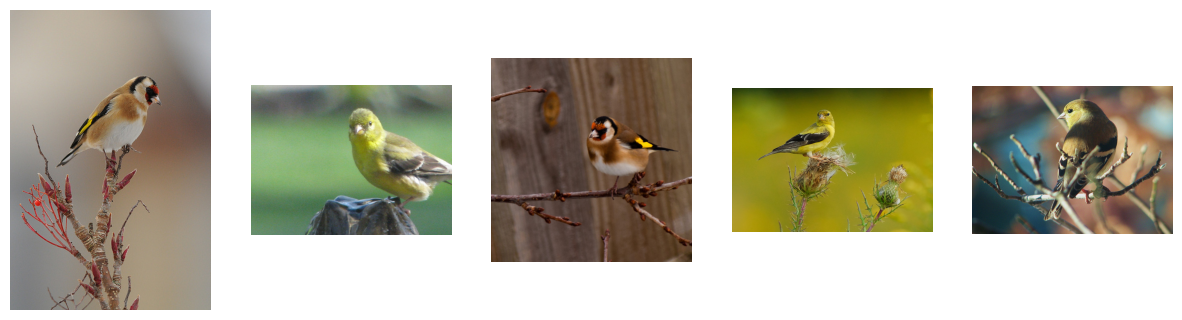

In [88]:
import matplotlib.pyplot as plt

def display_similar_images(image_paths):
    num_images = len(image_paths)
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Display the similar images
display_similar_images(similar_images)

In [43]:
import os
import shutil

cluster_base_dir = './miniImageNet_clusters/'

if not os.path.exists(cluster_base_dir):
    os.makedirs(cluster_base_dir)

for cluster_id in cluster_dict.keys():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    if not os.path.exists(cluster_dir):
        os.makedirs(cluster_dir)

In [44]:
for cluster_id, img_paths in cluster_dict.items():
    label = cluster_labels[cluster_id]
    label = ''.join(e for e in label if e.isalnum() or e in (' ', '_')).strip()
    cluster_dir = os.path.join(cluster_base_dir, f'{cluster_id}_{label}')
    for img_path in img_paths:
        shutil.copy(img_path, cluster_dir)

In [70]:
print(feature_vectors)

[[0.         0.38707405 0.         ... 1.1993192  0.         0.27843517]
 [0.3675279  1.398462   0.16314748 ... 0.         1.176707   0.        ]
 [0.0652024  0.6555186  0.7376183  ... 0.         0.         1.0462893 ]
 ...
 [0.         1.0857086  0.         ... 1.1267253  0.         1.1438345 ]
 [0.         0.40968347 0.         ... 0.         0.08871609 2.4237442 ]
 [1.4316685  0.16472326 0.28064415 ... 0.         0.         0.07587125]]


In [71]:
import pandas as pd

In [72]:
df = pd.DataFrame(feature_vectors)
df.to_csv('feature_vectors.csv', index=False)

In [73]:
df

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.000000,0.387074,0.000000,0.060202,1.869875,0.018956,0.000000,0.024642,0.000882,0.000000,...,0.000000,0.282957,0.000000,0.000000,0.015449,0.044047,0.000000,1.199319,0.000000,0.278435
1,0.367528,1.398462,0.163147,0.347473,0.140504,1.213591,0.000000,1.068768,0.088179,0.046526,...,1.516420,0.034907,0.181583,0.071349,0.246698,0.000000,0.000000,0.000000,1.176707,0.000000
2,0.065202,0.655519,0.737618,0.011229,0.369761,0.531226,0.025645,0.739297,0.032604,0.000000,...,0.365992,0.012006,0.000000,0.000000,0.000000,0.223491,0.000000,0.000000,0.000000,1.046289
3,0.820407,1.430228,0.145759,0.000000,0.101211,0.000000,0.106289,0.763693,0.056587,0.367384,...,2.126958,0.721804,0.420900,2.086843,0.019514,0.176404,0.014404,0.004468,0.000000,1.428642
4,0.064994,0.066597,0.032394,0.742089,0.183057,0.237401,0.001223,1.081218,0.095859,0.000000,...,0.774876,3.208702,0.266196,0.269831,0.888610,0.012173,0.000000,0.000000,0.000383,0.193172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134995,0.777991,0.000000,0.000000,0.201654,0.000000,1.204321,0.000000,0.414665,0.138761,0.261553,...,0.514293,0.703743,0.026275,0.000000,0.004638,0.336244,0.111935,0.000000,0.000000,0.124176
134996,0.697776,1.315929,0.000000,1.417026,0.050825,0.266893,0.000000,1.465182,1.004794,0.144558,...,1.468542,0.437933,0.550276,0.977317,0.000000,0.378942,1.526942,0.620523,0.099561,0.418778
134997,0.000000,1.085709,0.000000,0.144992,0.453491,0.104408,0.000000,0.046150,0.886684,0.724237,...,1.821287,0.254323,0.000000,0.080486,0.000000,0.000000,1.245898,1.126725,0.000000,1.143834
134998,0.000000,0.409683,0.000000,0.191580,0.030405,2.253438,0.000000,0.040313,0.683603,0.000000,...,1.371564,2.191257,0.029685,1.786057,0.018730,0.000000,0.116847,0.000000,0.088716,2.423744
